# Problem 1

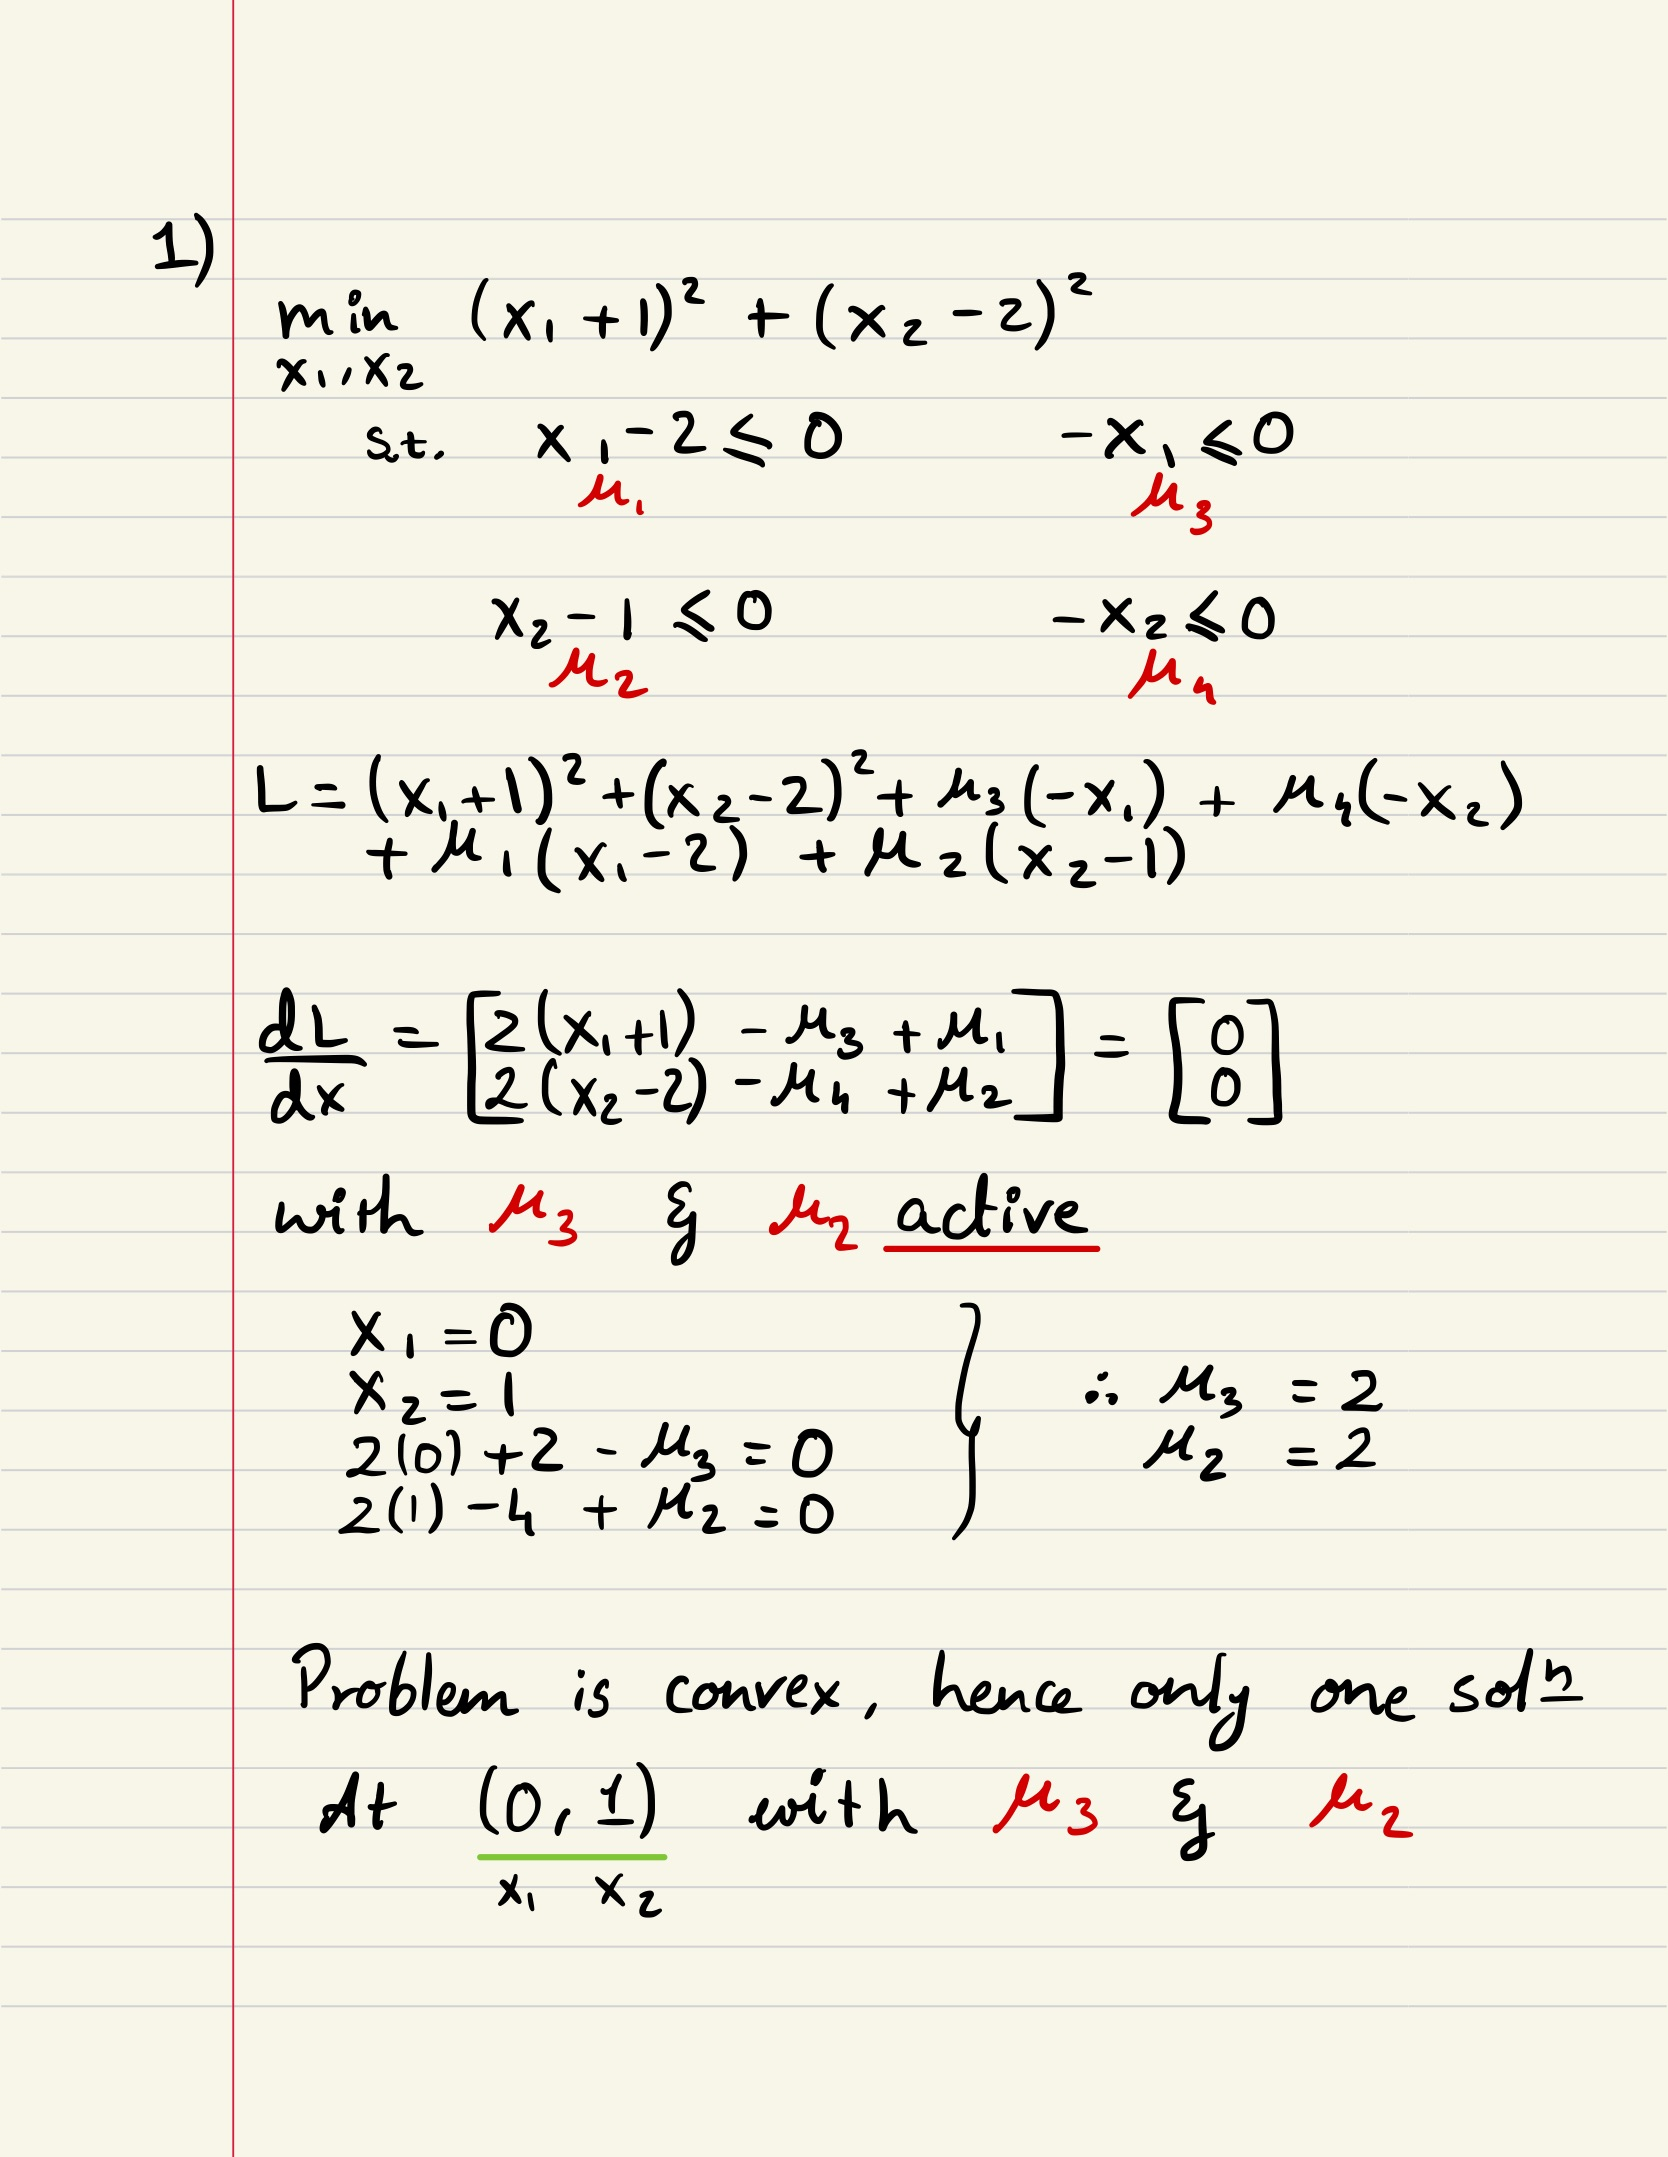

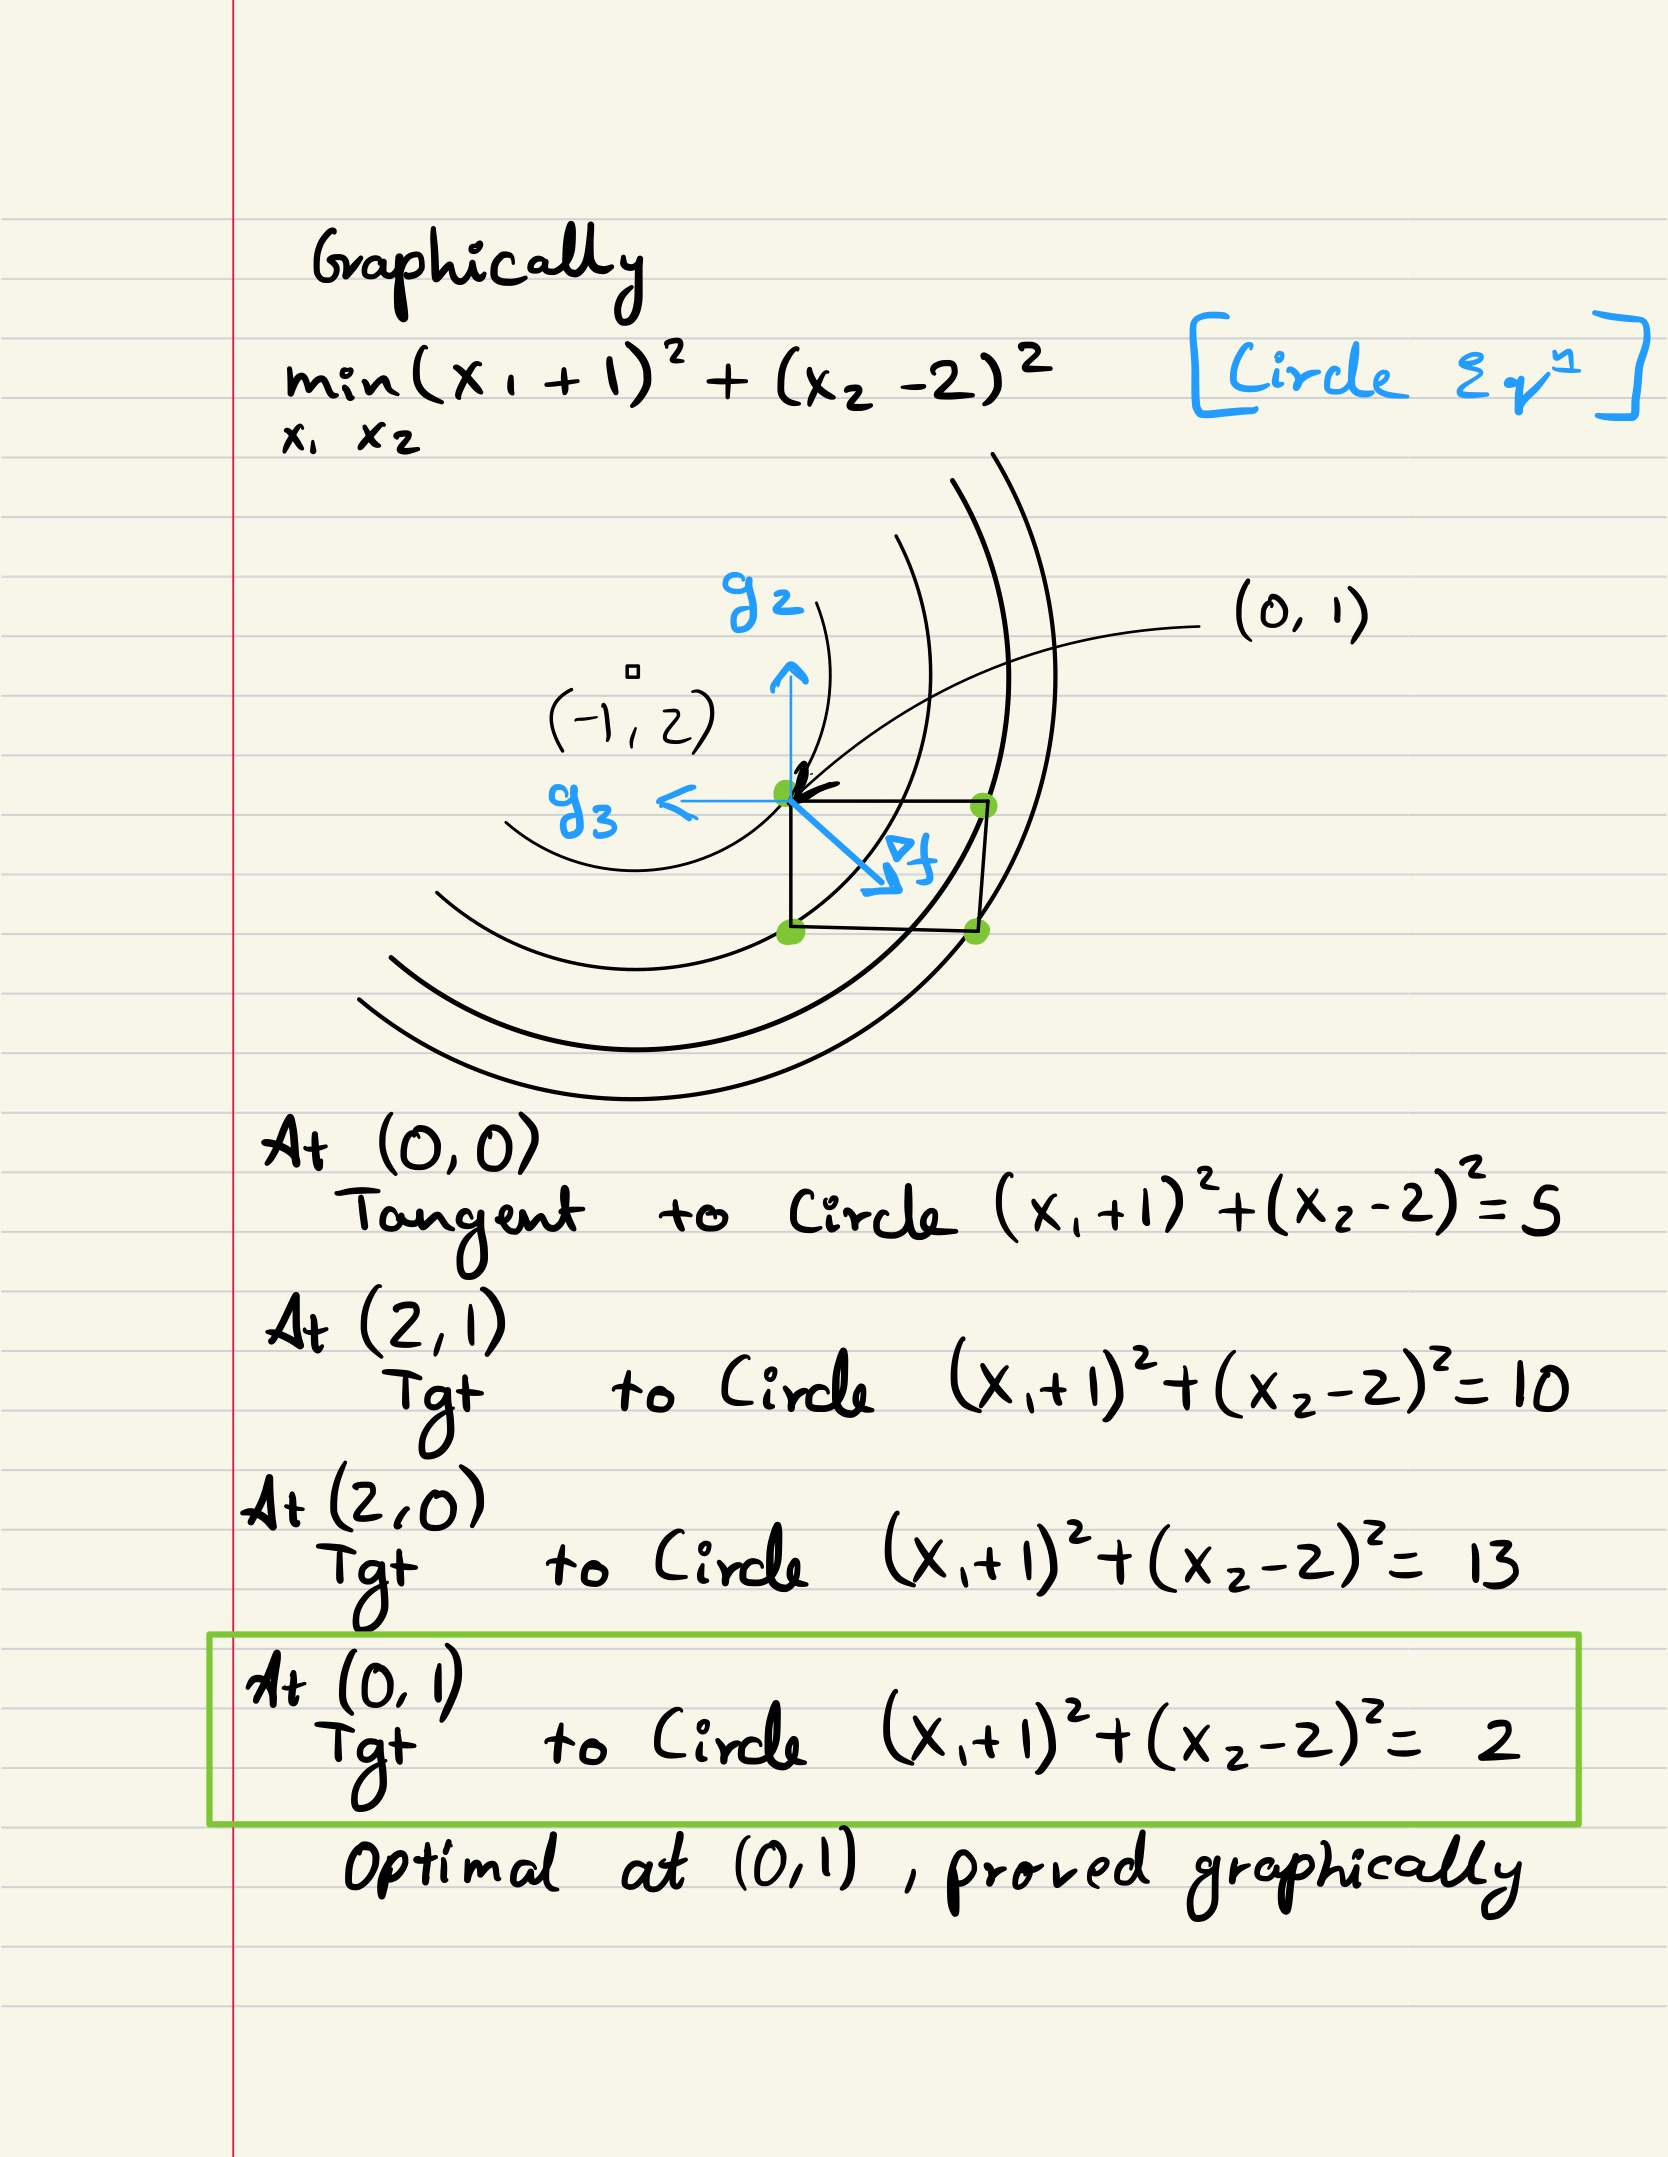

# Problem 2

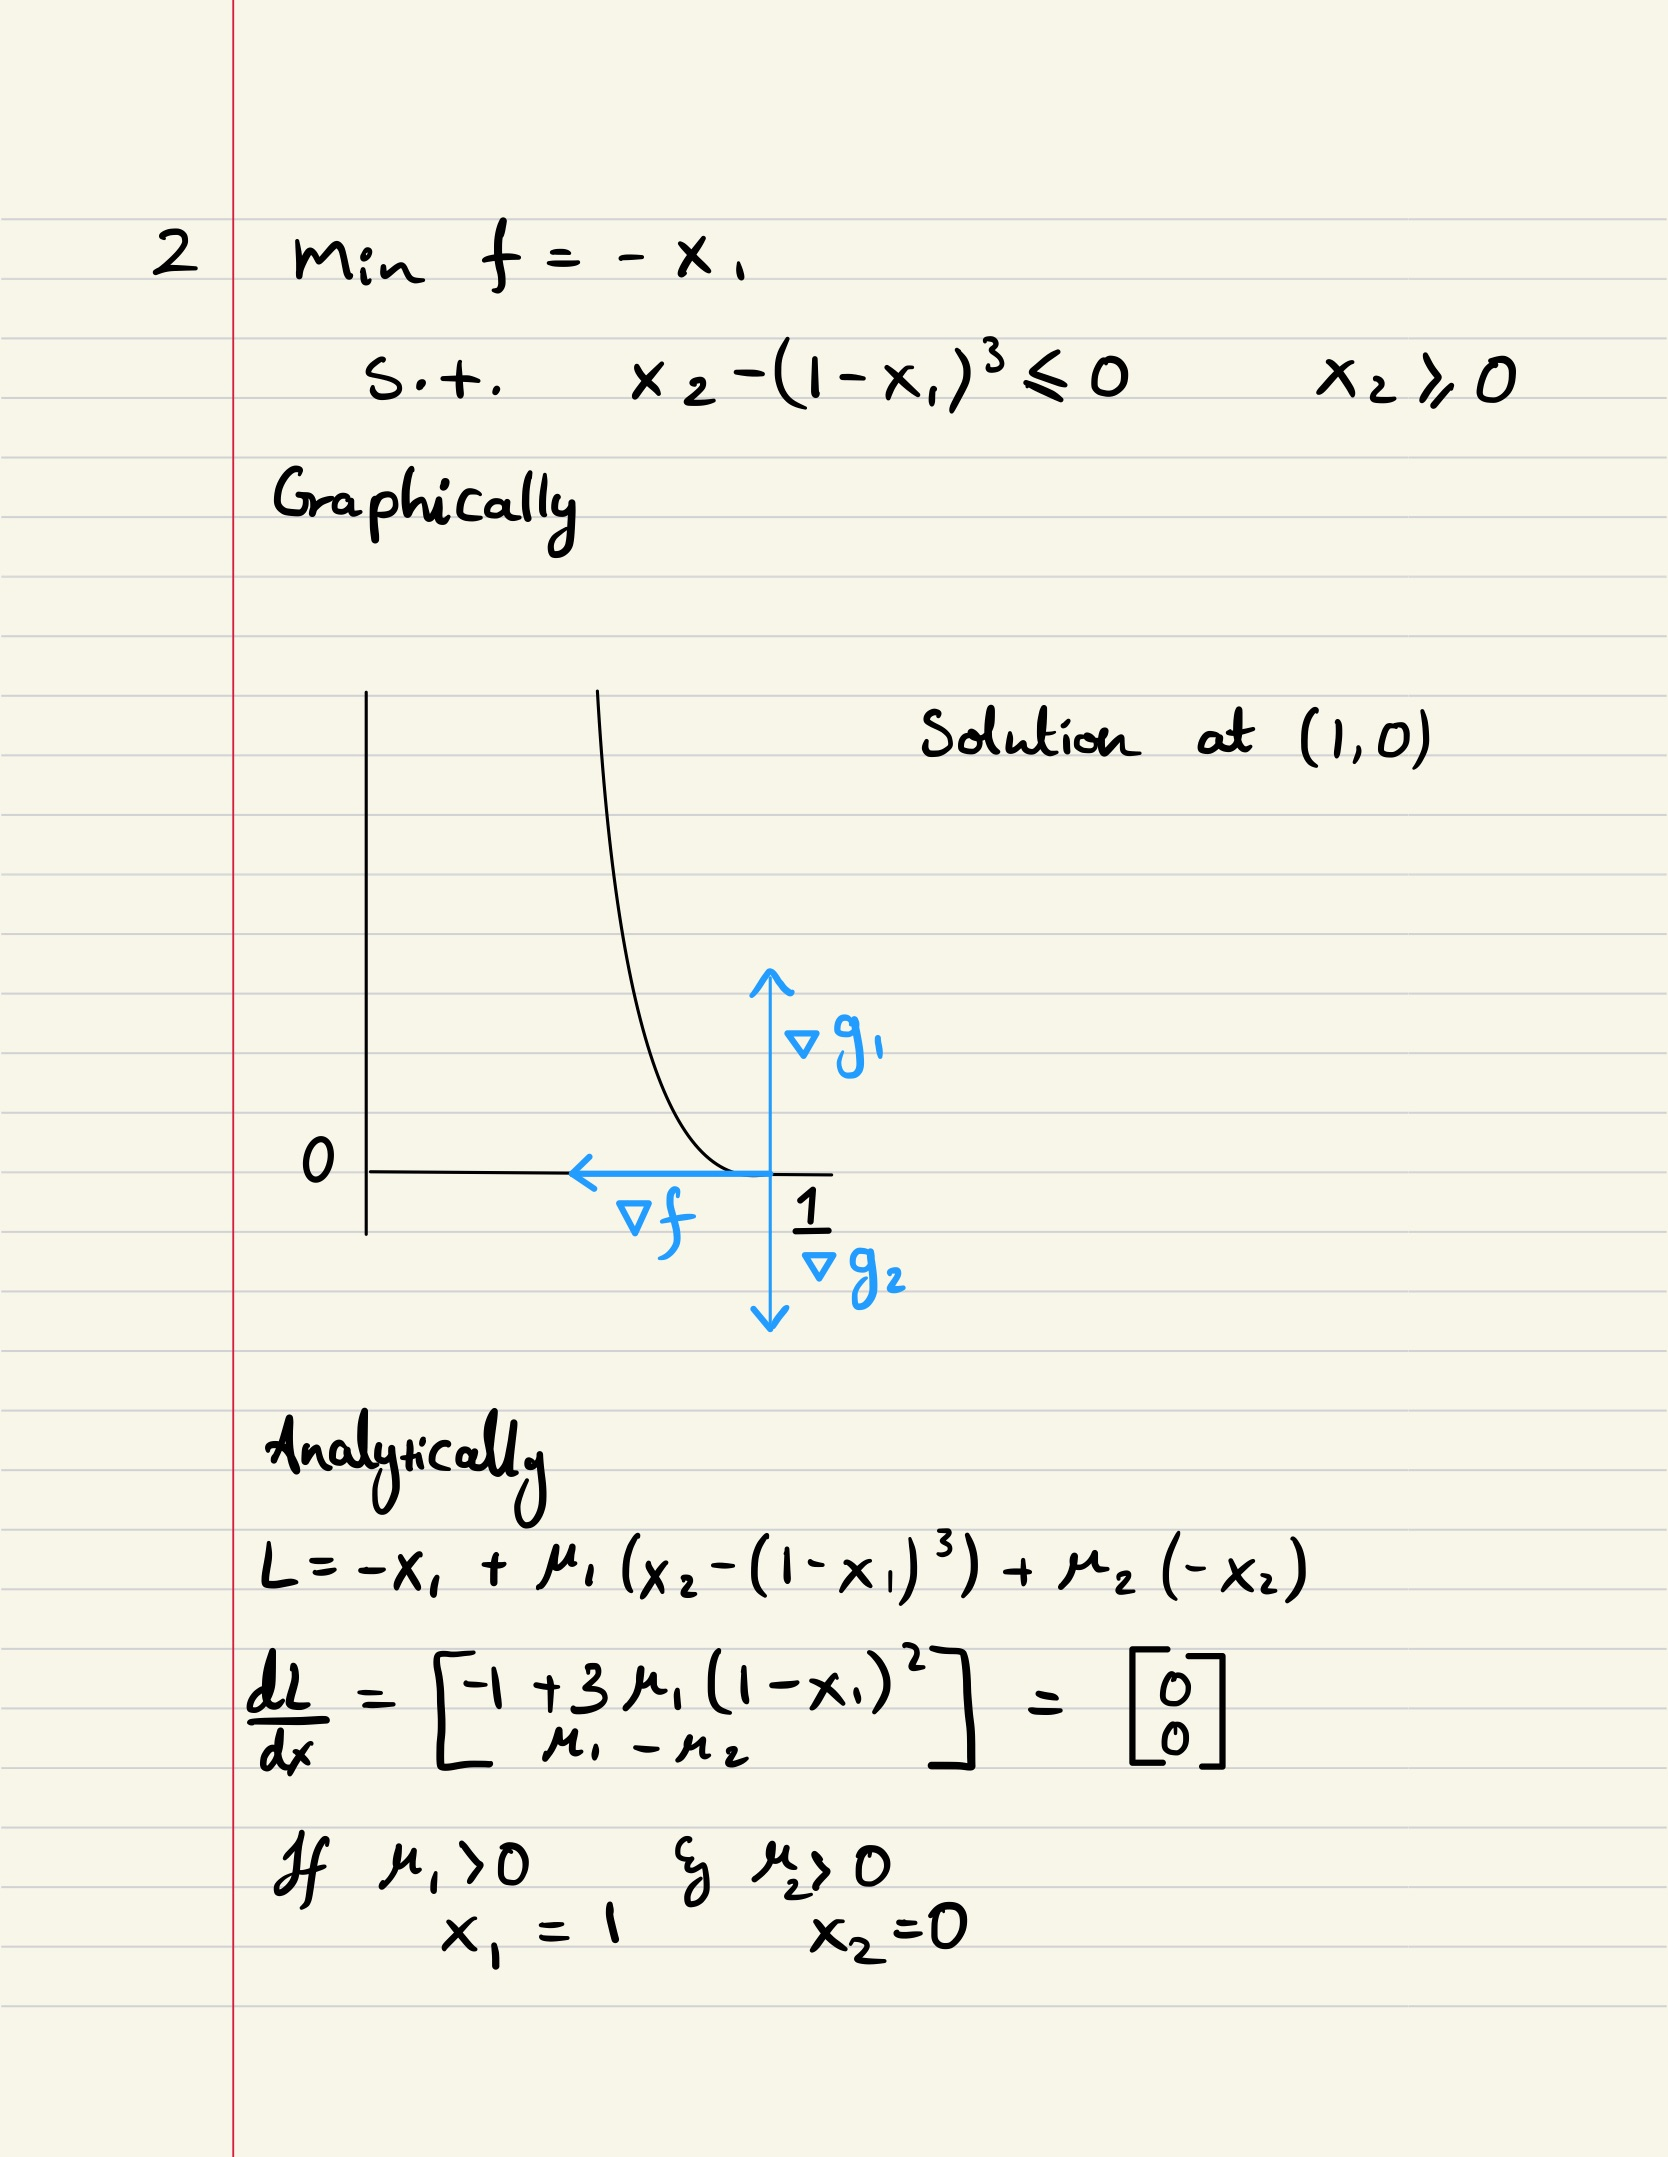

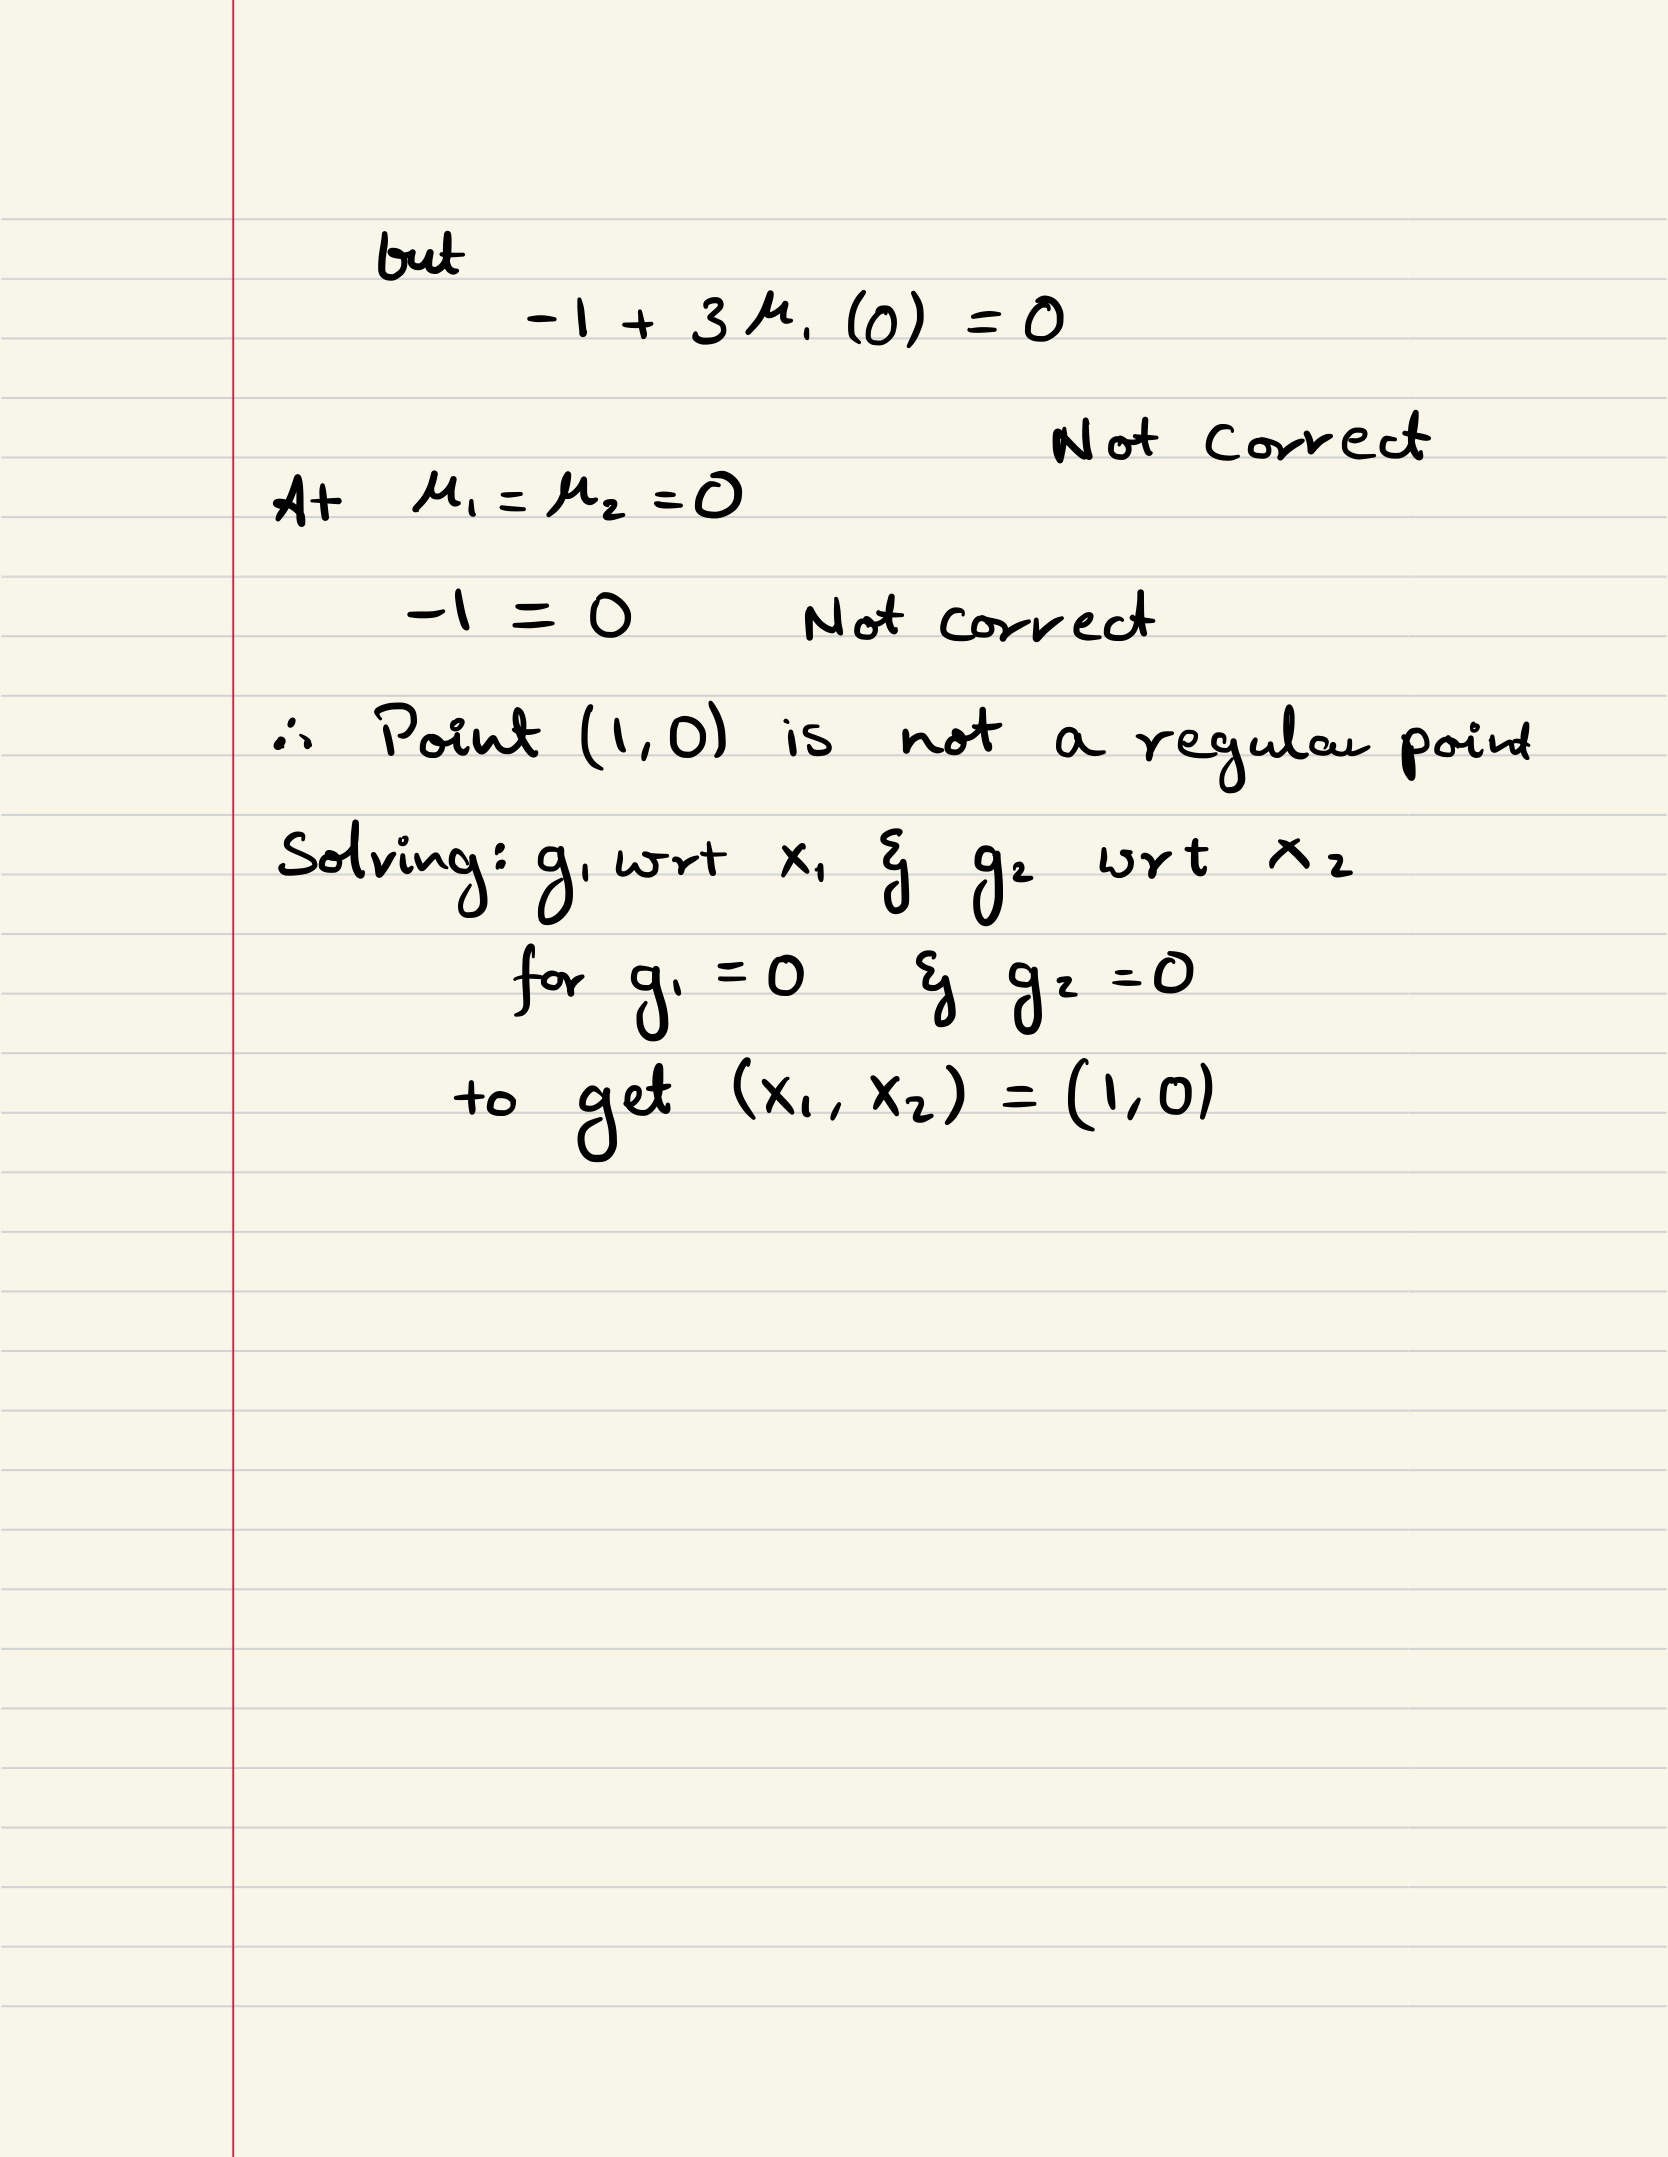

# Problem 3

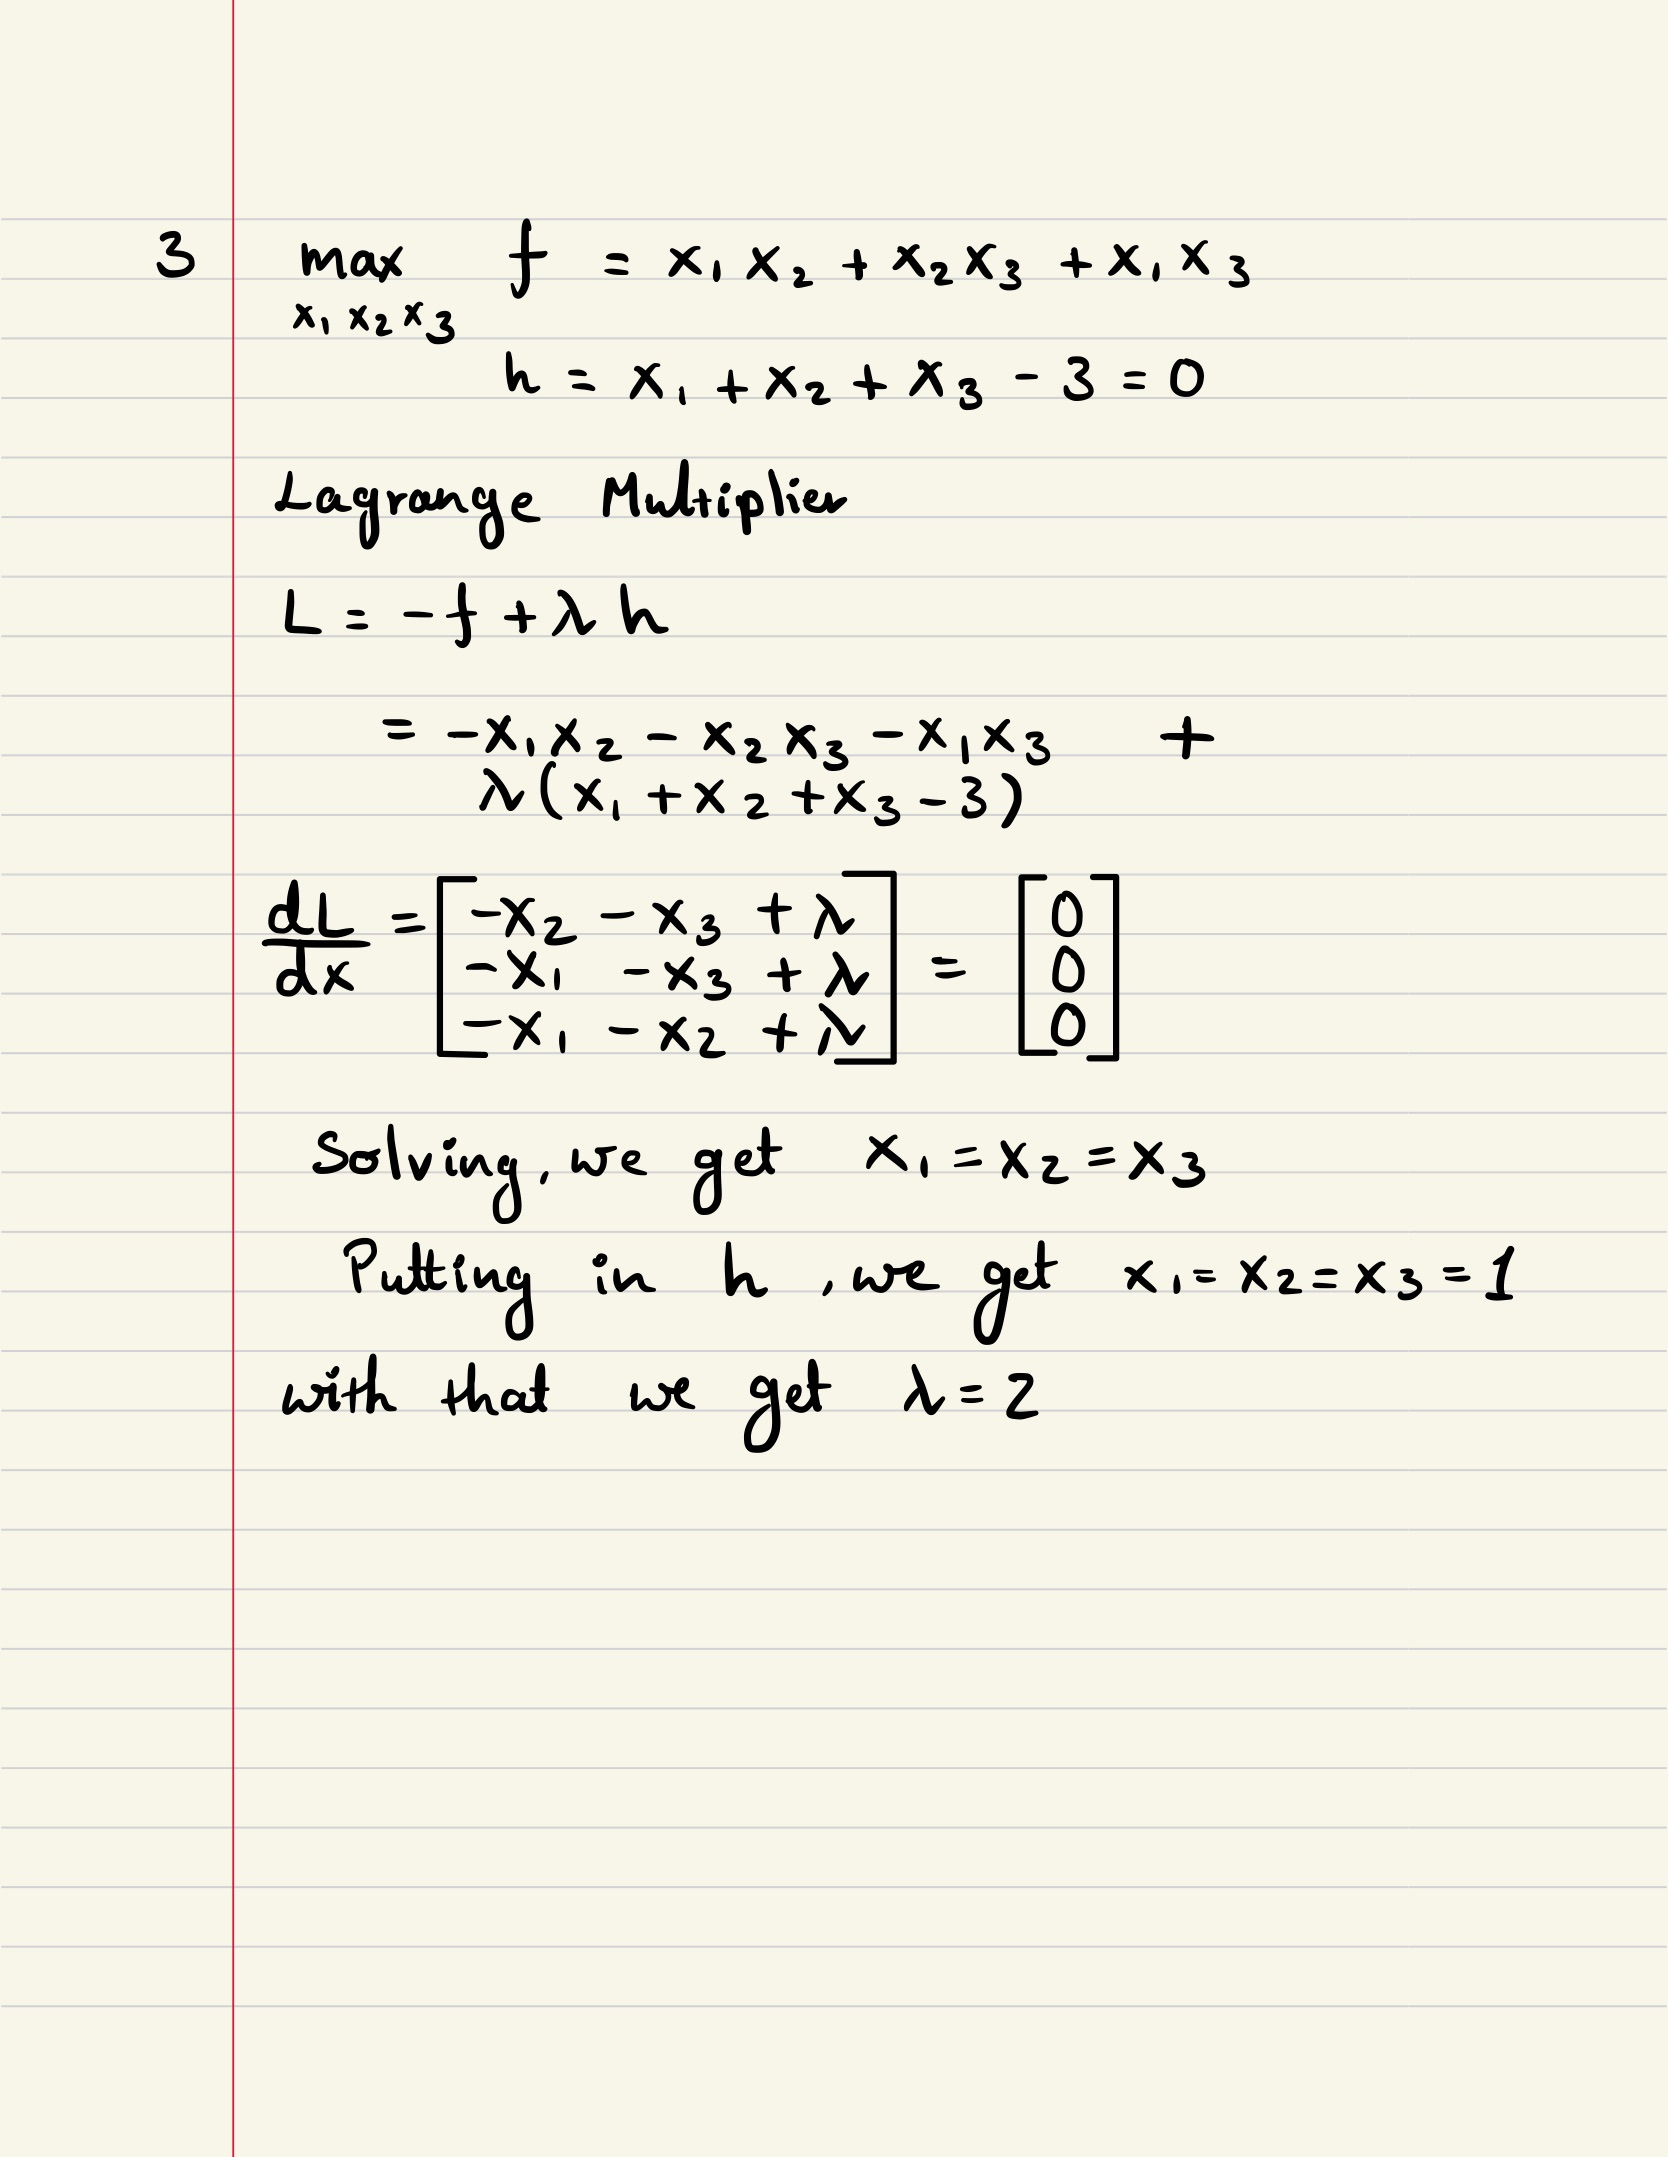

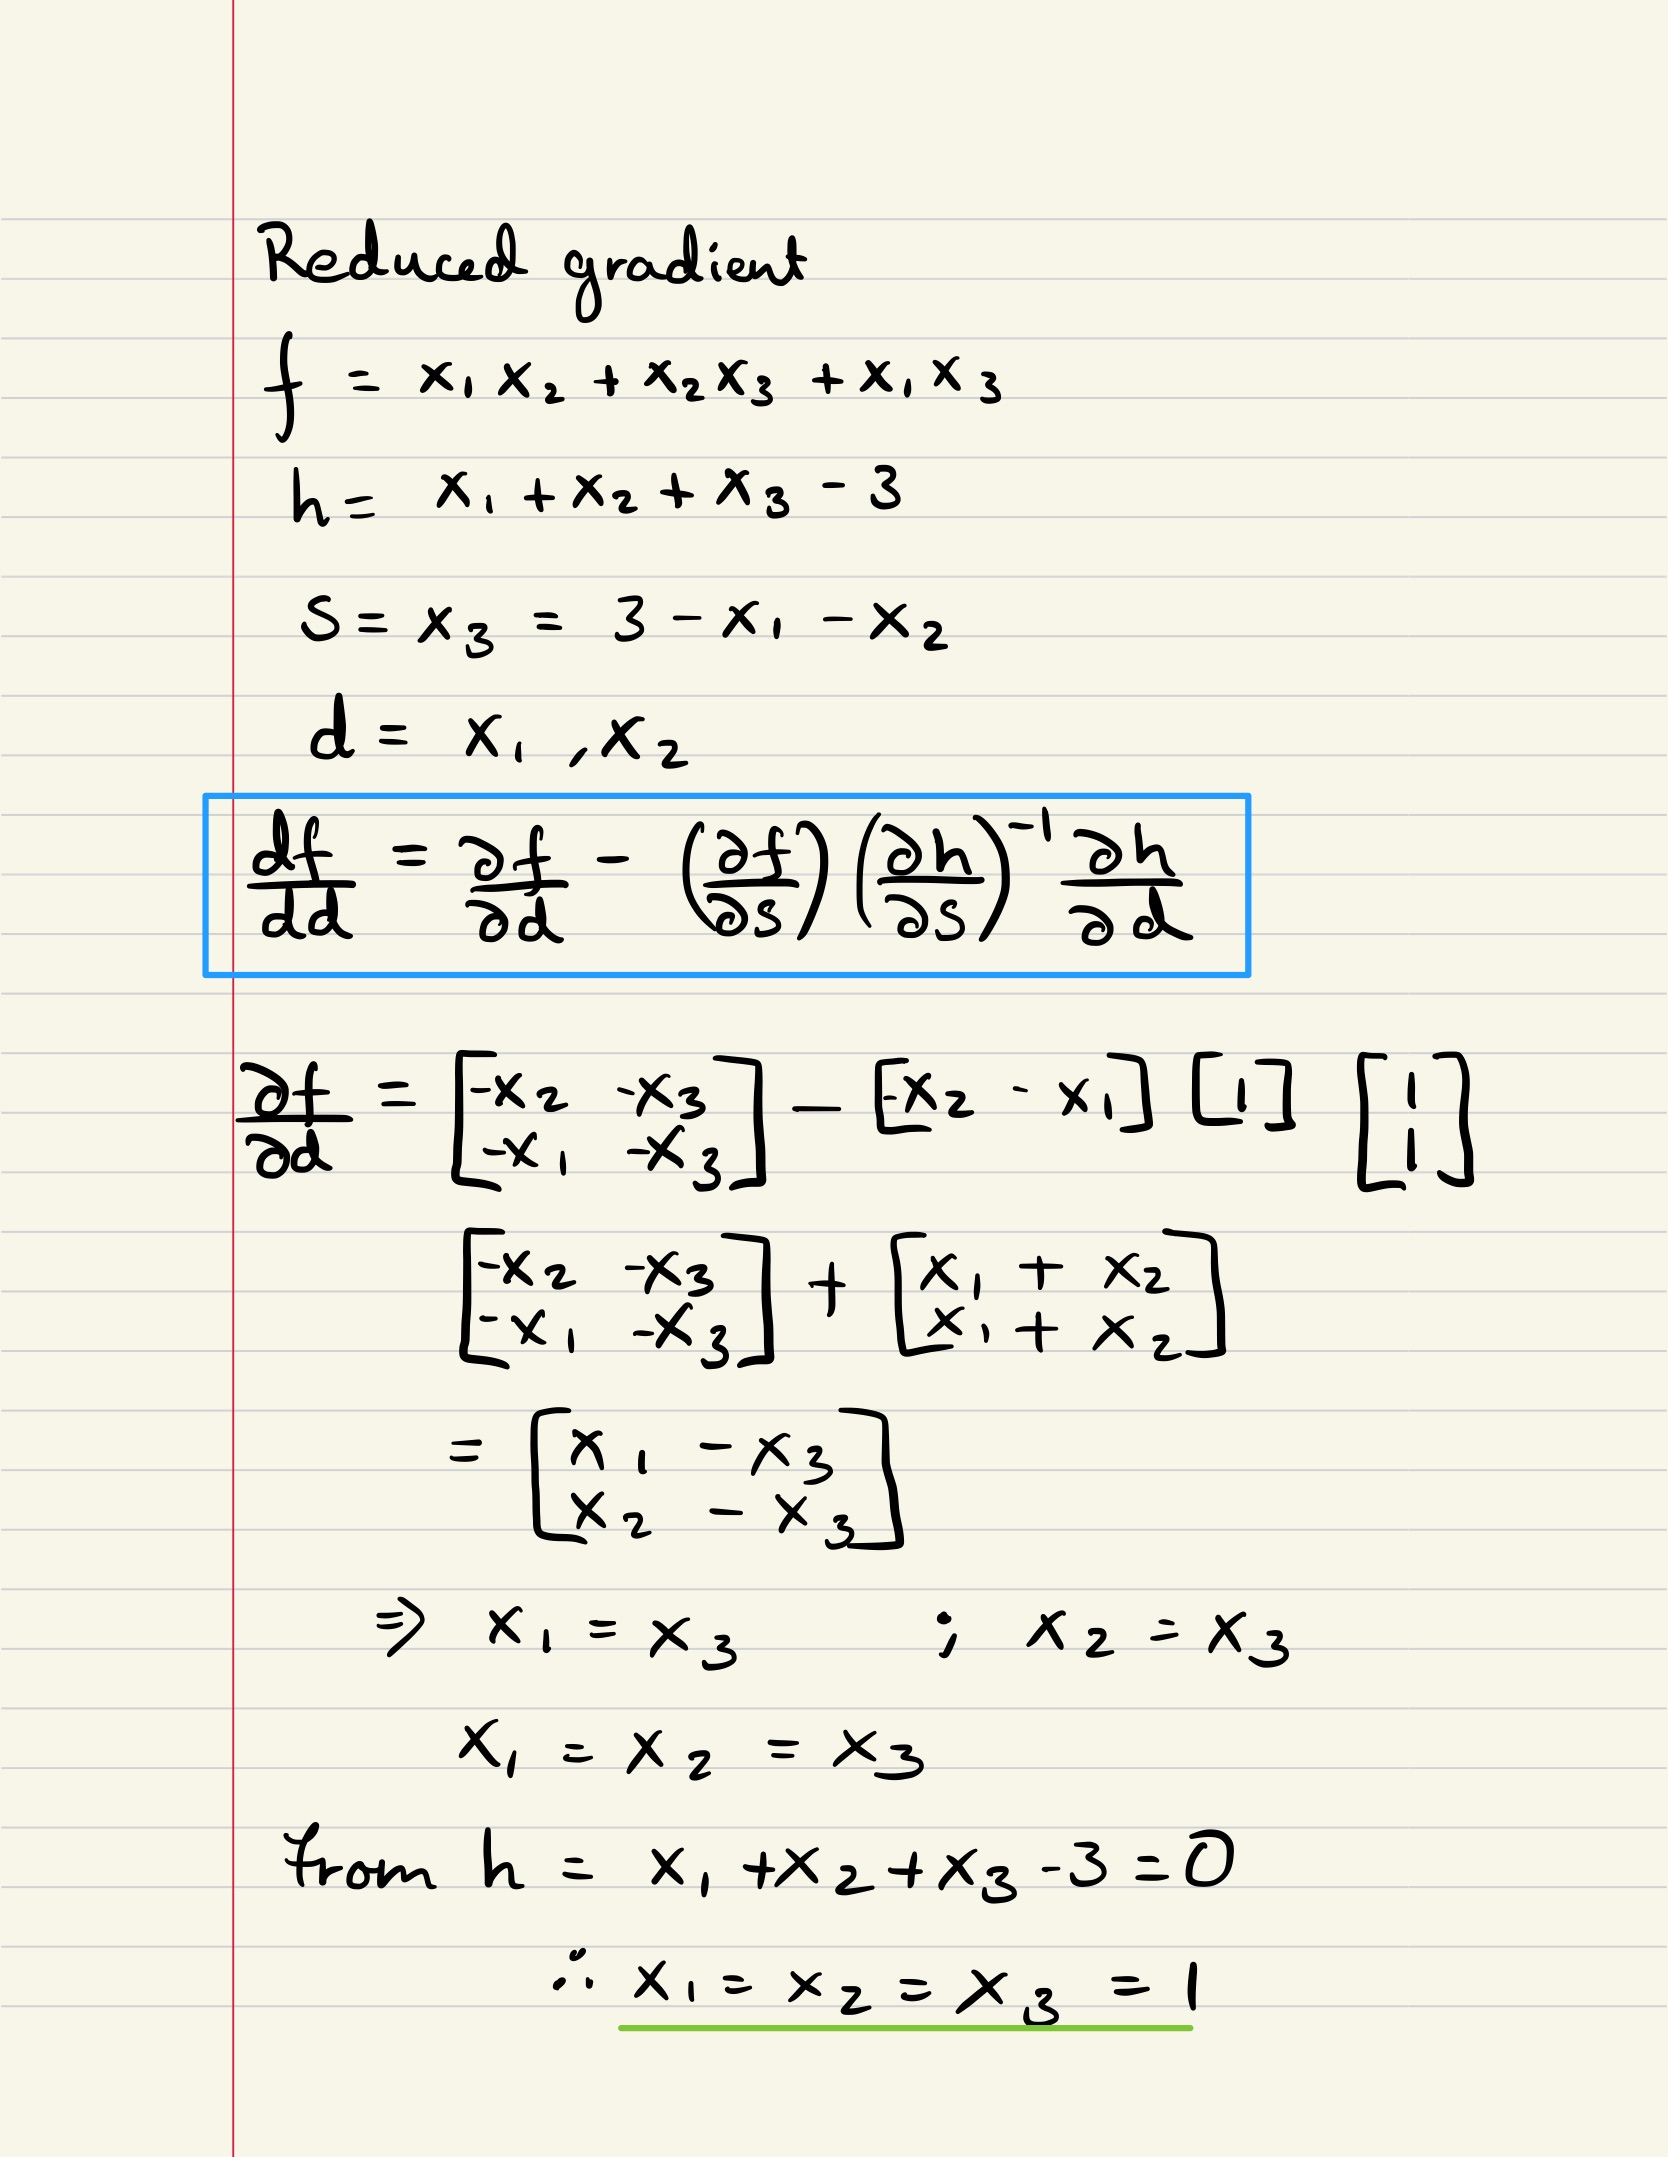

# Problem 4

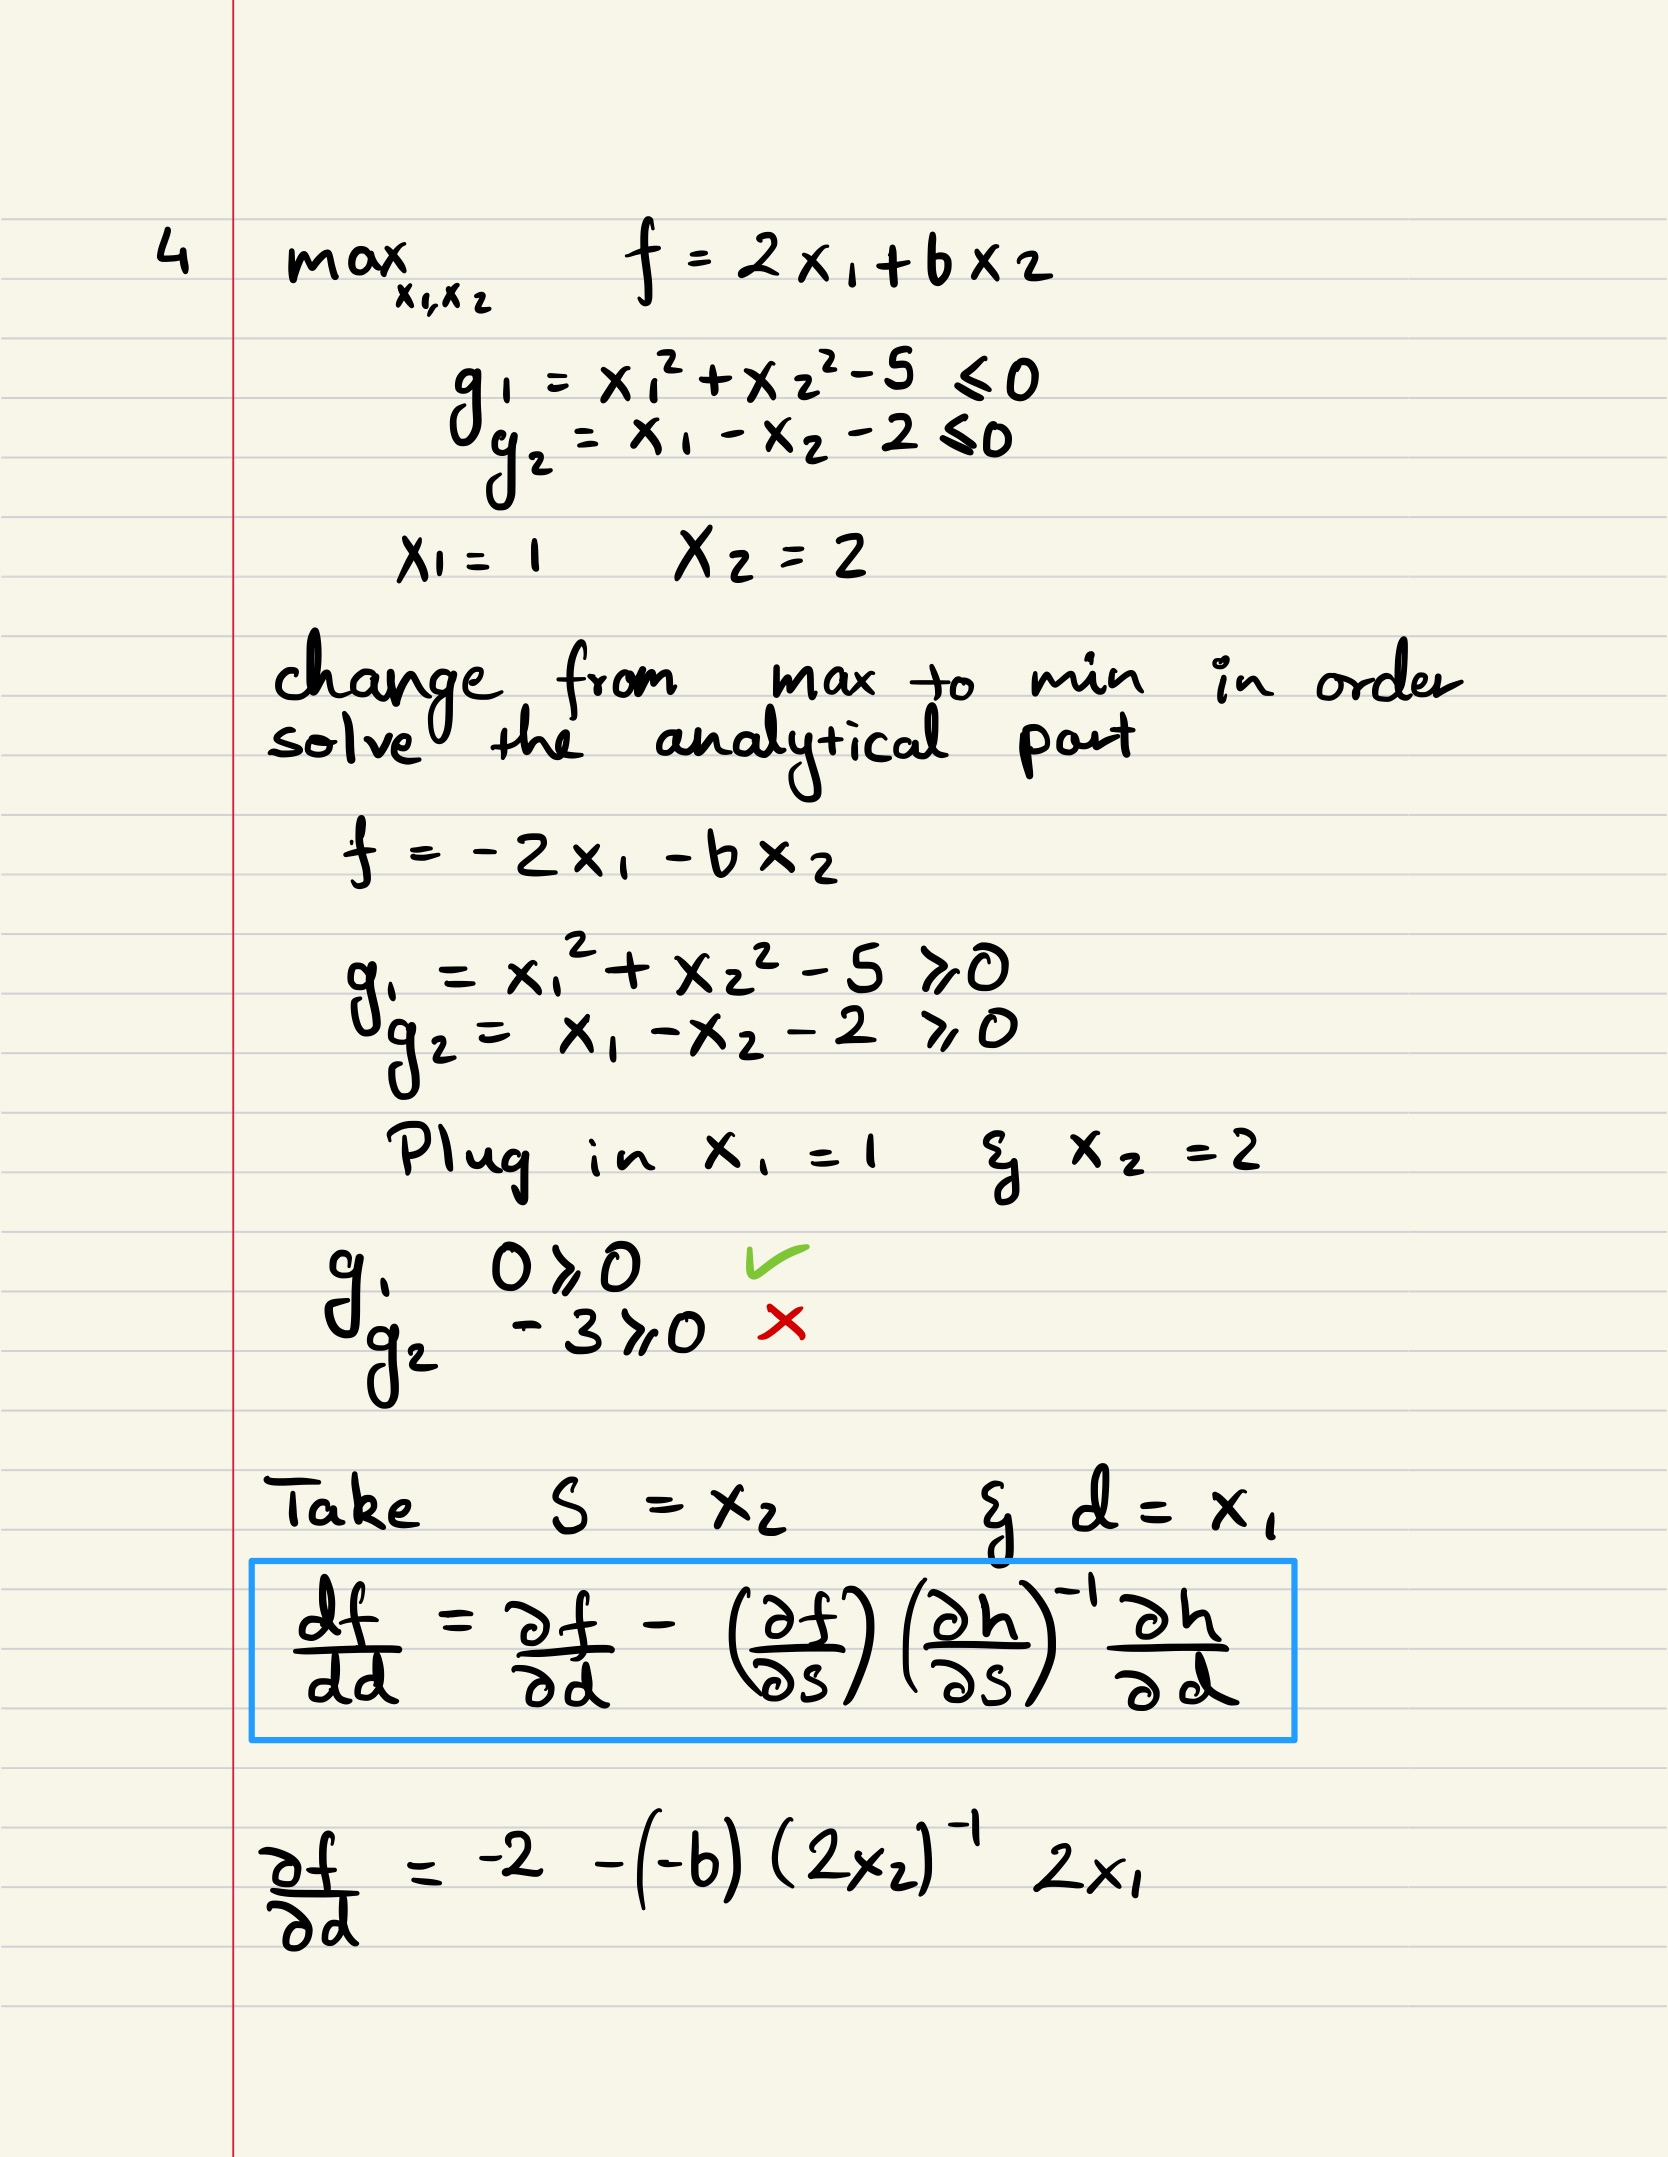

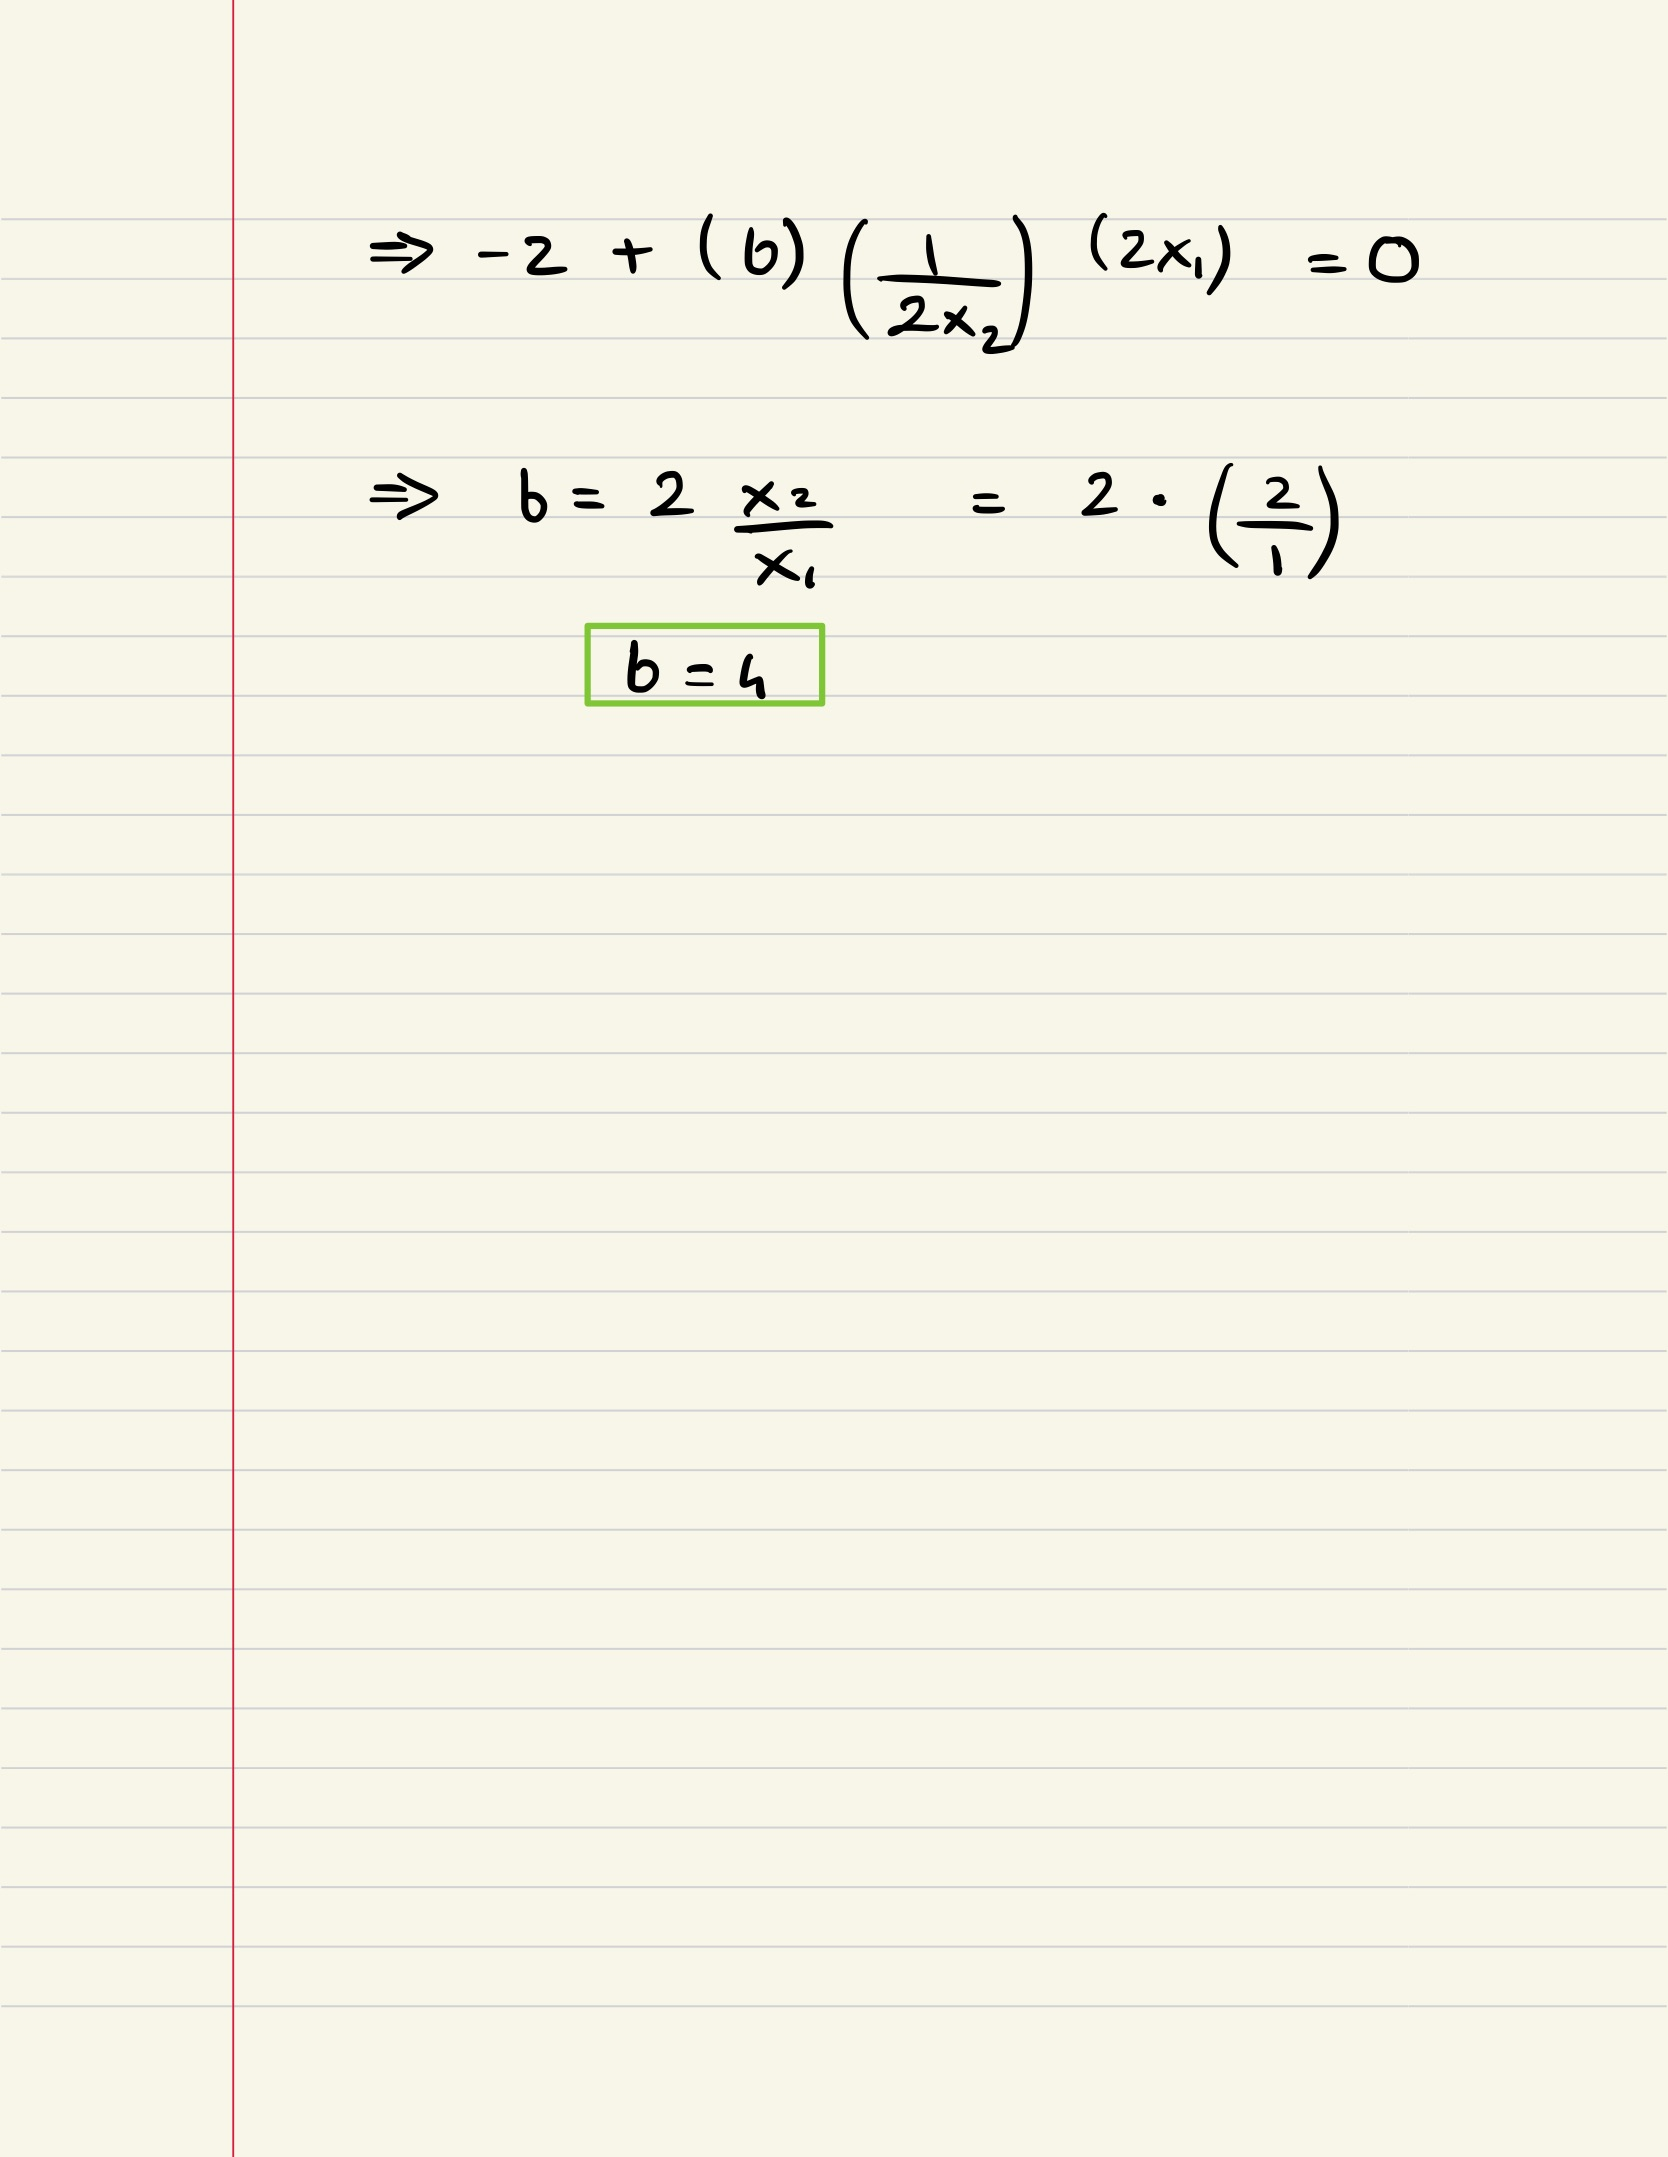

# Problem 5

In [1]:
# Generalized Reduced Gradient Algorithm 

import numpy as np
import matplotlib.pyplot as plt
from sympy import *

def generalized_reduced_gradient():

    x1, x2, x3 = symbols('x1 x2 x3')
    xvars = [x1, x2, x3]

    fx = x1**2 + x2**2 + x3**20                         			# Function to be minimized
    hxs = [(x1**2)/4 + (x2**2)/5 + (x3**2)/25 - 1, x1 + x2 - x3]	# Constraints to be obeyed
    alpha_0 = 1                              						# Parameter initializations
    gamma = 0.4
    max_iter = 100
    max_outer_iter = 20
    eps_1, eps_2, eps_3 = 0.01, 0.01, 0.01

    xcurr = np.array([15, 12, 11])                         			# Starting solution

    dfx = np.array([diff(fx, xvar) for xvar in xvars])
    dhxs = np.array([[diff(hx, xvar) for xvar in xvars] for hx in hxs])
    nonbasic_vars = len(xvars) - len(hxs)
    opt_sols = []

    for outer_iter in range(max_outer_iter):

        print ('\n\nOuter loop iteration: {0}, optimal solution: {1}'.format(outer_iter + 1, xcurr))
        opt_sols.append(fx.subs(zip(xvars, xcurr)))

        # Step 1

        delta_f = np.array([df.subs(zip(xvars, xcurr)) for df in dfx])
        delta_h = np.array([[dh.subs(zip(xvars, xcurr)) for dh in dhx] for dhx in dhxs])	# Value of h'_i(xcurr) for all i
        J = np.array([dhx[nonbasic_vars:] for dhx in delta_h])								# Computation of J and C matrices
        C = np.array([dhx[:nonbasic_vars] for dhx in delta_h])
        delta_f_bar = delta_f[nonbasic_vars:]
        delta_f_cap = delta_f[:nonbasic_vars]

        J_inv = np.linalg.inv(np.array(J, dtype=float))
        delta_f_tilde = delta_f_cap - delta_f_bar.dot(J_inv.dot(C))

        # Step 2

        if abs(delta_f_tilde[0]) <= eps_1:
            break

        d_bar = - delta_f_tilde.T 									# Direction of search in current iteration
        d_cap = - J_inv.dot(C.dot(d_bar))
        d = np.concatenate((d_bar, d_cap)).T

        # Step 3

        alpha = alpha_0

        while alpha > 0.01:

            print ('\nAlpha value: {0}\n'.format(alpha))

            # Step 3(a)

            v = xcurr.T + alpha * d
            v_bar = v[:nonbasic_vars]
            v_cap = v[nonbasic_vars:]
            flag = False

            for iter in range(max_iter):
                print ('Iteration: {0}, optimal solution obtained at x = {1}'.format(iter + 1, v))
                h = np.array([hx.subs(zip(xvars, v)) for hx in hxs])
                if all([abs(h_i) < eps_2 for h_i in h]):			# Check if candidate satisfies all constraints
                    if fx.subs(zip(xvars, xcurr)) <= fx.subs(zip(xvars, v)):
                        alpha = alpha * gamma
                        break
                    else:
                        xcurr = v 					# Obtained a candidate better than the current optimal solution
                        flag = True
                        break

                # Step 3(b)

                delta_h_v = np.array([[dh.subs(zip(xvars, v)) for dh in dhx] for dhx in dhxs])
                J_inv_v = np.linalg.inv(np.array([dhx[nonbasic_vars:] for dhx in delta_h_v], dtype=float))
                v_next_cap = v_cap - J_inv_v.dot(h)

                # Step 3(c)

                if abs(np.linalg.norm(np.array(v_cap - v_next_cap, dtype=float), 1)) > eps_3:
                    v_cap = v_next_cap
                    v = np.concatenate((v_bar, v_cap))
                else:
                    v_cap = v_next_cap
                    v = np.concatenate((v_bar, v_cap))
                    h = np.array([hx.subs(zip(xvars, v)) for hx in hxs])
                    if all([abs(h_i) < eps_2 for h_i in h]):

                        # Step 3(d)

                        if fx.subs(zip(xvars, xcurr)) <= fx.subs(zip(xvars, v)):
                            alpha = alpha * gamma				# Search for lower values of alpha
                            break
                        else:
                            xcurr = v
                            flag = True
                            break
                    else:
                        alpha = alpha * gamma
                        break

            if flag == True:
                break

    print ('\n\nFinal solution obtained is: {0}'.format(xcurr))
    print ('Value of the function at this point: {0}\n'.format(fx.subs(zip(xvars, xcurr))))

    plt.plot(opt_sols, 'ro')								# Plot the solutions obtained after every iteration
    plt.show()

if __name__ == '__main__':
    generalized_reduced_gradient()



Outer loop iteration: 1, optimal solution: [15 12 11]

Alpha value: 1

Iteration: 1, optimal solution obtained at x = [5.81442057079998e+20 -8.57831767311687e+20 -2.76389710231689e+20]
Iteration: 2, optimal solution obtained at x = [5.81442057079998e+20 -2.15112077913423e+20 3.66329979166575e+20]
Iteration: 3, optimal solution obtained at x = [5.81442057079998e+20 1.53222669838175e+21 2.11366875546175e+21]
Iteration: 4, optimal solution obtained at x = [5.81442057079998e+20 5.95166472953854e+20 1.17660853003385e+21]
Iteration: 5, optimal solution obtained at x = [5.81442057079998e+20 -3.92183780223020e+19 5.42223679057696e+20]
Iteration: 6, optimal solution obtained at x = [5.81442057079998e+20 -3.52728984675361e+21 -2.94584778967361e+21]
Iteration: 7, optimal solution obtained at x = [5.81442057079998e+20 -1.75392472276567e+21 -1.17248266568568e+21]
Iteration: 8, optimal solution obtained at x = [5.81442057079998e+20 -8.04983791770980e+20 -2.23541734690983e+20]
Iteration: 9, optimal

Iteration: 13, optimal solution obtained at x = [5.81442057079998e+20 -2.58247131426119e+20 3.23194925653879e+20]
Iteration: 14, optimal solution obtained at x = [5.81442057079998e+20 1.05930113506577e+21 1.64074319214577e+21]
Iteration: 15, optimal solution obtained at x = [5.81442057079998e+20 3.08600042587428e+20 8.90042099667425e+20]
Iteration: 16, optimal solution obtained at x = [5.81442057079998e+20 -3.86273360142136e+20 1.95168696937862e+20]
Iteration: 17, optimal solution obtained at x = [5.81442057079998e+20 4.48047985051793e+20 1.02949004213179e+21]
Iteration: 18, optimal solution obtained at x = [5.81442057079998e+20 -1.90621367452893e+20 3.90820689627104e+20]
Iteration: 19, optimal solution obtained at x = [5.81442057079998e+20 1.98566490712108e+21 2.56710696420107e+21]
Iteration: 20, optimal solution obtained at x = [5.81442057079998e+20 8.48556048822168e+20 1.42999810590217e+21]
Iteration: 21, optimal solution obtained at x = [5.81442057079998e+20 1.64755373469383e+20 7.


Iteration: 1, optimal solution obtained at x = [5.81442057079998e+20 -8.57831767311687e+20 -2.76389710231689e+20]
Iteration: 2, optimal solution obtained at x = [5.81442057079998e+20 -2.15112077913423e+20 3.66329979166575e+20]
Iteration: 3, optimal solution obtained at x = [5.81442057079998e+20 1.53222669838175e+21 2.11366875546175e+21]
Iteration: 4, optimal solution obtained at x = [5.81442057079998e+20 5.95166472953854e+20 1.17660853003385e+21]
Iteration: 5, optimal solution obtained at x = [5.81442057079998e+20 -3.92183780223020e+19 5.42223679057696e+20]
Iteration: 6, optimal solution obtained at x = [5.81442057079998e+20 -3.52728984675361e+21 -2.94584778967361e+21]
Iteration: 7, optimal solution obtained at x = [5.81442057079998e+20 -1.75392472276567e+21 -1.17248266568568e+21]
Iteration: 8, optimal solution obtained at x = [5.81442057079998e+20 -8.04983791770980e+20 -2.23541734690983e+20]
Iteration: 9, optimal solution obtained at x = [5.81442057079998e+20 -1.69114269509612e+20 4.

Iteration: 80, optimal solution obtained at x = [5.81442057079998e+20 8.59034629927748e+20 1.44047668700775e+21]
Iteration: 81, optimal solution obtained at x = [5.81442057079998e+20 1.72308304390929e+20 7.53750361470927e+20]
Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5.10160326442365e+20]
Iteration: 84, optimal solution obtained at x = [5.81442057079998e+20 -7.87164202722901e+21 -7.29019997014901e+21]
Iteration: 85, optimal solution obtained at x = [5.81442057079998e+20 -3.95860700944416e+21 -3.37716495236416e+21]
Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.741504077629

Iteration: 77, optimal solution obtained at x = [5.81442057079998e+20 8.54219193912818e+21 9.12363399620818e+21]
Iteration: 78, optimal solution obtained at x = [5.81442057079998e+20 4.19954305575346e+21 4.78098511283345e+21]
Iteration: 79, optimal solution obtained at x = [5.81442057079998e+20 2.00487082195610e+21 2.58631287903610e+21]
Iteration: 80, optimal solution obtained at x = [5.81442057079998e+20 8.59034629927748e+20 1.44047668700775e+21]
Iteration: 81, optimal solution obtained at x = [5.81442057079998e+20 1.72308304390929e+20 7.53750361470927e+20]
Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5.10160326442365e+20]
Iteration: 84, optimal solution obtained at x = [5.81442057079998e+20 -7.87164202722901e+21 -7.29019997014901e+21]
Iteration: 85, optimal solution obtained at x = [5.81442057079998e+20 -3.95860700944416e+21

Iteration: 84, optimal solution obtained at x = [5.81442057079998e+20 -7.87164202722901e+21 -7.29019997014901e+21]
Iteration: 85, optimal solution obtained at x = [5.81442057079998e+20 -3.95860700944416e+21 -3.37716495236416e+21]
Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.74150407762997e+20 3.07291649317000e+20]
Iteration: 89, optimal solution obtained at x = [5.81442057079998e+20 9.40369815329813e+20 1.52181187240981e+21]
Iteration: 90, optimal solution obtained at x = [5.81442057079998e+20 2.29344881111089e+20 8.10786938191087e+20]
Iteration: 91, optimal solution obtained at x = [5.81442057079998e+20 -5.45449796880115e+20 3.59922601998831e+19]
Iteration: 92, optimal solution obtained at x = [5.81442057079998e+20 1.23724705476347

Iteration: 59, optimal solution obtained at x = [5.81442057079998e+20 1.35358700344115e+20 7.16800757424112e+20]
Iteration: 60, optimal solution obtained at x = [5.81442057079998e+20 -8.39954274606817e+20 -2.58512217526820e+20]
Iteration: 61, optimal solution obtained at x = [5.81442057079998e+20 -1.99863499904914e+20 3.81578557175084e+20]
Iteration: 62, optimal solution obtained at x = [5.81442057079998e+20 1.78989061030311e+21 2.37133266738311e+21]
Iteration: 63, optimal solution obtained at x = [5.81442057079998e+20 7.40726307383624e+20 1.32216836446362e+21]
Iteration: 64, optimal solution obtained at x = [5.81442057079998e+20 8.36692680347828e+19 6.65111325114780e+20]
Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -5.30294734916636e+20]
Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20 1.73762079844488e+20]
Iteration: 67, optimal solution obtained at x = [5.81442057079998e+20 3.89841123207692e+20

Iteration: 61, optimal solution obtained at x = [5.81442057079998e+20 -1.99863499904914e+20 3.81578557175084e+20]
Iteration: 62, optimal solution obtained at x = [5.81442057079998e+20 1.78989061030311e+21 2.37133266738311e+21]
Iteration: 63, optimal solution obtained at x = [5.81442057079998e+20 7.40726307383624e+20 1.32216836446362e+21]
Iteration: 64, optimal solution obtained at x = [5.81442057079998e+20 8.36692680347828e+19 6.65111325114780e+20]
Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -5.30294734916636e+20]
Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20 1.73762079844488e+20]
Iteration: 67, optimal solution obtained at x = [5.81442057079998e+20 3.89841123207692e+20 9.71283180287689e+20]
Iteration: 68, optimal solution obtained at x = [5.81442057079998e+20 -2.63515164053790e+20 3.17926893026207e+20]
Iteration: 69, optimal solution obtained at x = [5.81442057079998e+20 1.01755790011142e+21 

Iteration: 49, optimal solution obtained at x = [5.81442057079998e+20 1.66213222887692e+21 2.24357428595692e+21]
Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1.25060746438160e+21]
Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.07076195595818e+20]
Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.08269291692510e+21]
Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20 4.60467623816044e+20]
Iteration: 55, optimal solution obtained at x = [5.81442057079998e+20 8.18268544267955e+21 8.76412749975955e+21]
Iteration: 56, optimal solution obtained at x = [5.81442057079998e+20 4.01878681279637e+21 4.60022886987637e+21]
Iteration: 57, optimal solution obtained at x = [5.81442057079998e+20 1.91245279616476e+21 

Iteration: 98, optimal solution obtained at x = [5.81442057079998e+20 1.09449609647846e+21 1.67593815355846e+21]
Iteration: 99, optimal solution obtained at x = [5.81442057079998e+20 3.31296171631134e+20 9.12738228711131e+20]
Iteration: 100, optimal solution obtained at x = [5.81442057079998e+20 -3.48841378643694e+20 2.32600678436303e+20]

Alpha value: 1

Iteration: 1, optimal solution obtained at x = [5.81442057079998e+20 -8.57831767311687e+20 -2.76389710231689e+20]
Iteration: 2, optimal solution obtained at x = [5.81442057079998e+20 -2.15112077913423e+20 3.66329979166575e+20]
Iteration: 3, optimal solution obtained at x = [5.81442057079998e+20 1.53222669838175e+21 2.11366875546175e+21]
Iteration: 4, optimal solution obtained at x = [5.81442057079998e+20 5.95166472953854e+20 1.17660853003385e+21]
Iteration: 5, optimal solution obtained at x = [5.81442057079998e+20 -3.92183780223020e+19 5.42223679057696e+20]
Iteration: 6, optimal solution obtained at x = [5.81442057079998e+20 -3.527289

Iteration: 12, optimal solution obtained at x = [5.81442057079998e+20 3.93785686677052e+20 9.75227743757050e+20]
Iteration: 13, optimal solution obtained at x = [5.81442057079998e+20 -2.58247131426119e+20 3.23194925653879e+20]
Iteration: 14, optimal solution obtained at x = [5.81442057079998e+20 1.05930113506577e+21 1.64074319214577e+21]
Iteration: 15, optimal solution obtained at x = [5.81442057079998e+20 3.08600042587428e+20 8.90042099667425e+20]
Iteration: 16, optimal solution obtained at x = [5.81442057079998e+20 -3.86273360142136e+20 1.95168696937862e+20]
Iteration: 17, optimal solution obtained at x = [5.81442057079998e+20 4.48047985051793e+20 1.02949004213179e+21]
Iteration: 18, optimal solution obtained at x = [5.81442057079998e+20 -1.90621367452893e+20 3.90820689627104e+20]
Iteration: 19, optimal solution obtained at x = [5.81442057079998e+20 1.98566490712108e+21 2.56710696420107e+21]
Iteration: 20, optimal solution obtained at x = [5.81442057079998e+20 8.48556048822168e+20 1.

Iteration: 22, optimal solution obtained at x = [5.81442057079998e+20 -7.28730649020541e+20 -1.47288591940544e+20]
Iteration: 23, optimal solution obtained at x = [5.81442057079998e+20 -9.69742359433776e+19 4.84467821136620e+20]
Iteration: 24, optimal solution obtained at x = [5.81442057079998e+20 2.96834984942399e+24 2.96893129148107e+24]
Iteration: 25, optimal solution obtained at x = [5.81442057079998e+20 1.48412640398081e+24 1.48470784603789e+24]
Iteration: 26, optimal solution obtained at x = [5.81442057079998e+20 7.42014614032779e+23 7.42596056089860e+23]
Iteration: 27, optimal solution obtained at x = [5.81442057079998e+20 3.70958584605849e+23 3.71540026662929e+23]
Iteration: 28, optimal solution obtained at x = [5.81442057079998e+20 1.85430300986210e+23 1.86011743043290e+23]
Iteration: 29, optimal solution obtained at x = [5.81442057079998e+20 9.26656213613141e+22 9.32470634183941e+22]
Iteration: 30, optimal solution obtained at x = [5.81442057079998e+20 4.62822058968875e+22 4.

Iteration: 7, optimal solution obtained at x = [5.81442057079998e+20 -1.75392472276567e+21 -1.17248266568568e+21]
Iteration: 8, optimal solution obtained at x = [5.81442057079998e+20 -8.04983791770980e+20 -2.23541734690983e+20]
Iteration: 9, optimal solution obtained at x = [5.81442057079998e+20 -1.69114269509612e+20 4.12327787570386e+20]
Iteration: 10, optimal solution obtained at x = [5.81442057079998e+20 2.63067379447272e+21 3.21211585155271e+21]
Iteration: 11, optimal solution obtained at x = [5.81442057079998e+20 1.19372036090947e+21 1.77516241798947e+21]
Iteration: 12, optimal solution obtained at x = [5.81442057079998e+20 3.93785686677052e+20 9.75227743757050e+20]
Iteration: 13, optimal solution obtained at x = [5.81442057079998e+20 -2.58247131426119e+20 3.23194925653879e+20]
Iteration: 14, optimal solution obtained at x = [5.81442057079998e+20 1.05930113506577e+21 1.64074319214577e+21]
Iteration: 15, optimal solution obtained at x = [5.81442057079998e+20 3.08600042587428e+20 8.

Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.74150407762997e+20 3.07291649317000e+20]
Iteration: 89, optimal solution obtained at x = [5.81442057079998e+20 9.40369815329813e+20 1.52181187240981e+21]
Iteration: 90, optimal solution obtained at x = [5.81442057079998e+20 2.29344881111089e+20 8.10786938191087e+20]
Iteration: 91, optimal solution obtained at x = [5.81442057079998e+20 -5.45449796880115e+20 3.59922601998831e+19]
Iteration: 92, optimal solution obtained at x = [5.81442057079998e+20 1.23724705476347e+20 7.05166762556345e+20]
Iteration: 93, optimal solution obtained at x = [5.81442057079998e+20 -8.91076168969476e+20 -3.09634111889479e+20]
Iteration: 94, optimal solution obtained at x = [5.81442057079998e+20 -2.42712528481824e

Iteration: 64, optimal solution obtained at x = [5.81442057079998e+20 8.36692680347828e+19 6.65111325114780e+20]
Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -5.30294734916636e+20]
Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20 1.73762079844488e+20]
Iteration: 67, optimal solution obtained at x = [5.81442057079998e+20 3.89841123207692e+20 9.71283180287689e+20]
Iteration: 68, optimal solution obtained at x = [5.81442057079998e+20 -2.63515164053790e+20 3.17926893026207e+20]
Iteration: 69, optimal solution obtained at x = [5.81442057079998e+20 1.01755790011142e+21 1.59899995719141e+21]
Iteration: 70, optimal solution obtained at x = [5.81442057079998e+20 2.81263656319469e+20 8.62705713399466e+20]
Iteration: 71, optimal solution obtained at x = [5.81442057079998e+20 -4.35514854577571e+20 1.45927202502426e+20]
Iteration: 72, optimal solution obtained at x = [5.81442057079998e+20 3.23137730075789e+20 

Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1.25060746438160e+21]
Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.07076195595818e+20]
Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.08269291692510e+21]
Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20 4.60467623816044e+20]
Iteration: 55, optimal solution obtained at x = [5.81442057079998e+20 8.18268544267955e+21 8.76412749975955e+21]
Iteration: 56, optimal solution obtained at x = [5.81442057079998e+20 4.01878681279637e+21 4.60022886987637e+21]
Iteration: 57, optimal solution obtained at x = [5.81442057079998e+20 1.91245279616476e+21 2.49389485324476e+21]
Iteration: 58, optimal solution obtained at x = [5.81442057079998e+20 8.08458634172900e+20 

Iteration: 43, optimal solution obtained at x = [5.81442057079998e+20 -1.31355966105451e+20 4.50086090974547e+20]
Iteration: 44, optimal solution obtained at x = [5.81442057079998e+20 5.67873135082958e+21 6.26017340790958e+21]
Iteration: 45, optimal solution obtained at x = [5.81442057079998e+20 2.75636047818330e+21 3.33780253526330e+21]
Iteration: 46, optimal solution obtained at x = [5.81442057079998e+20 1.25978654073839e+21 1.84122859781839e+21]
Iteration: 47, optimal solution obtained at x = [5.81442057079998e+20 4.34348272153790e+20 1.01579032923379e+21]
Iteration: 48, optimal solution obtained at x = [5.81442057079998e+20 -2.06914373843647e+20 3.74527683236351e+20]
Iteration: 49, optimal solution obtained at x = [5.81442057079998e+20 1.66213222887692e+21 2.24357428595692e+21]
Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1.25060746438160e+21]
Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.0

Iteration: 26, optimal solution obtained at x = [5.81442057079998e+20 7.42014614032779e+23 7.42596056089860e+23]
Iteration: 27, optimal solution obtained at x = [5.81442057079998e+20 3.70958584605849e+23 3.71540026662929e+23]
Iteration: 28, optimal solution obtained at x = [5.81442057079998e+20 1.85430300986210e+23 1.86011743043290e+23]
Iteration: 29, optimal solution obtained at x = [5.81442057079998e+20 9.26656213613141e+22 9.32470634183941e+22]
Iteration: 30, optimal solution obtained at x = [5.81442057079998e+20 4.62822058968875e+22 4.68636479539675e+22]
Iteration: 31, optimal solution obtained at x = [5.81442057079998e+20 2.30883466860885e+22 2.36697887431685e+22]
Iteration: 32, optimal solution obtained at x = [5.81442057079998e+20 1.14871127260648e+22 1.20685547831448e+22]
Iteration: 33, optimal solution obtained at x = [5.81442057079998e+20 5.67787584338559e+21 6.25931790046559e+21]
Iteration: 34, optimal solution obtained at x = [5.81442057079998e+20 2.75592760578743e+21 3.337

Iteration: 9, optimal solution obtained at x = [5.81442057079998e+20 -1.69114269509612e+20 4.12327787570386e+20]
Iteration: 10, optimal solution obtained at x = [5.81442057079998e+20 2.63067379447272e+21 3.21211585155271e+21]
Iteration: 11, optimal solution obtained at x = [5.81442057079998e+20 1.19372036090947e+21 1.77516241798947e+21]
Iteration: 12, optimal solution obtained at x = [5.81442057079998e+20 3.93785686677052e+20 9.75227743757050e+20]
Iteration: 13, optimal solution obtained at x = [5.81442057079998e+20 -2.58247131426119e+20 3.23194925653879e+20]
Iteration: 14, optimal solution obtained at x = [5.81442057079998e+20 1.05930113506577e+21 1.64074319214577e+21]
Iteration: 15, optimal solution obtained at x = [5.81442057079998e+20 3.08600042587428e+20 8.90042099667425e+20]
Iteration: 16, optimal solution obtained at x = [5.81442057079998e+20 -3.86273360142136e+20 1.95168696937862e+20]
Iteration: 17, optimal solution obtained at x = [5.81442057079998e+20 4.48047985051793e+20 1.0

Iteration: 94, optimal solution obtained at x = [5.81442057079998e+20 -2.42712528481824e+20 3.38729528598174e+20]
Iteration: 95, optimal solution obtained at x = [5.81442057079998e+20 1.19884953748238e+21 1.78029159456238e+21]
Iteration: 96, optimal solution obtained at x = [5.81442057079998e+20 3.96962333113172e+20 9.78404390193170e+20]
Iteration: 97, optimal solution obtained at x = [5.81442057079998e+20 -2.54042935923502e+20 3.27399121156495e+20]
Iteration: 98, optimal solution obtained at x = [5.81442057079998e+20 1.09449609647846e+21 1.67593815355846e+21]
Iteration: 99, optimal solution obtained at x = [5.81442057079998e+20 3.31296171631134e+20 9.12738228711131e+20]
Iteration: 100, optimal solution obtained at x = [5.81442057079998e+20 -3.48841378643694e+20 2.32600678436303e+20]

Alpha value: 1

Iteration: 1, optimal solution obtained at x = [5.81442057079998e+20 -8.57831767311687e+20 -2.76389710231689e+20]
Iteration: 2, optimal solution obtained at x = [5.81442057079998e+20 -2.15

Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5.10160326442365e+20]
Iteration: 84, optimal solution obtained at x = [5.81442057079998e+20 -7.87164202722901e+21 -7.29019997014901e+21]
Iteration: 85, optimal solution obtained at x = [5.81442057079998e+20 -3.95860700944416e+21 -3.37716495236416e+21]
Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.74150407762997e+20 3.07291649317000e+20]
Iteration: 89, optimal solution obtained at x = [5.81442057079998e+20 9.40369815329813e+20 1.52181187240981e+21]
Iteration: 90, optimal solution obtained at x = [5.81442057079998e+20 2.293448811110

Iteration: 69, optimal solution obtained at x = [5.81442057079998e+20 1.01755790011142e+21 1.59899995719141e+21]
Iteration: 70, optimal solution obtained at x = [5.81442057079998e+20 2.81263656319469e+20 8.62705713399466e+20]
Iteration: 71, optimal solution obtained at x = [5.81442057079998e+20 -4.35514854577571e+20 1.45927202502426e+20]
Iteration: 72, optimal solution obtained at x = [5.81442057079998e+20 3.23137730075789e+20 9.04579787155787e+20]
Iteration: 73, optimal solution obtained at x = [5.81442057079998e+20 -3.61972318873065e+20 2.19469738206933e+20]
Iteration: 74, optimal solution obtained at x = [5.81442057079998e+20 5.23424152480511e+20 1.10486620956051e+21]
Iteration: 75, optimal solution obtained at x = [5.81442057079998e+20 -1.08437472015103e+20 4.73004585064895e+20]
Iteration: 76, optimal solution obtained at x = [5.81442057079998e+20 1.72043594972723e+22 1.77858015543523e+22]
Iteration: 77, optimal solution obtained at x = [5.81442057079998e+20 8.54219193912818e+21 9.

Iteration: 43, optimal solution obtained at x = [5.81442057079998e+20 -1.31355966105451e+20 4.50086090974547e+20]
Iteration: 44, optimal solution obtained at x = [5.81442057079998e+20 5.67873135082958e+21 6.26017340790958e+21]
Iteration: 45, optimal solution obtained at x = [5.81442057079998e+20 2.75636047818330e+21 3.33780253526330e+21]
Iteration: 46, optimal solution obtained at x = [5.81442057079998e+20 1.25978654073839e+21 1.84122859781839e+21]
Iteration: 47, optimal solution obtained at x = [5.81442057079998e+20 4.34348272153790e+20 1.01579032923379e+21]
Iteration: 48, optimal solution obtained at x = [5.81442057079998e+20 -2.06914373843647e+20 3.74527683236351e+20]
Iteration: 49, optimal solution obtained at x = [5.81442057079998e+20 1.66213222887692e+21 2.24357428595692e+21]
Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1.25060746438160e+21]
Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.0

Iteration: 25, optimal solution obtained at x = [5.81442057079998e+20 1.48412640398081e+24 1.48470784603789e+24]
Iteration: 26, optimal solution obtained at x = [5.81442057079998e+20 7.42014614032779e+23 7.42596056089860e+23]
Iteration: 27, optimal solution obtained at x = [5.81442057079998e+20 3.70958584605849e+23 3.71540026662929e+23]
Iteration: 28, optimal solution obtained at x = [5.81442057079998e+20 1.85430300986210e+23 1.86011743043290e+23]
Iteration: 29, optimal solution obtained at x = [5.81442057079998e+20 9.26656213613141e+22 9.32470634183941e+22]
Iteration: 30, optimal solution obtained at x = [5.81442057079998e+20 4.62822058968875e+22 4.68636479539675e+22]
Iteration: 31, optimal solution obtained at x = [5.81442057079998e+20 2.30883466860885e+22 2.36697887431685e+22]
Iteration: 32, optimal solution obtained at x = [5.81442057079998e+20 1.14871127260648e+22 1.20685547831448e+22]
Iteration: 33, optimal solution obtained at x = [5.81442057079998e+20 5.67787584338559e+21 6.259

Iteration: 8, optimal solution obtained at x = [5.81442057079998e+20 -8.04983791770980e+20 -2.23541734690983e+20]
Iteration: 9, optimal solution obtained at x = [5.81442057079998e+20 -1.69114269509612e+20 4.12327787570386e+20]
Iteration: 10, optimal solution obtained at x = [5.81442057079998e+20 2.63067379447272e+21 3.21211585155271e+21]
Iteration: 11, optimal solution obtained at x = [5.81442057079998e+20 1.19372036090947e+21 1.77516241798947e+21]
Iteration: 12, optimal solution obtained at x = [5.81442057079998e+20 3.93785686677052e+20 9.75227743757050e+20]
Iteration: 13, optimal solution obtained at x = [5.81442057079998e+20 -2.58247131426119e+20 3.23194925653879e+20]
Iteration: 14, optimal solution obtained at x = [5.81442057079998e+20 1.05930113506577e+21 1.64074319214577e+21]
Iteration: 15, optimal solution obtained at x = [5.81442057079998e+20 3.08600042587428e+20 8.90042099667425e+20]
Iteration: 16, optimal solution obtained at x = [5.81442057079998e+20 -3.86273360142136e+20 1.

Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.74150407762997e+20 3.07291649317000e+20]
Iteration: 89, optimal solution obtained at x = [5.81442057079998e+20 9.40369815329813e+20 1.52181187240981e+21]
Iteration: 90, optimal solution obtained at x = [5.81442057079998e+20 2.29344881111089e+20 8.10786938191087e+20]
Iteration: 91, optimal solution obtained at x = [5.81442057079998e+20 -5.45449796880115e+20 3.59922601998831e+19]
Iteration: 92, optimal solution obtained at x = [5.81442057079998e+20 1.23724705476347e+20 7.05166762556345e+20]
Iteration: 93, optimal solution obtained at x = [5.81442057079998e+20 -8.91076168969476e+20 -3.09634111889479e+20]
Iteration: 94, optimal solution obtained at x = [5.81442057079998e+20 -2.42712528481824e+20 3.38729528598174e+20]
Iteration: 95, optimal solution obtained at x = [5.81442057079998e+20 1.19884953748238e+2

Iteration: 62, optimal solution obtained at x = [5.81442057079998e+20 1.78989061030311e+21 2.37133266738311e+21]
Iteration: 63, optimal solution obtained at x = [5.81442057079998e+20 7.40726307383624e+20 1.32216836446362e+21]
Iteration: 64, optimal solution obtained at x = [5.81442057079998e+20 8.36692680347828e+19 6.65111325114780e+20]
Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -5.30294734916636e+20]
Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20 1.73762079844488e+20]
Iteration: 67, optimal solution obtained at x = [5.81442057079998e+20 3.89841123207692e+20 9.71283180287689e+20]
Iteration: 68, optimal solution obtained at x = [5.81442057079998e+20 -2.63515164053790e+20 3.17926893026207e+20]
Iteration: 69, optimal solution obtained at x = [5.81442057079998e+20 1.01755790011142e+21 1.59899995719141e+21]
Iteration: 70, optimal solution obtained at x = [5.81442057079998e+20 2.81263656319469e+20 8

Iteration: 42, optimal solution obtained at x = [5.81442057079998e+20 -7.64050909624850e+20 -1.82608852544853e+20]
Iteration: 43, optimal solution obtained at x = [5.81442057079998e+20 -1.31355966105451e+20 4.50086090974547e+20]
Iteration: 44, optimal solution obtained at x = [5.81442057079998e+20 5.67873135082958e+21 6.26017340790958e+21]
Iteration: 45, optimal solution obtained at x = [5.81442057079998e+20 2.75636047818330e+21 3.33780253526330e+21]
Iteration: 46, optimal solution obtained at x = [5.81442057079998e+20 1.25978654073839e+21 1.84122859781839e+21]
Iteration: 47, optimal solution obtained at x = [5.81442057079998e+20 4.34348272153790e+20 1.01579032923379e+21]
Iteration: 48, optimal solution obtained at x = [5.81442057079998e+20 -2.06914373843647e+20 3.74527683236351e+20]
Iteration: 49, optimal solution obtained at x = [5.81442057079998e+20 1.66213222887692e+21 2.24357428595692e+21]
Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1

Iteration: 26, optimal solution obtained at x = [5.81442057079998e+20 7.42014614032779e+23 7.42596056089860e+23]
Iteration: 27, optimal solution obtained at x = [5.81442057079998e+20 3.70958584605849e+23 3.71540026662929e+23]
Iteration: 28, optimal solution obtained at x = [5.81442057079998e+20 1.85430300986210e+23 1.86011743043290e+23]
Iteration: 29, optimal solution obtained at x = [5.81442057079998e+20 9.26656213613141e+22 9.32470634183941e+22]
Iteration: 30, optimal solution obtained at x = [5.81442057079998e+20 4.62822058968875e+22 4.68636479539675e+22]
Iteration: 31, optimal solution obtained at x = [5.81442057079998e+20 2.30883466860885e+22 2.36697887431685e+22]
Iteration: 32, optimal solution obtained at x = [5.81442057079998e+20 1.14871127260648e+22 1.20685547831448e+22]
Iteration: 33, optimal solution obtained at x = [5.81442057079998e+20 5.67787584338559e+21 6.25931790046559e+21]
Iteration: 34, optimal solution obtained at x = [5.81442057079998e+20 2.75592760578743e+21 3.337

Iteration: 4, optimal solution obtained at x = [5.81442057079998e+20 5.95166472953854e+20 1.17660853003385e+21]
Iteration: 5, optimal solution obtained at x = [5.81442057079998e+20 -3.92183780223020e+19 5.42223679057696e+20]
Iteration: 6, optimal solution obtained at x = [5.81442057079998e+20 -3.52728984675361e+21 -2.94584778967361e+21]
Iteration: 7, optimal solution obtained at x = [5.81442057079998e+20 -1.75392472276567e+21 -1.17248266568568e+21]
Iteration: 8, optimal solution obtained at x = [5.81442057079998e+20 -8.04983791770980e+20 -2.23541734690983e+20]
Iteration: 9, optimal solution obtained at x = [5.81442057079998e+20 -1.69114269509612e+20 4.12327787570386e+20]
Iteration: 10, optimal solution obtained at x = [5.81442057079998e+20 2.63067379447272e+21 3.21211585155271e+21]
Iteration: 11, optimal solution obtained at x = [5.81442057079998e+20 1.19372036090947e+21 1.77516241798947e+21]
Iteration: 12, optimal solution obtained at x = [5.81442057079998e+20 3.93785686677052e+20 9.7

Iteration: 5, optimal solution obtained at x = [5.81442057079998e+20 -3.92183780223020e+19 5.42223679057696e+20]
Iteration: 6, optimal solution obtained at x = [5.81442057079998e+20 -3.52728984675361e+21 -2.94584778967361e+21]
Iteration: 7, optimal solution obtained at x = [5.81442057079998e+20 -1.75392472276567e+21 -1.17248266568568e+21]
Iteration: 8, optimal solution obtained at x = [5.81442057079998e+20 -8.04983791770980e+20 -2.23541734690983e+20]
Iteration: 9, optimal solution obtained at x = [5.81442057079998e+20 -1.69114269509612e+20 4.12327787570386e+20]
Iteration: 10, optimal solution obtained at x = [5.81442057079998e+20 2.63067379447272e+21 3.21211585155271e+21]
Iteration: 11, optimal solution obtained at x = [5.81442057079998e+20 1.19372036090947e+21 1.77516241798947e+21]
Iteration: 12, optimal solution obtained at x = [5.81442057079998e+20 3.93785686677052e+20 9.75227743757050e+20]
Iteration: 13, optimal solution obtained at x = [5.81442057079998e+20 -2.58247131426119e+20 3

Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.07076195595818e+20]
Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.08269291692510e+21]
Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20 4.60467623816044e+20]
Iteration: 55, optimal solution obtained at x = [5.81442057079998e+20 8.18268544267955e+21 8.76412749975955e+21]
Iteration: 56, optimal solution obtained at x = [5.81442057079998e+20 4.01878681279637e+21 4.60022886987637e+21]
Iteration: 57, optimal solution obtained at x = [5.81442057079998e+20 1.91245279616476e+21 2.49389485324476e+21]
Iteration: 58, optimal solution obtained at x = [5.81442057079998e+20 8.08458634172900e+20 1.38990069125290e+21]
Iteration: 59, optimal solution obtained at x = [5.81442057079998e+20 1.35358700344115e+20 

Iteration: 42, optimal solution obtained at x = [5.81442057079998e+20 -7.64050909624850e+20 -1.82608852544853e+20]
Iteration: 43, optimal solution obtained at x = [5.81442057079998e+20 -1.31355966105451e+20 4.50086090974547e+20]
Iteration: 44, optimal solution obtained at x = [5.81442057079998e+20 5.67873135082958e+21 6.26017340790958e+21]
Iteration: 45, optimal solution obtained at x = [5.81442057079998e+20 2.75636047818330e+21 3.33780253526330e+21]
Iteration: 46, optimal solution obtained at x = [5.81442057079998e+20 1.25978654073839e+21 1.84122859781839e+21]
Iteration: 47, optimal solution obtained at x = [5.81442057079998e+20 4.34348272153790e+20 1.01579032923379e+21]
Iteration: 48, optimal solution obtained at x = [5.81442057079998e+20 -2.06914373843647e+20 3.74527683236351e+20]
Iteration: 49, optimal solution obtained at x = [5.81442057079998e+20 1.66213222887692e+21 2.24357428595692e+21]
Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1

Iteration: 15, optimal solution obtained at x = [5.81442057079998e+20 3.08600042587428e+20 8.90042099667425e+20]
Iteration: 16, optimal solution obtained at x = [5.81442057079998e+20 -3.86273360142136e+20 1.95168696937862e+20]
Iteration: 17, optimal solution obtained at x = [5.81442057079998e+20 4.48047985051793e+20 1.02949004213179e+21]
Iteration: 18, optimal solution obtained at x = [5.81442057079998e+20 -1.90621367452893e+20 3.90820689627104e+20]
Iteration: 19, optimal solution obtained at x = [5.81442057079998e+20 1.98566490712108e+21 2.56710696420107e+21]
Iteration: 20, optimal solution obtained at x = [5.81442057079998e+20 8.48556048822168e+20 1.42999810590217e+21]
Iteration: 21, optimal solution obtained at x = [5.81442057079998e+20 1.64755373469383e+20 7.46197430549380e+20]
Iteration: 22, optimal solution obtained at x = [5.81442057079998e+20 -7.28730649020541e+20 -1.47288591940544e+20]
Iteration: 23, optimal solution obtained at x = [5.81442057079998e+20 -9.69742359433776e+19 

Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.74150407762997e+20 3.07291649317000e+20]
Iteration: 89, optimal solution obtained at x = [5.81442057079998e+20 9.40369815329813e+20 1.52181187240981e+21]
Iteration: 90, optimal solution obtained at x = [5.81442057079998e+20 2.29344881111089e+20 8.10786938191087e+20]
Iteration: 91, optimal solution obtained at x = [5.81442057079998e+20 -5.45449796880115e+20 3.59922601998831e+19]
Iteration: 92, optimal solution obtained at x = [5.81442057079998e+20 1.23724705476347e+20 7.05166762556345e+20]
Iteration: 93, optimal solution obtained at x = [5.81442057079998e+20 -8.91076168969476e+20 -3.09634111889479e+20]
Iteration: 94, optimal solution obtained at x = [5.81442057079998e+20 -2.42712528481824e+20 3.38729528598174e+20]
Iteration: 95, optimal solution obtained at x = [5.81442057079998e+20 1.19884953748238e+2

Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5.10160326442365e+20]
Iteration: 84, optimal solution obtained at x = [5.81442057079998e+20 -7.87164202722901e+21 -7.29019997014901e+21]
Iteration: 85, optimal solution obtained at x = [5.81442057079998e+20 -3.95860700944416e+21 -3.37716495236416e+21]
Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.74150407762997e+20 3.07291649317000e+20]
Iteration: 89, optimal solution obtained at x = [5.81442057079998e+20 9.40369815329813e+20 1.52181187240981e+21]
Iteration: 90, optimal solution obtained at x = [5.81442057079998e+20 2.293448811110

Iteration: 74, optimal solution obtained at x = [5.81442057079998e+20 5.23424152480511e+20 1.10486620956051e+21]
Iteration: 75, optimal solution obtained at x = [5.81442057079998e+20 -1.08437472015103e+20 4.73004585064895e+20]
Iteration: 76, optimal solution obtained at x = [5.81442057079998e+20 1.72043594972723e+22 1.77858015543523e+22]
Iteration: 77, optimal solution obtained at x = [5.81442057079998e+20 8.54219193912818e+21 9.12363399620818e+21]
Iteration: 78, optimal solution obtained at x = [5.81442057079998e+20 4.19954305575346e+21 4.78098511283345e+21]
Iteration: 79, optimal solution obtained at x = [5.81442057079998e+20 2.00487082195610e+21 2.58631287903610e+21]
Iteration: 80, optimal solution obtained at x = [5.81442057079998e+20 8.59034629927748e+20 1.44047668700775e+21]
Iteration: 81, optimal solution obtained at x = [5.81442057079998e+20 1.72308304390929e+20 7.53750361470927e+20]
Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.

Iteration: 75, optimal solution obtained at x = [5.81442057079998e+20 -1.08437472015103e+20 4.73004585064895e+20]
Iteration: 76, optimal solution obtained at x = [5.81442057079998e+20 1.72043594972723e+22 1.77858015543523e+22]
Iteration: 77, optimal solution obtained at x = [5.81442057079998e+20 8.54219193912818e+21 9.12363399620818e+21]
Iteration: 78, optimal solution obtained at x = [5.81442057079998e+20 4.19954305575346e+21 4.78098511283345e+21]
Iteration: 79, optimal solution obtained at x = [5.81442057079998e+20 2.00487082195610e+21 2.58631287903610e+21]
Iteration: 80, optimal solution obtained at x = [5.81442057079998e+20 8.59034629927748e+20 1.44047668700775e+21]
Iteration: 81, optimal solution obtained at x = [5.81442057079998e+20 1.72308304390929e+20 7.53750361470927e+20]
Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5

Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20 1.73762079844488e+20]
Iteration: 67, optimal solution obtained at x = [5.81442057079998e+20 3.89841123207692e+20 9.71283180287689e+20]
Iteration: 68, optimal solution obtained at x = [5.81442057079998e+20 -2.63515164053790e+20 3.17926893026207e+20]
Iteration: 69, optimal solution obtained at x = [5.81442057079998e+20 1.01755790011142e+21 1.59899995719141e+21]
Iteration: 70, optimal solution obtained at x = [5.81442057079998e+20 2.81263656319469e+20 8.62705713399466e+20]
Iteration: 71, optimal solution obtained at x = [5.81442057079998e+20 -4.35514854577571e+20 1.45927202502426e+20]
Iteration: 72, optimal solution obtained at x = [5.81442057079998e+20 3.23137730075789e+20 9.04579787155787e+20]
Iteration: 73, optimal solution obtained at x = [5.81442057079998e+20 -3.61972318873065e+20 2.19469738206933e+20]
Iteration: 74, optimal solution obtained at x = [5.81442057079998e+20 5.23424152480511e+20 1

Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -5.30294734916636e+20]
Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20 1.73762079844488e+20]
Iteration: 67, optimal solution obtained at x = [5.81442057079998e+20 3.89841123207692e+20 9.71283180287689e+20]
Iteration: 68, optimal solution obtained at x = [5.81442057079998e+20 -2.63515164053790e+20 3.17926893026207e+20]
Iteration: 69, optimal solution obtained at x = [5.81442057079998e+20 1.01755790011142e+21 1.59899995719141e+21]
Iteration: 70, optimal solution obtained at x = [5.81442057079998e+20 2.81263656319469e+20 8.62705713399466e+20]
Iteration: 71, optimal solution obtained at x = [5.81442057079998e+20 -4.35514854577571e+20 1.45927202502426e+20]
Iteration: 72, optimal solution obtained at x = [5.81442057079998e+20 3.23137730075789e+20 9.04579787155787e+20]
Iteration: 73, optimal solution obtained at x = [5.81442057079998e+20 -3.61972318873065e+20

Iteration: 62, optimal solution obtained at x = [5.81442057079998e+20 1.78989061030311e+21 2.37133266738311e+21]
Iteration: 63, optimal solution obtained at x = [5.81442057079998e+20 7.40726307383624e+20 1.32216836446362e+21]
Iteration: 64, optimal solution obtained at x = [5.81442057079998e+20 8.36692680347828e+19 6.65111325114780e+20]
Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -5.30294734916636e+20]
Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20 1.73762079844488e+20]
Iteration: 67, optimal solution obtained at x = [5.81442057079998e+20 3.89841123207692e+20 9.71283180287689e+20]
Iteration: 68, optimal solution obtained at x = [5.81442057079998e+20 -2.63515164053790e+20 3.17926893026207e+20]
Iteration: 69, optimal solution obtained at x = [5.81442057079998e+20 1.01755790011142e+21 1.59899995719141e+21]
Iteration: 70, optimal solution obtained at x = [5.81442057079998e+20 2.81263656319469e+20 8

Iteration: 60, optimal solution obtained at x = [5.81442057079998e+20 -8.39954274606817e+20 -2.58512217526820e+20]
Iteration: 61, optimal solution obtained at x = [5.81442057079998e+20 -1.99863499904914e+20 3.81578557175084e+20]
Iteration: 62, optimal solution obtained at x = [5.81442057079998e+20 1.78989061030311e+21 2.37133266738311e+21]
Iteration: 63, optimal solution obtained at x = [5.81442057079998e+20 7.40726307383624e+20 1.32216836446362e+21]
Iteration: 64, optimal solution obtained at x = [5.81442057079998e+20 8.36692680347828e+19 6.65111325114780e+20]
Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -5.30294734916636e+20]
Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20 1.73762079844488e+20]
Iteration: 67, optimal solution obtained at x = [5.81442057079998e+20 3.89841123207692e+20 9.71283180287689e+20]
Iteration: 68, optimal solution obtained at x = [5.81442057079998e+20 -2.63515164053790e+2

Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1.25060746438160e+21]
Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.07076195595818e+20]
Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.08269291692510e+21]
Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20 4.60467623816044e+20]
Iteration: 55, optimal solution obtained at x = [5.81442057079998e+20 8.18268544267955e+21 8.76412749975955e+21]
Iteration: 56, optimal solution obtained at x = [5.81442057079998e+20 4.01878681279637e+21 4.60022886987637e+21]
Iteration: 57, optimal solution obtained at x = [5.81442057079998e+20 1.91245279616476e+21 2.49389485324476e+21]
Iteration: 58, optimal solution obtained at x = [5.81442057079998e+20 8.08458634172900e+20 

Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20 4.60467623816044e+20]
Iteration: 55, optimal solution obtained at x = [5.81442057079998e+20 8.18268544267955e+21 8.76412749975955e+21]
Iteration: 56, optimal solution obtained at x = [5.81442057079998e+20 4.01878681279637e+21 4.60022886987637e+21]
Iteration: 57, optimal solution obtained at x = [5.81442057079998e+20 1.91245279616476e+21 2.49389485324476e+21]
Iteration: 58, optimal solution obtained at x = [5.81442057079998e+20 8.08458634172900e+20 1.38990069125290e+21]
Iteration: 59, optimal solution obtained at x = [5.81442057079998e+20 1.35358700344115e+20 7.16800757424112e+20]
Iteration: 60, optimal solution obtained at x = [5.81442057079998e+20 -8.39954274606817e+20 -2.58512217526820e+20]
Iteration: 61, optimal solution obtained at x = [5.81442057079998e+20 -1.99863499904914e+20

Iteration: 49, optimal solution obtained at x = [5.81442057079998e+20 1.66213222887692e+21 2.24357428595692e+21]
Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1.25060746438160e+21]
Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.07076195595818e+20]
Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.08269291692510e+21]
Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20 4.60467623816044e+20]
Iteration: 55, optimal solution obtained at x = [5.81442057079998e+20 8.18268544267955e+21 8.76412749975955e+21]
Iteration: 56, optimal solution obtained at x = [5.81442057079998e+20 4.01878681279637e+21 4.60022886987637e+21]
Iteration: 57, optimal solution obtained at x = [5.81442057079998e+20 1.91245279616476e+21 

Iteration: 34, optimal solution obtained at x = [5.81442057079998e+20 2.75592760578743e+21 3.33736966286743e+21]
Iteration: 35, optimal solution obtained at x = [5.81442057079998e+20 1.25955949222560e+21 1.84100154930560e+21]
Iteration: 36, optimal solution obtained at x = [5.81442057079998e+20 4.34210127381672e+20 1.01565218446167e+21]
Iteration: 37, optimal solution obtained at x = [5.81442057079998e+20 -2.07081149746657e+20 3.74360907333341e+20]
Iteration: 38, optimal solution obtained at x = [5.81442057079998e+20 1.65930283677658e+21 2.24074489385658e+21]
Iteration: 39, optimal solution obtained at x = [5.81442057079998e+20 6.67567938891453e+20 1.24900999597145e+21]
Iteration: 40, optimal solution obtained at x = [5.81442057079998e+20 2.42910664867005e+19 6.05733123566698e+20]
Iteration: 41, optimal solution obtained at x = [5.81442057079998e+20 -1.68285292551333e+21 -1.10141086843333e+21]
Iteration: 42, optimal solution obtained at x = [5.81442057079998e+20 -7.64050909624850e+20 -

Iteration: 7, optimal solution obtained at x = [5.81442057079998e+20 -1.75392472276567e+21 -1.17248266568568e+21]
Iteration: 8, optimal solution obtained at x = [5.81442057079998e+20 -8.04983791770980e+20 -2.23541734690983e+20]
Iteration: 9, optimal solution obtained at x = [5.81442057079998e+20 -1.69114269509612e+20 4.12327787570386e+20]
Iteration: 10, optimal solution obtained at x = [5.81442057079998e+20 2.63067379447272e+21 3.21211585155271e+21]
Iteration: 11, optimal solution obtained at x = [5.81442057079998e+20 1.19372036090947e+21 1.77516241798947e+21]
Iteration: 12, optimal solution obtained at x = [5.81442057079998e+20 3.93785686677052e+20 9.75227743757050e+20]
Iteration: 13, optimal solution obtained at x = [5.81442057079998e+20 -2.58247131426119e+20 3.23194925653879e+20]
Iteration: 14, optimal solution obtained at x = [5.81442057079998e+20 1.05930113506577e+21 1.64074319214577e+21]
Iteration: 15, optimal solution obtained at x = [5.81442057079998e+20 3.08600042587428e+20 8.

Iteration: 61, optimal solution obtained at x = [5.81442057079998e+20 -1.99863499904914e+20 3.81578557175084e+20]
Iteration: 62, optimal solution obtained at x = [5.81442057079998e+20 1.78989061030311e+21 2.37133266738311e+21]
Iteration: 63, optimal solution obtained at x = [5.81442057079998e+20 7.40726307383624e+20 1.32216836446362e+21]
Iteration: 64, optimal solution obtained at x = [5.81442057079998e+20 8.36692680347828e+19 6.65111325114780e+20]
Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -5.30294734916636e+20]
Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20 1.73762079844488e+20]
Iteration: 67, optimal solution obtained at x = [5.81442057079998e+20 3.89841123207692e+20 9.71283180287689e+20]
Iteration: 68, optimal solution obtained at x = [5.81442057079998e+20 -2.63515164053790e+20 3.17926893026207e+20]
Iteration: 69, optimal solution obtained at x = [5.81442057079998e+20 1.01755790011142e+21 

Iteration: 37, optimal solution obtained at x = [5.81442057079998e+20 -2.07081149746657e+20 3.74360907333341e+20]
Iteration: 38, optimal solution obtained at x = [5.81442057079998e+20 1.65930283677658e+21 2.24074489385658e+21]
Iteration: 39, optimal solution obtained at x = [5.81442057079998e+20 6.67567938891453e+20 1.24900999597145e+21]
Iteration: 40, optimal solution obtained at x = [5.81442057079998e+20 2.42910664867005e+19 6.05733123566698e+20]
Iteration: 41, optimal solution obtained at x = [5.81442057079998e+20 -1.68285292551333e+21 -1.10141086843333e+21]
Iteration: 42, optimal solution obtained at x = [5.81442057079998e+20 -7.64050909624850e+20 -1.82608852544853e+20]
Iteration: 43, optimal solution obtained at x = [5.81442057079998e+20 -1.31355966105451e+20 4.50086090974547e+20]
Iteration: 44, optimal solution obtained at x = [5.81442057079998e+20 5.67873135082958e+21 6.26017340790958e+21]
Iteration: 45, optimal solution obtained at x = [5.81442057079998e+20 2.75636047818330e+21

Iteration: 29, optimal solution obtained at x = [5.81442057079998e+20 9.26656213613141e+22 9.32470634183941e+22]
Iteration: 30, optimal solution obtained at x = [5.81442057079998e+20 4.62822058968875e+22 4.68636479539675e+22]
Iteration: 31, optimal solution obtained at x = [5.81442057079998e+20 2.30883466860885e+22 2.36697887431685e+22]
Iteration: 32, optimal solution obtained at x = [5.81442057079998e+20 1.14871127260648e+22 1.20685547831448e+22]
Iteration: 33, optimal solution obtained at x = [5.81442057079998e+20 5.67787584338559e+21 6.25931790046559e+21]
Iteration: 34, optimal solution obtained at x = [5.81442057079998e+20 2.75592760578743e+21 3.33736966286743e+21]
Iteration: 35, optimal solution obtained at x = [5.81442057079998e+20 1.25955949222560e+21 1.84100154930560e+21]
Iteration: 36, optimal solution obtained at x = [5.81442057079998e+20 4.34210127381672e+20 1.01565218446167e+21]
Iteration: 37, optimal solution obtained at x = [5.81442057079998e+20 -2.07081149746657e+20 3.74

Iteration: 15, optimal solution obtained at x = [5.81442057079998e+20 3.08600042587428e+20 8.90042099667425e+20]
Iteration: 16, optimal solution obtained at x = [5.81442057079998e+20 -3.86273360142136e+20 1.95168696937862e+20]
Iteration: 17, optimal solution obtained at x = [5.81442057079998e+20 4.48047985051793e+20 1.02949004213179e+21]
Iteration: 18, optimal solution obtained at x = [5.81442057079998e+20 -1.90621367452893e+20 3.90820689627104e+20]
Iteration: 19, optimal solution obtained at x = [5.81442057079998e+20 1.98566490712108e+21 2.56710696420107e+21]
Iteration: 20, optimal solution obtained at x = [5.81442057079998e+20 8.48556048822168e+20 1.42999810590217e+21]
Iteration: 21, optimal solution obtained at x = [5.81442057079998e+20 1.64755373469383e+20 7.46197430549380e+20]
Iteration: 22, optimal solution obtained at x = [5.81442057079998e+20 -7.28730649020541e+20 -1.47288591940544e+20]
Iteration: 23, optimal solution obtained at x = [5.81442057079998e+20 -9.69742359433776e+19 

Iteration: 96, optimal solution obtained at x = [5.81442057079998e+20 3.96962333113172e+20 9.78404390193170e+20]
Iteration: 97, optimal solution obtained at x = [5.81442057079998e+20 -2.54042935923502e+20 3.27399121156495e+20]
Iteration: 98, optimal solution obtained at x = [5.81442057079998e+20 1.09449609647846e+21 1.67593815355846e+21]
Iteration: 99, optimal solution obtained at x = [5.81442057079998e+20 3.31296171631134e+20 9.12738228711131e+20]
Iteration: 100, optimal solution obtained at x = [5.81442057079998e+20 -3.48841378643694e+20 2.32600678436303e+20]

Alpha value: 1

Iteration: 1, optimal solution obtained at x = [5.81442057079998e+20 -8.57831767311687e+20 -2.76389710231689e+20]
Iteration: 2, optimal solution obtained at x = [5.81442057079998e+20 -2.15112077913423e+20 3.66329979166575e+20]
Iteration: 3, optimal solution obtained at x = [5.81442057079998e+20 1.53222669838175e+21 2.11366875546175e+21]
Iteration: 4, optimal solution obtained at x = [5.81442057079998e+20 5.95166

Iteration: 79, optimal solution obtained at x = [5.81442057079998e+20 2.00487082195610e+21 2.58631287903610e+21]
Iteration: 80, optimal solution obtained at x = [5.81442057079998e+20 8.59034629927748e+20 1.44047668700775e+21]
Iteration: 81, optimal solution obtained at x = [5.81442057079998e+20 1.72308304390929e+20 7.53750361470927e+20]
Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5.10160326442365e+20]
Iteration: 84, optimal solution obtained at x = [5.81442057079998e+20 -7.87164202722901e+21 -7.29019997014901e+21]
Iteration: 85, optimal solution obtained at x = [5.81442057079998e+20 -3.95860700944416e+21 -3.37716495236416e+21]
Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907

Iteration: 55, optimal solution obtained at x = [5.81442057079998e+20 8.18268544267955e+21 8.76412749975955e+21]
Iteration: 56, optimal solution obtained at x = [5.81442057079998e+20 4.01878681279637e+21 4.60022886987637e+21]
Iteration: 57, optimal solution obtained at x = [5.81442057079998e+20 1.91245279616476e+21 2.49389485324476e+21]
Iteration: 58, optimal solution obtained at x = [5.81442057079998e+20 8.08458634172900e+20 1.38990069125290e+21]
Iteration: 59, optimal solution obtained at x = [5.81442057079998e+20 1.35358700344115e+20 7.16800757424112e+20]
Iteration: 60, optimal solution obtained at x = [5.81442057079998e+20 -8.39954274606817e+20 -2.58512217526820e+20]
Iteration: 61, optimal solution obtained at x = [5.81442057079998e+20 -1.99863499904914e+20 3.81578557175084e+20]
Iteration: 62, optimal solution obtained at x = [5.81442057079998e+20 1.78989061030311e+21 2.37133266738311e+21]
Iteration: 63, optimal solution obtained at x = [5.81442057079998e+20 7.40726307383624e+20 1.

Iteration: 28, optimal solution obtained at x = [5.81442057079998e+20 1.85430300986210e+23 1.86011743043290e+23]
Iteration: 29, optimal solution obtained at x = [5.81442057079998e+20 9.26656213613141e+22 9.32470634183941e+22]
Iteration: 30, optimal solution obtained at x = [5.81442057079998e+20 4.62822058968875e+22 4.68636479539675e+22]
Iteration: 31, optimal solution obtained at x = [5.81442057079998e+20 2.30883466860885e+22 2.36697887431685e+22]
Iteration: 32, optimal solution obtained at x = [5.81442057079998e+20 1.14871127260648e+22 1.20685547831448e+22]
Iteration: 33, optimal solution obtained at x = [5.81442057079998e+20 5.67787584338559e+21 6.25931790046559e+21]
Iteration: 34, optimal solution obtained at x = [5.81442057079998e+20 2.75592760578743e+21 3.33736966286743e+21]
Iteration: 35, optimal solution obtained at x = [5.81442057079998e+20 1.25955949222560e+21 1.84100154930560e+21]
Iteration: 36, optimal solution obtained at x = [5.81442057079998e+20 4.34210127381672e+20 1.015

Iteration: 3, optimal solution obtained at x = [5.81442057079998e+20 1.53222669838175e+21 2.11366875546175e+21]
Iteration: 4, optimal solution obtained at x = [5.81442057079998e+20 5.95166472953854e+20 1.17660853003385e+21]
Iteration: 5, optimal solution obtained at x = [5.81442057079998e+20 -3.92183780223020e+19 5.42223679057696e+20]
Iteration: 6, optimal solution obtained at x = [5.81442057079998e+20 -3.52728984675361e+21 -2.94584778967361e+21]
Iteration: 7, optimal solution obtained at x = [5.81442057079998e+20 -1.75392472276567e+21 -1.17248266568568e+21]
Iteration: 8, optimal solution obtained at x = [5.81442057079998e+20 -8.04983791770980e+20 -2.23541734690983e+20]
Iteration: 9, optimal solution obtained at x = [5.81442057079998e+20 -1.69114269509612e+20 4.12327787570386e+20]
Iteration: 10, optimal solution obtained at x = [5.81442057079998e+20 2.63067379447272e+21 3.21211585155271e+21]
Iteration: 11, optimal solution obtained at x = [5.81442057079998e+20 1.19372036090947e+21 1.77

Iteration: 81, optimal solution obtained at x = [5.81442057079998e+20 1.72308304390929e+20 7.53750361470927e+20]
Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5.10160326442365e+20]
Iteration: 84, optimal solution obtained at x = [5.81442057079998e+20 -7.87164202722901e+21 -7.29019997014901e+21]
Iteration: 85, optimal solution obtained at x = [5.81442057079998e+20 -3.95860700944416e+21 -3.37716495236416e+21]
Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.74150407762997e+20 3.07291649317000e+20]
Iteration: 89, optimal solution obtained at x = [5.81442057079998e+20 9.403698153298

Iteration: 58, optimal solution obtained at x = [5.81442057079998e+20 8.08458634172900e+20 1.38990069125290e+21]
Iteration: 59, optimal solution obtained at x = [5.81442057079998e+20 1.35358700344115e+20 7.16800757424112e+20]
Iteration: 60, optimal solution obtained at x = [5.81442057079998e+20 -8.39954274606817e+20 -2.58512217526820e+20]
Iteration: 61, optimal solution obtained at x = [5.81442057079998e+20 -1.99863499904914e+20 3.81578557175084e+20]
Iteration: 62, optimal solution obtained at x = [5.81442057079998e+20 1.78989061030311e+21 2.37133266738311e+21]
Iteration: 63, optimal solution obtained at x = [5.81442057079998e+20 7.40726307383624e+20 1.32216836446362e+21]
Iteration: 64, optimal solution obtained at x = [5.81442057079998e+20 8.36692680347828e+19 6.65111325114780e+20]
Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -5.30294734916636e+20]
Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20

Iteration: 33, optimal solution obtained at x = [5.81442057079998e+20 5.67787584338559e+21 6.25931790046559e+21]
Iteration: 34, optimal solution obtained at x = [5.81442057079998e+20 2.75592760578743e+21 3.33736966286743e+21]
Iteration: 35, optimal solution obtained at x = [5.81442057079998e+20 1.25955949222560e+21 1.84100154930560e+21]
Iteration: 36, optimal solution obtained at x = [5.81442057079998e+20 4.34210127381672e+20 1.01565218446167e+21]
Iteration: 37, optimal solution obtained at x = [5.81442057079998e+20 -2.07081149746657e+20 3.74360907333341e+20]
Iteration: 38, optimal solution obtained at x = [5.81442057079998e+20 1.65930283677658e+21 2.24074489385658e+21]
Iteration: 39, optimal solution obtained at x = [5.81442057079998e+20 6.67567938891453e+20 1.24900999597145e+21]
Iteration: 40, optimal solution obtained at x = [5.81442057079998e+20 2.42910664867005e+19 6.05733123566698e+20]
Iteration: 41, optimal solution obtained at x = [5.81442057079998e+20 -1.68285292551333e+21 -1.

Iteration: 13, optimal solution obtained at x = [5.81442057079998e+20 -2.58247131426119e+20 3.23194925653879e+20]
Iteration: 14, optimal solution obtained at x = [5.81442057079998e+20 1.05930113506577e+21 1.64074319214577e+21]
Iteration: 15, optimal solution obtained at x = [5.81442057079998e+20 3.08600042587428e+20 8.90042099667425e+20]
Iteration: 16, optimal solution obtained at x = [5.81442057079998e+20 -3.86273360142136e+20 1.95168696937862e+20]
Iteration: 17, optimal solution obtained at x = [5.81442057079998e+20 4.48047985051793e+20 1.02949004213179e+21]
Iteration: 18, optimal solution obtained at x = [5.81442057079998e+20 -1.90621367452893e+20 3.90820689627104e+20]
Iteration: 19, optimal solution obtained at x = [5.81442057079998e+20 1.98566490712108e+21 2.56710696420107e+21]
Iteration: 20, optimal solution obtained at x = [5.81442057079998e+20 8.48556048822168e+20 1.42999810590217e+21]
Iteration: 21, optimal solution obtained at x = [5.81442057079998e+20 1.64755373469383e+20 7.

Iteration: 95, optimal solution obtained at x = [5.81442057079998e+20 1.19884953748238e+21 1.78029159456238e+21]
Iteration: 96, optimal solution obtained at x = [5.81442057079998e+20 3.96962333113172e+20 9.78404390193170e+20]
Iteration: 97, optimal solution obtained at x = [5.81442057079998e+20 -2.54042935923502e+20 3.27399121156495e+20]
Iteration: 98, optimal solution obtained at x = [5.81442057079998e+20 1.09449609647846e+21 1.67593815355846e+21]
Iteration: 99, optimal solution obtained at x = [5.81442057079998e+20 3.31296171631134e+20 9.12738228711131e+20]
Iteration: 100, optimal solution obtained at x = [5.81442057079998e+20 -3.48841378643694e+20 2.32600678436303e+20]

Alpha value: 1

Iteration: 1, optimal solution obtained at x = [5.81442057079998e+20 -8.57831767311687e+20 -2.76389710231689e+20]
Iteration: 2, optimal solution obtained at x = [5.81442057079998e+20 -2.15112077913423e+20 3.66329979166575e+20]
Iteration: 3, optimal solution obtained at x = [5.81442057079998e+20 1.5322

Iteration: 68, optimal solution obtained at x = [5.81442057079998e+20 -2.63515164053790e+20 3.17926893026207e+20]
Iteration: 69, optimal solution obtained at x = [5.81442057079998e+20 1.01755790011142e+21 1.59899995719141e+21]
Iteration: 70, optimal solution obtained at x = [5.81442057079998e+20 2.81263656319469e+20 8.62705713399466e+20]
Iteration: 71, optimal solution obtained at x = [5.81442057079998e+20 -4.35514854577571e+20 1.45927202502426e+20]
Iteration: 72, optimal solution obtained at x = [5.81442057079998e+20 3.23137730075789e+20 9.04579787155787e+20]
Iteration: 73, optimal solution obtained at x = [5.81442057079998e+20 -3.61972318873065e+20 2.19469738206933e+20]
Iteration: 74, optimal solution obtained at x = [5.81442057079998e+20 5.23424152480511e+20 1.10486620956051e+21]
Iteration: 75, optimal solution obtained at x = [5.81442057079998e+20 -1.08437472015103e+20 4.73004585064895e+20]
Iteration: 76, optimal solution obtained at x = [5.81442057079998e+20 1.72043594972723e+22 1

Iteration: 46, optimal solution obtained at x = [5.81442057079998e+20 1.25978654073839e+21 1.84122859781839e+21]
Iteration: 47, optimal solution obtained at x = [5.81442057079998e+20 4.34348272153790e+20 1.01579032923379e+21]
Iteration: 48, optimal solution obtained at x = [5.81442057079998e+20 -2.06914373843647e+20 3.74527683236351e+20]
Iteration: 49, optimal solution obtained at x = [5.81442057079998e+20 1.66213222887692e+21 2.24357428595692e+21]
Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1.25060746438160e+21]
Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.07076195595818e+20]
Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.08269291692510e+21]
Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20

Iteration: 39, optimal solution obtained at x = [5.81442057079998e+20 6.67567938891453e+20 1.24900999597145e+21]
Iteration: 40, optimal solution obtained at x = [5.81442057079998e+20 2.42910664867005e+19 6.05733123566698e+20]
Iteration: 41, optimal solution obtained at x = [5.81442057079998e+20 -1.68285292551333e+21 -1.10141086843333e+21]
Iteration: 42, optimal solution obtained at x = [5.81442057079998e+20 -7.64050909624850e+20 -1.82608852544853e+20]
Iteration: 43, optimal solution obtained at x = [5.81442057079998e+20 -1.31355966105451e+20 4.50086090974547e+20]
Iteration: 44, optimal solution obtained at x = [5.81442057079998e+20 5.67873135082958e+21 6.26017340790958e+21]
Iteration: 45, optimal solution obtained at x = [5.81442057079998e+20 2.75636047818330e+21 3.33780253526330e+21]
Iteration: 46, optimal solution obtained at x = [5.81442057079998e+20 1.25978654073839e+21 1.84122859781839e+21]
Iteration: 47, optimal solution obtained at x = [5.81442057079998e+20 4.34348272153790e+20 

Iteration: 24, optimal solution obtained at x = [5.81442057079998e+20 2.96834984942399e+24 2.96893129148107e+24]
Iteration: 25, optimal solution obtained at x = [5.81442057079998e+20 1.48412640398081e+24 1.48470784603789e+24]
Iteration: 26, optimal solution obtained at x = [5.81442057079998e+20 7.42014614032779e+23 7.42596056089860e+23]
Iteration: 27, optimal solution obtained at x = [5.81442057079998e+20 3.70958584605849e+23 3.71540026662929e+23]
Iteration: 28, optimal solution obtained at x = [5.81442057079998e+20 1.85430300986210e+23 1.86011743043290e+23]
Iteration: 29, optimal solution obtained at x = [5.81442057079998e+20 9.26656213613141e+22 9.32470634183941e+22]
Iteration: 30, optimal solution obtained at x = [5.81442057079998e+20 4.62822058968875e+22 4.68636479539675e+22]
Iteration: 31, optimal solution obtained at x = [5.81442057079998e+20 2.30883466860885e+22 2.36697887431685e+22]
Iteration: 32, optimal solution obtained at x = [5.81442057079998e+20 1.14871127260648e+22 1.206

Iteration: 6, optimal solution obtained at x = [5.81442057079998e+20 -3.52728984675361e+21 -2.94584778967361e+21]
Iteration: 7, optimal solution obtained at x = [5.81442057079998e+20 -1.75392472276567e+21 -1.17248266568568e+21]
Iteration: 8, optimal solution obtained at x = [5.81442057079998e+20 -8.04983791770980e+20 -2.23541734690983e+20]
Iteration: 9, optimal solution obtained at x = [5.81442057079998e+20 -1.69114269509612e+20 4.12327787570386e+20]
Iteration: 10, optimal solution obtained at x = [5.81442057079998e+20 2.63067379447272e+21 3.21211585155271e+21]
Iteration: 11, optimal solution obtained at x = [5.81442057079998e+20 1.19372036090947e+21 1.77516241798947e+21]
Iteration: 12, optimal solution obtained at x = [5.81442057079998e+20 3.93785686677052e+20 9.75227743757050e+20]
Iteration: 13, optimal solution obtained at x = [5.81442057079998e+20 -2.58247131426119e+20 3.23194925653879e+20]
Iteration: 14, optimal solution obtained at x = [5.81442057079998e+20 1.05930113506577e+21 1

Iteration: 80, optimal solution obtained at x = [5.81442057079998e+20 8.59034629927748e+20 1.44047668700775e+21]
Iteration: 81, optimal solution obtained at x = [5.81442057079998e+20 1.72308304390929e+20 7.53750361470927e+20]
Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5.10160326442365e+20]
Iteration: 84, optimal solution obtained at x = [5.81442057079998e+20 -7.87164202722901e+21 -7.29019997014901e+21]
Iteration: 85, optimal solution obtained at x = [5.81442057079998e+20 -3.95860700944416e+21 -3.37716495236416e+21]
Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.741504077629

Iteration: 74, optimal solution obtained at x = [5.81442057079998e+20 5.23424152480511e+20 1.10486620956051e+21]
Iteration: 75, optimal solution obtained at x = [5.81442057079998e+20 -1.08437472015103e+20 4.73004585064895e+20]
Iteration: 76, optimal solution obtained at x = [5.81442057079998e+20 1.72043594972723e+22 1.77858015543523e+22]
Iteration: 77, optimal solution obtained at x = [5.81442057079998e+20 8.54219193912818e+21 9.12363399620818e+21]
Iteration: 78, optimal solution obtained at x = [5.81442057079998e+20 4.19954305575346e+21 4.78098511283345e+21]
Iteration: 79, optimal solution obtained at x = [5.81442057079998e+20 2.00487082195610e+21 2.58631287903610e+21]
Iteration: 80, optimal solution obtained at x = [5.81442057079998e+20 8.59034629927748e+20 1.44047668700775e+21]
Iteration: 81, optimal solution obtained at x = [5.81442057079998e+20 1.72308304390929e+20 7.53750361470927e+20]
Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.

Iteration: 62, optimal solution obtained at x = [5.81442057079998e+20 1.78989061030311e+21 2.37133266738311e+21]
Iteration: 63, optimal solution obtained at x = [5.81442057079998e+20 7.40726307383624e+20 1.32216836446362e+21]
Iteration: 64, optimal solution obtained at x = [5.81442057079998e+20 8.36692680347828e+19 6.65111325114780e+20]
Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -5.30294734916636e+20]
Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20 1.73762079844488e+20]
Iteration: 67, optimal solution obtained at x = [5.81442057079998e+20 3.89841123207692e+20 9.71283180287689e+20]
Iteration: 68, optimal solution obtained at x = [5.81442057079998e+20 -2.63515164053790e+20 3.17926893026207e+20]
Iteration: 69, optimal solution obtained at x = [5.81442057079998e+20 1.01755790011142e+21 1.59899995719141e+21]
Iteration: 70, optimal solution obtained at x = [5.81442057079998e+20 2.81263656319469e+20 8

Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20 4.60467623816044e+20]
Iteration: 55, optimal solution obtained at x = [5.81442057079998e+20 8.18268544267955e+21 8.76412749975955e+21]
Iteration: 56, optimal solution obtained at x = [5.81442057079998e+20 4.01878681279637e+21 4.60022886987637e+21]
Iteration: 57, optimal solution obtained at x = [5.81442057079998e+20 1.91245279616476e+21 2.49389485324476e+21]
Iteration: 58, optimal solution obtained at x = [5.81442057079998e+20 8.08458634172900e+20 1.38990069125290e+21]
Iteration: 59, optimal solution obtained at x = [5.81442057079998e+20 1.35358700344115e+20 7.16800757424112e+20]
Iteration: 60, optimal solution obtained at x = [5.81442057079998e+20 -8.39954274606817e+20 -2.58512217526820e+20]
Iteration: 61, optimal solution obtained at x = [5.81442057079998e+20 -1.99863499904914e+20

Iteration: 48, optimal solution obtained at x = [5.81442057079998e+20 -2.06914373843647e+20 3.74527683236351e+20]
Iteration: 49, optimal solution obtained at x = [5.81442057079998e+20 1.66213222887692e+21 2.24357428595692e+21]
Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1.25060746438160e+21]
Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.07076195595818e+20]
Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.08269291692510e+21]
Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20 4.60467623816044e+20]
Iteration: 55, optimal solution obtained at x = [5.81442057079998e+20 8.18268544267955e+21 8.76412749975955e+21]
Iteration: 56, optimal solution obtained at x = [5.81442057079998e+20 4.01878681279637e+21

Iteration: 49, optimal solution obtained at x = [5.81442057079998e+20 1.66213222887692e+21 2.24357428595692e+21]
Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1.25060746438160e+21]
Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.07076195595818e+20]
Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.08269291692510e+21]
Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20 4.60467623816044e+20]
Iteration: 55, optimal solution obtained at x = [5.81442057079998e+20 8.18268544267955e+21 8.76412749975955e+21]
Iteration: 56, optimal solution obtained at x = [5.81442057079998e+20 4.01878681279637e+21 4.60022886987637e+21]
Iteration: 57, optimal solution obtained at x = [5.81442057079998e+20 1.91245279616476e+21 

Iteration: 39, optimal solution obtained at x = [5.81442057079998e+20 6.67567938891453e+20 1.24900999597145e+21]
Iteration: 40, optimal solution obtained at x = [5.81442057079998e+20 2.42910664867005e+19 6.05733123566698e+20]
Iteration: 41, optimal solution obtained at x = [5.81442057079998e+20 -1.68285292551333e+21 -1.10141086843333e+21]
Iteration: 42, optimal solution obtained at x = [5.81442057079998e+20 -7.64050909624850e+20 -1.82608852544853e+20]
Iteration: 43, optimal solution obtained at x = [5.81442057079998e+20 -1.31355966105451e+20 4.50086090974547e+20]
Iteration: 44, optimal solution obtained at x = [5.81442057079998e+20 5.67873135082958e+21 6.26017340790958e+21]
Iteration: 45, optimal solution obtained at x = [5.81442057079998e+20 2.75636047818330e+21 3.33780253526330e+21]
Iteration: 46, optimal solution obtained at x = [5.81442057079998e+20 1.25978654073839e+21 1.84122859781839e+21]
Iteration: 47, optimal solution obtained at x = [5.81442057079998e+20 4.34348272153790e+20 

Iteration: 15, optimal solution obtained at x = [5.81442057079998e+20 3.08600042587428e+20 8.90042099667425e+20]
Iteration: 16, optimal solution obtained at x = [5.81442057079998e+20 -3.86273360142136e+20 1.95168696937862e+20]
Iteration: 17, optimal solution obtained at x = [5.81442057079998e+20 4.48047985051793e+20 1.02949004213179e+21]
Iteration: 18, optimal solution obtained at x = [5.81442057079998e+20 -1.90621367452893e+20 3.90820689627104e+20]
Iteration: 19, optimal solution obtained at x = [5.81442057079998e+20 1.98566490712108e+21 2.56710696420107e+21]
Iteration: 20, optimal solution obtained at x = [5.81442057079998e+20 8.48556048822168e+20 1.42999810590217e+21]
Iteration: 21, optimal solution obtained at x = [5.81442057079998e+20 1.64755373469383e+20 7.46197430549380e+20]
Iteration: 22, optimal solution obtained at x = [5.81442057079998e+20 -7.28730649020541e+20 -1.47288591940544e+20]
Iteration: 23, optimal solution obtained at x = [5.81442057079998e+20 -9.69742359433776e+19 

Iteration: 10, optimal solution obtained at x = [5.81442057079998e+20 2.63067379447272e+21 3.21211585155271e+21]
Iteration: 11, optimal solution obtained at x = [5.81442057079998e+20 1.19372036090947e+21 1.77516241798947e+21]
Iteration: 12, optimal solution obtained at x = [5.81442057079998e+20 3.93785686677052e+20 9.75227743757050e+20]
Iteration: 13, optimal solution obtained at x = [5.81442057079998e+20 -2.58247131426119e+20 3.23194925653879e+20]
Iteration: 14, optimal solution obtained at x = [5.81442057079998e+20 1.05930113506577e+21 1.64074319214577e+21]
Iteration: 15, optimal solution obtained at x = [5.81442057079998e+20 3.08600042587428e+20 8.90042099667425e+20]
Iteration: 16, optimal solution obtained at x = [5.81442057079998e+20 -3.86273360142136e+20 1.95168696937862e+20]
Iteration: 17, optimal solution obtained at x = [5.81442057079998e+20 4.48047985051793e+20 1.02949004213179e+21]
Iteration: 18, optimal solution obtained at x = [5.81442057079998e+20 -1.90621367452893e+20 3.

Iteration: 3, optimal solution obtained at x = [5.81442057079998e+20 1.53222669838175e+21 2.11366875546175e+21]
Iteration: 4, optimal solution obtained at x = [5.81442057079998e+20 5.95166472953854e+20 1.17660853003385e+21]
Iteration: 5, optimal solution obtained at x = [5.81442057079998e+20 -3.92183780223020e+19 5.42223679057696e+20]
Iteration: 6, optimal solution obtained at x = [5.81442057079998e+20 -3.52728984675361e+21 -2.94584778967361e+21]
Iteration: 7, optimal solution obtained at x = [5.81442057079998e+20 -1.75392472276567e+21 -1.17248266568568e+21]
Iteration: 8, optimal solution obtained at x = [5.81442057079998e+20 -8.04983791770980e+20 -2.23541734690983e+20]
Iteration: 9, optimal solution obtained at x = [5.81442057079998e+20 -1.69114269509612e+20 4.12327787570386e+20]
Iteration: 10, optimal solution obtained at x = [5.81442057079998e+20 2.63067379447272e+21 3.21211585155271e+21]
Iteration: 11, optimal solution obtained at x = [5.81442057079998e+20 1.19372036090947e+21 1.77

Iteration: 76, optimal solution obtained at x = [5.81442057079998e+20 1.72043594972723e+22 1.77858015543523e+22]
Iteration: 77, optimal solution obtained at x = [5.81442057079998e+20 8.54219193912818e+21 9.12363399620818e+21]
Iteration: 78, optimal solution obtained at x = [5.81442057079998e+20 4.19954305575346e+21 4.78098511283345e+21]
Iteration: 79, optimal solution obtained at x = [5.81442057079998e+20 2.00487082195610e+21 2.58631287903610e+21]
Iteration: 80, optimal solution obtained at x = [5.81442057079998e+20 8.59034629927748e+20 1.44047668700775e+21]
Iteration: 81, optimal solution obtained at x = [5.81442057079998e+20 1.72308304390929e+20 7.53750361470927e+20]
Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5.10160326442365e+20]
Iteration: 84, optimal solution obtained at x = [5.81442057079998e+20 -7.87164202722901e+21 -

Iteration: 72, optimal solution obtained at x = [5.81442057079998e+20 3.23137730075789e+20 9.04579787155787e+20]
Iteration: 73, optimal solution obtained at x = [5.81442057079998e+20 -3.61972318873065e+20 2.19469738206933e+20]
Iteration: 74, optimal solution obtained at x = [5.81442057079998e+20 5.23424152480511e+20 1.10486620956051e+21]
Iteration: 75, optimal solution obtained at x = [5.81442057079998e+20 -1.08437472015103e+20 4.73004585064895e+20]
Iteration: 76, optimal solution obtained at x = [5.81442057079998e+20 1.72043594972723e+22 1.77858015543523e+22]
Iteration: 77, optimal solution obtained at x = [5.81442057079998e+20 8.54219193912818e+21 9.12363399620818e+21]
Iteration: 78, optimal solution obtained at x = [5.81442057079998e+20 4.19954305575346e+21 4.78098511283345e+21]
Iteration: 79, optimal solution obtained at x = [5.81442057079998e+20 2.00487082195610e+21 2.58631287903610e+21]
Iteration: 80, optimal solution obtained at x = [5.81442057079998e+20 8.59034629927748e+20 1.4

Iteration: 47, optimal solution obtained at x = [5.81442057079998e+20 4.34348272153790e+20 1.01579032923379e+21]
Iteration: 48, optimal solution obtained at x = [5.81442057079998e+20 -2.06914373843647e+20 3.74527683236351e+20]
Iteration: 49, optimal solution obtained at x = [5.81442057079998e+20 1.66213222887692e+21 2.24357428595692e+21]
Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1.25060746438160e+21]
Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.07076195595818e+20]
Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.08269291692510e+21]
Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20 4.60467623816044e+20]
Iteration: 55, optimal solution obtained at x = [5.81442057079998e+20 8.18268544267955e+21

Iteration: 39, optimal solution obtained at x = [5.81442057079998e+20 6.67567938891453e+20 1.24900999597145e+21]
Iteration: 40, optimal solution obtained at x = [5.81442057079998e+20 2.42910664867005e+19 6.05733123566698e+20]
Iteration: 41, optimal solution obtained at x = [5.81442057079998e+20 -1.68285292551333e+21 -1.10141086843333e+21]
Iteration: 42, optimal solution obtained at x = [5.81442057079998e+20 -7.64050909624850e+20 -1.82608852544853e+20]
Iteration: 43, optimal solution obtained at x = [5.81442057079998e+20 -1.31355966105451e+20 4.50086090974547e+20]
Iteration: 44, optimal solution obtained at x = [5.81442057079998e+20 5.67873135082958e+21 6.26017340790958e+21]
Iteration: 45, optimal solution obtained at x = [5.81442057079998e+20 2.75636047818330e+21 3.33780253526330e+21]
Iteration: 46, optimal solution obtained at x = [5.81442057079998e+20 1.25978654073839e+21 1.84122859781839e+21]
Iteration: 47, optimal solution obtained at x = [5.81442057079998e+20 4.34348272153790e+20 

Iteration: 14, optimal solution obtained at x = [5.81442057079998e+20 1.05930113506577e+21 1.64074319214577e+21]
Iteration: 15, optimal solution obtained at x = [5.81442057079998e+20 3.08600042587428e+20 8.90042099667425e+20]
Iteration: 16, optimal solution obtained at x = [5.81442057079998e+20 -3.86273360142136e+20 1.95168696937862e+20]
Iteration: 17, optimal solution obtained at x = [5.81442057079998e+20 4.48047985051793e+20 1.02949004213179e+21]
Iteration: 18, optimal solution obtained at x = [5.81442057079998e+20 -1.90621367452893e+20 3.90820689627104e+20]
Iteration: 19, optimal solution obtained at x = [5.81442057079998e+20 1.98566490712108e+21 2.56710696420107e+21]
Iteration: 20, optimal solution obtained at x = [5.81442057079998e+20 8.48556048822168e+20 1.42999810590217e+21]
Iteration: 21, optimal solution obtained at x = [5.81442057079998e+20 1.64755373469383e+20 7.46197430549380e+20]
Iteration: 22, optimal solution obtained at x = [5.81442057079998e+20 -7.28730649020541e+20 -1

Iteration: 2, optimal solution obtained at x = [5.81442057079998e+20 -2.15112077913423e+20 3.66329979166575e+20]
Iteration: 3, optimal solution obtained at x = [5.81442057079998e+20 1.53222669838175e+21 2.11366875546175e+21]
Iteration: 4, optimal solution obtained at x = [5.81442057079998e+20 5.95166472953854e+20 1.17660853003385e+21]
Iteration: 5, optimal solution obtained at x = [5.81442057079998e+20 -3.92183780223020e+19 5.42223679057696e+20]
Iteration: 6, optimal solution obtained at x = [5.81442057079998e+20 -3.52728984675361e+21 -2.94584778967361e+21]
Iteration: 7, optimal solution obtained at x = [5.81442057079998e+20 -1.75392472276567e+21 -1.17248266568568e+21]
Iteration: 8, optimal solution obtained at x = [5.81442057079998e+20 -8.04983791770980e+20 -2.23541734690983e+20]
Iteration: 9, optimal solution obtained at x = [5.81442057079998e+20 -1.69114269509612e+20 4.12327787570386e+20]
Iteration: 10, optimal solution obtained at x = [5.81442057079998e+20 2.63067379447272e+21 3.21

Iteration: 96, optimal solution obtained at x = [5.81442057079998e+20 3.96962333113172e+20 9.78404390193170e+20]
Iteration: 97, optimal solution obtained at x = [5.81442057079998e+20 -2.54042935923502e+20 3.27399121156495e+20]
Iteration: 98, optimal solution obtained at x = [5.81442057079998e+20 1.09449609647846e+21 1.67593815355846e+21]
Iteration: 99, optimal solution obtained at x = [5.81442057079998e+20 3.31296171631134e+20 9.12738228711131e+20]
Iteration: 100, optimal solution obtained at x = [5.81442057079998e+20 -3.48841378643694e+20 2.32600678436303e+20]

Alpha value: 1

Iteration: 1, optimal solution obtained at x = [5.81442057079998e+20 -8.57831767311687e+20 -2.76389710231689e+20]
Iteration: 2, optimal solution obtained at x = [5.81442057079998e+20 -2.15112077913423e+20 3.66329979166575e+20]
Iteration: 3, optimal solution obtained at x = [5.81442057079998e+20 1.53222669838175e+21 2.11366875546175e+21]
Iteration: 4, optimal solution obtained at x = [5.81442057079998e+20 5.95166

Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.74150407762997e+20 3.07291649317000e+20]
Iteration: 89, optimal solution obtained at x = [5.81442057079998e+20 9.40369815329813e+20 1.52181187240981e+21]
Iteration: 90, optimal solution obtained at x = [5.81442057079998e+20 2.29344881111089e+20 8.10786938191087e+20]
Iteration: 91, optimal solution obtained at x = [5.81442057079998e+20 -5.45449796880115e+20 3.59922601998831e+19]
Iteration: 92, optimal solution obtained at x = [5.81442057079998e+20 1.23724705476347e+20 7.05166762556345e+20]
Iteration: 93, optimal solution obtained at x = [5.81442057079998e+20 -8.91076168969476e+20 -3.09634111889479e+20]
Iteration: 94, optimal solution obtained at x = [5.81442057079998e+20 -2.42712528481824e

Iteration: 63, optimal solution obtained at x = [5.81442057079998e+20 7.40726307383624e+20 1.32216836446362e+21]
Iteration: 64, optimal solution obtained at x = [5.81442057079998e+20 8.36692680347828e+19 6.65111325114780e+20]
Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -5.30294734916636e+20]
Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20 1.73762079844488e+20]
Iteration: 67, optimal solution obtained at x = [5.81442057079998e+20 3.89841123207692e+20 9.71283180287689e+20]
Iteration: 68, optimal solution obtained at x = [5.81442057079998e+20 -2.63515164053790e+20 3.17926893026207e+20]
Iteration: 69, optimal solution obtained at x = [5.81442057079998e+20 1.01755790011142e+21 1.59899995719141e+21]
Iteration: 70, optimal solution obtained at x = [5.81442057079998e+20 2.81263656319469e+20 8.62705713399466e+20]
Iteration: 71, optimal solution obtained at x = [5.81442057079998e+20 -4.35514854577571e+20 

Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1.25060746438160e+21]
Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.07076195595818e+20]
Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.08269291692510e+21]
Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20 4.60467623816044e+20]
Iteration: 55, optimal solution obtained at x = [5.81442057079998e+20 8.18268544267955e+21 8.76412749975955e+21]
Iteration: 56, optimal solution obtained at x = [5.81442057079998e+20 4.01878681279637e+21 4.60022886987637e+21]
Iteration: 57, optimal solution obtained at x = [5.81442057079998e+20 1.91245279616476e+21 2.49389485324476e+21]
Iteration: 58, optimal solution obtained at x = [5.81442057079998e+20 8.08458634172900e+20 

Iteration: 37, optimal solution obtained at x = [5.81442057079998e+20 -2.07081149746657e+20 3.74360907333341e+20]
Iteration: 38, optimal solution obtained at x = [5.81442057079998e+20 1.65930283677658e+21 2.24074489385658e+21]
Iteration: 39, optimal solution obtained at x = [5.81442057079998e+20 6.67567938891453e+20 1.24900999597145e+21]
Iteration: 40, optimal solution obtained at x = [5.81442057079998e+20 2.42910664867005e+19 6.05733123566698e+20]
Iteration: 41, optimal solution obtained at x = [5.81442057079998e+20 -1.68285292551333e+21 -1.10141086843333e+21]
Iteration: 42, optimal solution obtained at x = [5.81442057079998e+20 -7.64050909624850e+20 -1.82608852544853e+20]
Iteration: 43, optimal solution obtained at x = [5.81442057079998e+20 -1.31355966105451e+20 4.50086090974547e+20]
Iteration: 44, optimal solution obtained at x = [5.81442057079998e+20 5.67873135082958e+21 6.26017340790958e+21]
Iteration: 45, optimal solution obtained at x = [5.81442057079998e+20 2.75636047818330e+21

Iteration: 26, optimal solution obtained at x = [5.81442057079998e+20 7.42014614032779e+23 7.42596056089860e+23]
Iteration: 27, optimal solution obtained at x = [5.81442057079998e+20 3.70958584605849e+23 3.71540026662929e+23]
Iteration: 28, optimal solution obtained at x = [5.81442057079998e+20 1.85430300986210e+23 1.86011743043290e+23]
Iteration: 29, optimal solution obtained at x = [5.81442057079998e+20 9.26656213613141e+22 9.32470634183941e+22]
Iteration: 30, optimal solution obtained at x = [5.81442057079998e+20 4.62822058968875e+22 4.68636479539675e+22]
Iteration: 31, optimal solution obtained at x = [5.81442057079998e+20 2.30883466860885e+22 2.36697887431685e+22]
Iteration: 32, optimal solution obtained at x = [5.81442057079998e+20 1.14871127260648e+22 1.20685547831448e+22]
Iteration: 33, optimal solution obtained at x = [5.81442057079998e+20 5.67787584338559e+21 6.25931790046559e+21]
Iteration: 34, optimal solution obtained at x = [5.81442057079998e+20 2.75592760578743e+21 3.337

Iteration: 20, optimal solution obtained at x = [5.81442057079998e+20 8.48556048822168e+20 1.42999810590217e+21]
Iteration: 21, optimal solution obtained at x = [5.81442057079998e+20 1.64755373469383e+20 7.46197430549380e+20]
Iteration: 22, optimal solution obtained at x = [5.81442057079998e+20 -7.28730649020541e+20 -1.47288591940544e+20]
Iteration: 23, optimal solution obtained at x = [5.81442057079998e+20 -9.69742359433776e+19 4.84467821136620e+20]
Iteration: 24, optimal solution obtained at x = [5.81442057079998e+20 2.96834984942399e+24 2.96893129148107e+24]
Iteration: 25, optimal solution obtained at x = [5.81442057079998e+20 1.48412640398081e+24 1.48470784603789e+24]
Iteration: 26, optimal solution obtained at x = [5.81442057079998e+20 7.42014614032779e+23 7.42596056089860e+23]
Iteration: 27, optimal solution obtained at x = [5.81442057079998e+20 3.70958584605849e+23 3.71540026662929e+23]
Iteration: 28, optimal solution obtained at x = [5.81442057079998e+20 1.85430300986210e+23 1.

Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5.10160326442365e+20]
Iteration: 84, optimal solution obtained at x = [5.81442057079998e+20 -7.87164202722901e+21 -7.29019997014901e+21]
Iteration: 85, optimal solution obtained at x = [5.81442057079998e+20 -3.95860700944416e+21 -3.37716495236416e+21]
Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.74150407762997e+20 3.07291649317000e+20]
Iteration: 89, optimal solution obtained at x = [5.81442057079998e+20 9.40369815329813e+20 1.52181187240981e+21]
Iteration: 90, optimal solution obtained at x = [5.81442057079998e+20 2.293448811110

Iteration: 99, optimal solution obtained at x = [5.81442057079998e+20 3.31296171631134e+20 9.12738228711131e+20]
Iteration: 100, optimal solution obtained at x = [5.81442057079998e+20 -3.48841378643694e+20 2.32600678436303e+20]

Alpha value: 1

Iteration: 1, optimal solution obtained at x = [5.81442057079998e+20 -8.57831767311687e+20 -2.76389710231689e+20]
Iteration: 2, optimal solution obtained at x = [5.81442057079998e+20 -2.15112077913423e+20 3.66329979166575e+20]
Iteration: 3, optimal solution obtained at x = [5.81442057079998e+20 1.53222669838175e+21 2.11366875546175e+21]
Iteration: 4, optimal solution obtained at x = [5.81442057079998e+20 5.95166472953854e+20 1.17660853003385e+21]
Iteration: 5, optimal solution obtained at x = [5.81442057079998e+20 -3.92183780223020e+19 5.42223679057696e+20]
Iteration: 6, optimal solution obtained at x = [5.81442057079998e+20 -3.52728984675361e+21 -2.94584778967361e+21]
Iteration: 7, optimal solution obtained at x = [5.81442057079998e+20 -1.75392

Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5.10160326442365e+20]
Iteration: 84, optimal solution obtained at x = [5.81442057079998e+20 -7.87164202722901e+21 -7.29019997014901e+21]
Iteration: 85, optimal solution obtained at x = [5.81442057079998e+20 -3.95860700944416e+21 -3.37716495236416e+21]
Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.74150407762997e+20 3.07291649317000e+20]
Iteration: 89, optimal solution obtained at x = [5.81442057079998e+20 9.40369815329813e+20 1.52181187240981e+21]
Iteration: 90, optimal solution obtained at x = [5.81442057079998e+20 2.293448811110

Iteration: 75, optimal solution obtained at x = [5.81442057079998e+20 -1.08437472015103e+20 4.73004585064895e+20]
Iteration: 76, optimal solution obtained at x = [5.81442057079998e+20 1.72043594972723e+22 1.77858015543523e+22]
Iteration: 77, optimal solution obtained at x = [5.81442057079998e+20 8.54219193912818e+21 9.12363399620818e+21]
Iteration: 78, optimal solution obtained at x = [5.81442057079998e+20 4.19954305575346e+21 4.78098511283345e+21]
Iteration: 79, optimal solution obtained at x = [5.81442057079998e+20 2.00487082195610e+21 2.58631287903610e+21]
Iteration: 80, optimal solution obtained at x = [5.81442057079998e+20 8.59034629927748e+20 1.44047668700775e+21]
Iteration: 81, optimal solution obtained at x = [5.81442057079998e+20 1.72308304390929e+20 7.53750361470927e+20]
Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5

Iteration: 62, optimal solution obtained at x = [5.81442057079998e+20 1.78989061030311e+21 2.37133266738311e+21]
Iteration: 63, optimal solution obtained at x = [5.81442057079998e+20 7.40726307383624e+20 1.32216836446362e+21]
Iteration: 64, optimal solution obtained at x = [5.81442057079998e+20 8.36692680347828e+19 6.65111325114780e+20]
Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -5.30294734916636e+20]
Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20 1.73762079844488e+20]
Iteration: 67, optimal solution obtained at x = [5.81442057079998e+20 3.89841123207692e+20 9.71283180287689e+20]
Iteration: 68, optimal solution obtained at x = [5.81442057079998e+20 -2.63515164053790e+20 3.17926893026207e+20]
Iteration: 69, optimal solution obtained at x = [5.81442057079998e+20 1.01755790011142e+21 1.59899995719141e+21]
Iteration: 70, optimal solution obtained at x = [5.81442057079998e+20 2.81263656319469e+20 8

Iteration: 40, optimal solution obtained at x = [5.81442057079998e+20 2.42910664867005e+19 6.05733123566698e+20]
Iteration: 41, optimal solution obtained at x = [5.81442057079998e+20 -1.68285292551333e+21 -1.10141086843333e+21]
Iteration: 42, optimal solution obtained at x = [5.81442057079998e+20 -7.64050909624850e+20 -1.82608852544853e+20]
Iteration: 43, optimal solution obtained at x = [5.81442057079998e+20 -1.31355966105451e+20 4.50086090974547e+20]
Iteration: 44, optimal solution obtained at x = [5.81442057079998e+20 5.67873135082958e+21 6.26017340790958e+21]
Iteration: 45, optimal solution obtained at x = [5.81442057079998e+20 2.75636047818330e+21 3.33780253526330e+21]
Iteration: 46, optimal solution obtained at x = [5.81442057079998e+20 1.25978654073839e+21 1.84122859781839e+21]
Iteration: 47, optimal solution obtained at x = [5.81442057079998e+20 4.34348272153790e+20 1.01579032923379e+21]
Iteration: 48, optimal solution obtained at x = [5.81442057079998e+20 -2.06914373843647e+20

Iteration: 12, optimal solution obtained at x = [5.81442057079998e+20 3.93785686677052e+20 9.75227743757050e+20]
Iteration: 13, optimal solution obtained at x = [5.81442057079998e+20 -2.58247131426119e+20 3.23194925653879e+20]
Iteration: 14, optimal solution obtained at x = [5.81442057079998e+20 1.05930113506577e+21 1.64074319214577e+21]
Iteration: 15, optimal solution obtained at x = [5.81442057079998e+20 3.08600042587428e+20 8.90042099667425e+20]
Iteration: 16, optimal solution obtained at x = [5.81442057079998e+20 -3.86273360142136e+20 1.95168696937862e+20]
Iteration: 17, optimal solution obtained at x = [5.81442057079998e+20 4.48047985051793e+20 1.02949004213179e+21]
Iteration: 18, optimal solution obtained at x = [5.81442057079998e+20 -1.90621367452893e+20 3.90820689627104e+20]
Iteration: 19, optimal solution obtained at x = [5.81442057079998e+20 1.98566490712108e+21 2.56710696420107e+21]
Iteration: 20, optimal solution obtained at x = [5.81442057079998e+20 8.48556048822168e+20 1.

Iteration: 85, optimal solution obtained at x = [5.81442057079998e+20 -3.95860700944416e+21 -3.37716495236416e+21]
Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.74150407762997e+20 3.07291649317000e+20]
Iteration: 89, optimal solution obtained at x = [5.81442057079998e+20 9.40369815329813e+20 1.52181187240981e+21]
Iteration: 90, optimal solution obtained at x = [5.81442057079998e+20 2.29344881111089e+20 8.10786938191087e+20]
Iteration: 91, optimal solution obtained at x = [5.81442057079998e+20 -5.45449796880115e+20 3.59922601998831e+19]
Iteration: 92, optimal solution obtained at x = [5.81442057079998e+20 1.23724705476347e+20 7.05166762556345e+20]
Iteration: 93, optimal solution obtained at x = [5.81442057079998e+20 -8.91076168969476e

Iteration: 58, optimal solution obtained at x = [5.81442057079998e+20 8.08458634172900e+20 1.38990069125290e+21]
Iteration: 59, optimal solution obtained at x = [5.81442057079998e+20 1.35358700344115e+20 7.16800757424112e+20]
Iteration: 60, optimal solution obtained at x = [5.81442057079998e+20 -8.39954274606817e+20 -2.58512217526820e+20]
Iteration: 61, optimal solution obtained at x = [5.81442057079998e+20 -1.99863499904914e+20 3.81578557175084e+20]
Iteration: 62, optimal solution obtained at x = [5.81442057079998e+20 1.78989061030311e+21 2.37133266738311e+21]
Iteration: 63, optimal solution obtained at x = [5.81442057079998e+20 7.40726307383624e+20 1.32216836446362e+21]
Iteration: 64, optimal solution obtained at x = [5.81442057079998e+20 8.36692680347828e+19 6.65111325114780e+20]
Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -5.30294734916636e+20]
Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20

Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.08269291692510e+21]
Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20 4.60467623816044e+20]
Iteration: 55, optimal solution obtained at x = [5.81442057079998e+20 8.18268544267955e+21 8.76412749975955e+21]
Iteration: 56, optimal solution obtained at x = [5.81442057079998e+20 4.01878681279637e+21 4.60022886987637e+21]
Iteration: 57, optimal solution obtained at x = [5.81442057079998e+20 1.91245279616476e+21 2.49389485324476e+21]
Iteration: 58, optimal solution obtained at x = [5.81442057079998e+20 8.08458634172900e+20 1.38990069125290e+21]
Iteration: 59, optimal solution obtained at x = [5.81442057079998e+20 1.35358700344115e+20 7.16800757424112e+20]
Iteration: 60, optimal solution obtained at x = [5.81442057079998e+20 -8.39954274606817e+20

Iteration: 38, optimal solution obtained at x = [5.81442057079998e+20 1.65930283677658e+21 2.24074489385658e+21]
Iteration: 39, optimal solution obtained at x = [5.81442057079998e+20 6.67567938891453e+20 1.24900999597145e+21]
Iteration: 40, optimal solution obtained at x = [5.81442057079998e+20 2.42910664867005e+19 6.05733123566698e+20]
Iteration: 41, optimal solution obtained at x = [5.81442057079998e+20 -1.68285292551333e+21 -1.10141086843333e+21]
Iteration: 42, optimal solution obtained at x = [5.81442057079998e+20 -7.64050909624850e+20 -1.82608852544853e+20]
Iteration: 43, optimal solution obtained at x = [5.81442057079998e+20 -1.31355966105451e+20 4.50086090974547e+20]
Iteration: 44, optimal solution obtained at x = [5.81442057079998e+20 5.67873135082958e+21 6.26017340790958e+21]
Iteration: 45, optimal solution obtained at x = [5.81442057079998e+20 2.75636047818330e+21 3.33780253526330e+21]
Iteration: 46, optimal solution obtained at x = [5.81442057079998e+20 1.25978654073839e+21 

Iteration: 96, optimal solution obtained at x = [5.81442057079998e+20 3.96962333113172e+20 9.78404390193170e+20]
Iteration: 97, optimal solution obtained at x = [5.81442057079998e+20 -2.54042935923502e+20 3.27399121156495e+20]
Iteration: 98, optimal solution obtained at x = [5.81442057079998e+20 1.09449609647846e+21 1.67593815355846e+21]
Iteration: 99, optimal solution obtained at x = [5.81442057079998e+20 3.31296171631134e+20 9.12738228711131e+20]
Iteration: 100, optimal solution obtained at x = [5.81442057079998e+20 -3.48841378643694e+20 2.32600678436303e+20]

Alpha value: 1

Iteration: 1, optimal solution obtained at x = [5.81442057079998e+20 -8.57831767311687e+20 -2.76389710231689e+20]
Iteration: 2, optimal solution obtained at x = [5.81442057079998e+20 -2.15112077913423e+20 3.66329979166575e+20]
Iteration: 3, optimal solution obtained at x = [5.81442057079998e+20 1.53222669838175e+21 2.11366875546175e+21]
Iteration: 4, optimal solution obtained at x = [5.81442057079998e+20 5.95166

Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.74150407762997e+20 3.07291649317000e+20]
Iteration: 89, optimal solution obtained at x = [5.81442057079998e+20 9.40369815329813e+20 1.52181187240981e+21]
Iteration: 90, optimal solution obtained at x = [5.81442057079998e+20 2.29344881111089e+20 8.10786938191087e+20]
Iteration: 91, optimal solution obtained at x = [5.81442057079998e+20 -5.45449796880115e+20 3.59922601998831e+19]
Iteration: 92, optimal solution obtained at x = [5.81442057079998e+20 1.23724705476347e+20 7.05166762556345e+20]
Iteration: 93, optimal solution obtained at x = [5.81442057079998e+20 -8.91076168969476e+20 -3.09634111889479e+20]
Iteration: 94, optimal solution obtained at x = [5.81442057079998e+20 -2.42712528481824e+20 3.38729528598174e+20]
Iteration: 95, optimal solution obtained at x = [5.81442057079998e+20 1.19884953748238e+2

Iteration: 79, optimal solution obtained at x = [5.81442057079998e+20 2.00487082195610e+21 2.58631287903610e+21]
Iteration: 80, optimal solution obtained at x = [5.81442057079998e+20 8.59034629927748e+20 1.44047668700775e+21]
Iteration: 81, optimal solution obtained at x = [5.81442057079998e+20 1.72308304390929e+20 7.53750361470927e+20]
Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5.10160326442365e+20]
Iteration: 84, optimal solution obtained at x = [5.81442057079998e+20 -7.87164202722901e+21 -7.29019997014901e+21]
Iteration: 85, optimal solution obtained at x = [5.81442057079998e+20 -3.95860700944416e+21 -3.37716495236416e+21]
Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907

Iteration: 76, optimal solution obtained at x = [5.81442057079998e+20 1.72043594972723e+22 1.77858015543523e+22]
Iteration: 77, optimal solution obtained at x = [5.81442057079998e+20 8.54219193912818e+21 9.12363399620818e+21]
Iteration: 78, optimal solution obtained at x = [5.81442057079998e+20 4.19954305575346e+21 4.78098511283345e+21]
Iteration: 79, optimal solution obtained at x = [5.81442057079998e+20 2.00487082195610e+21 2.58631287903610e+21]
Iteration: 80, optimal solution obtained at x = [5.81442057079998e+20 8.59034629927748e+20 1.44047668700775e+21]
Iteration: 81, optimal solution obtained at x = [5.81442057079998e+20 1.72308304390929e+20 7.53750361470927e+20]
Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5.10160326442365e+20]
Iteration: 84, optimal solution obtained at x = [5.81442057079998e+20 -7.87164202722901e+21 -

Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -5.30294734916636e+20]
Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20 1.73762079844488e+20]
Iteration: 67, optimal solution obtained at x = [5.81442057079998e+20 3.89841123207692e+20 9.71283180287689e+20]
Iteration: 68, optimal solution obtained at x = [5.81442057079998e+20 -2.63515164053790e+20 3.17926893026207e+20]
Iteration: 69, optimal solution obtained at x = [5.81442057079998e+20 1.01755790011142e+21 1.59899995719141e+21]
Iteration: 70, optimal solution obtained at x = [5.81442057079998e+20 2.81263656319469e+20 8.62705713399466e+20]
Iteration: 71, optimal solution obtained at x = [5.81442057079998e+20 -4.35514854577571e+20 1.45927202502426e+20]
Iteration: 72, optimal solution obtained at x = [5.81442057079998e+20 3.23137730075789e+20 9.04579787155787e+20]
Iteration: 73, optimal solution obtained at x = [5.81442057079998e+20 -3.61972318873065e+20

Iteration: 61, optimal solution obtained at x = [5.81442057079998e+20 -1.99863499904914e+20 3.81578557175084e+20]
Iteration: 62, optimal solution obtained at x = [5.81442057079998e+20 1.78989061030311e+21 2.37133266738311e+21]
Iteration: 63, optimal solution obtained at x = [5.81442057079998e+20 7.40726307383624e+20 1.32216836446362e+21]
Iteration: 64, optimal solution obtained at x = [5.81442057079998e+20 8.36692680347828e+19 6.65111325114780e+20]
Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -5.30294734916636e+20]
Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20 1.73762079844488e+20]
Iteration: 67, optimal solution obtained at x = [5.81442057079998e+20 3.89841123207692e+20 9.71283180287689e+20]
Iteration: 68, optimal solution obtained at x = [5.81442057079998e+20 -2.63515164053790e+20 3.17926893026207e+20]
Iteration: 69, optimal solution obtained at x = [5.81442057079998e+20 1.01755790011142e+21 

Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.07076195595818e+20]
Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.08269291692510e+21]
Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20 4.60467623816044e+20]
Iteration: 55, optimal solution obtained at x = [5.81442057079998e+20 8.18268544267955e+21 8.76412749975955e+21]
Iteration: 56, optimal solution obtained at x = [5.81442057079998e+20 4.01878681279637e+21 4.60022886987637e+21]
Iteration: 57, optimal solution obtained at x = [5.81442057079998e+20 1.91245279616476e+21 2.49389485324476e+21]
Iteration: 58, optimal solution obtained at x = [5.81442057079998e+20 8.08458634172900e+20 1.38990069125290e+21]
Iteration: 59, optimal solution obtained at x = [5.81442057079998e+20 1.35358700344115e+20 

Iteration: 13, optimal solution obtained at x = [5.81442057079998e+20 -2.58247131426119e+20 3.23194925653879e+20]
Iteration: 14, optimal solution obtained at x = [5.81442057079998e+20 1.05930113506577e+21 1.64074319214577e+21]
Iteration: 15, optimal solution obtained at x = [5.81442057079998e+20 3.08600042587428e+20 8.90042099667425e+20]
Iteration: 16, optimal solution obtained at x = [5.81442057079998e+20 -3.86273360142136e+20 1.95168696937862e+20]
Iteration: 17, optimal solution obtained at x = [5.81442057079998e+20 4.48047985051793e+20 1.02949004213179e+21]
Iteration: 18, optimal solution obtained at x = [5.81442057079998e+20 -1.90621367452893e+20 3.90820689627104e+20]
Iteration: 19, optimal solution obtained at x = [5.81442057079998e+20 1.98566490712108e+21 2.56710696420107e+21]
Iteration: 20, optimal solution obtained at x = [5.81442057079998e+20 8.48556048822168e+20 1.42999810590217e+21]
Iteration: 21, optimal solution obtained at x = [5.81442057079998e+20 1.64755373469383e+20 7.

Iteration: 7, optimal solution obtained at x = [5.81442057079998e+20 -1.75392472276567e+21 -1.17248266568568e+21]
Iteration: 8, optimal solution obtained at x = [5.81442057079998e+20 -8.04983791770980e+20 -2.23541734690983e+20]
Iteration: 9, optimal solution obtained at x = [5.81442057079998e+20 -1.69114269509612e+20 4.12327787570386e+20]
Iteration: 10, optimal solution obtained at x = [5.81442057079998e+20 2.63067379447272e+21 3.21211585155271e+21]
Iteration: 11, optimal solution obtained at x = [5.81442057079998e+20 1.19372036090947e+21 1.77516241798947e+21]
Iteration: 12, optimal solution obtained at x = [5.81442057079998e+20 3.93785686677052e+20 9.75227743757050e+20]
Iteration: 13, optimal solution obtained at x = [5.81442057079998e+20 -2.58247131426119e+20 3.23194925653879e+20]
Iteration: 14, optimal solution obtained at x = [5.81442057079998e+20 1.05930113506577e+21 1.64074319214577e+21]
Iteration: 15, optimal solution obtained at x = [5.81442057079998e+20 3.08600042587428e+20 8.

Iteration: 81, optimal solution obtained at x = [5.81442057079998e+20 1.72308304390929e+20 7.53750361470927e+20]
Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5.10160326442365e+20]
Iteration: 84, optimal solution obtained at x = [5.81442057079998e+20 -7.87164202722901e+21 -7.29019997014901e+21]
Iteration: 85, optimal solution obtained at x = [5.81442057079998e+20 -3.95860700944416e+21 -3.37716495236416e+21]
Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.74150407762997e+20 3.07291649317000e+20]
Iteration: 89, optimal solution obtained at x = [5.81442057079998e+20 9.403698153298

Iteration: 85, optimal solution obtained at x = [5.81442057079998e+20 -3.95860700944416e+21 -3.37716495236416e+21]
Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.74150407762997e+20 3.07291649317000e+20]
Iteration: 89, optimal solution obtained at x = [5.81442057079998e+20 9.40369815329813e+20 1.52181187240981e+21]
Iteration: 90, optimal solution obtained at x = [5.81442057079998e+20 2.29344881111089e+20 8.10786938191087e+20]
Iteration: 91, optimal solution obtained at x = [5.81442057079998e+20 -5.45449796880115e+20 3.59922601998831e+19]
Iteration: 92, optimal solution obtained at x = [5.81442057079998e+20 1.23724705476347e+20 7.05166762556345e+20]
Iteration: 93, optimal solution obtained at x = [5.81442057079998e+20 -8.91076168969476e

Iteration: 80, optimal solution obtained at x = [5.81442057079998e+20 8.59034629927748e+20 1.44047668700775e+21]
Iteration: 81, optimal solution obtained at x = [5.81442057079998e+20 1.72308304390929e+20 7.53750361470927e+20]
Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5.10160326442365e+20]
Iteration: 84, optimal solution obtained at x = [5.81442057079998e+20 -7.87164202722901e+21 -7.29019997014901e+21]
Iteration: 85, optimal solution obtained at x = [5.81442057079998e+20 -3.95860700944416e+21 -3.37716495236416e+21]
Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.741504077629

Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20 1.73762079844488e+20]
Iteration: 67, optimal solution obtained at x = [5.81442057079998e+20 3.89841123207692e+20 9.71283180287689e+20]
Iteration: 68, optimal solution obtained at x = [5.81442057079998e+20 -2.63515164053790e+20 3.17926893026207e+20]
Iteration: 69, optimal solution obtained at x = [5.81442057079998e+20 1.01755790011142e+21 1.59899995719141e+21]
Iteration: 70, optimal solution obtained at x = [5.81442057079998e+20 2.81263656319469e+20 8.62705713399466e+20]
Iteration: 71, optimal solution obtained at x = [5.81442057079998e+20 -4.35514854577571e+20 1.45927202502426e+20]
Iteration: 72, optimal solution obtained at x = [5.81442057079998e+20 3.23137730075789e+20 9.04579787155787e+20]
Iteration: 73, optimal solution obtained at x = [5.81442057079998e+20 -3.61972318873065e+20 2.19469738206933e+20]
Iteration: 74, optimal solution obtained at x = [5.81442057079998e+20 5.23424152480511e+20 1

Iteration: 63, optimal solution obtained at x = [5.81442057079998e+20 7.40726307383624e+20 1.32216836446362e+21]
Iteration: 64, optimal solution obtained at x = [5.81442057079998e+20 8.36692680347828e+19 6.65111325114780e+20]
Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -5.30294734916636e+20]
Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20 1.73762079844488e+20]
Iteration: 67, optimal solution obtained at x = [5.81442057079998e+20 3.89841123207692e+20 9.71283180287689e+20]
Iteration: 68, optimal solution obtained at x = [5.81442057079998e+20 -2.63515164053790e+20 3.17926893026207e+20]
Iteration: 69, optimal solution obtained at x = [5.81442057079998e+20 1.01755790011142e+21 1.59899995719141e+21]
Iteration: 70, optimal solution obtained at x = [5.81442057079998e+20 2.81263656319469e+20 8.62705713399466e+20]
Iteration: 71, optimal solution obtained at x = [5.81442057079998e+20 -4.35514854577571e+20 

Iteration: 63, optimal solution obtained at x = [5.81442057079998e+20 7.40726307383624e+20 1.32216836446362e+21]
Iteration: 64, optimal solution obtained at x = [5.81442057079998e+20 8.36692680347828e+19 6.65111325114780e+20]
Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -5.30294734916636e+20]
Iteration: 66, optimal solution obtained at x = [5.81442057079998e+20 -4.07679977235510e+20 1.73762079844488e+20]
Iteration: 67, optimal solution obtained at x = [5.81442057079998e+20 3.89841123207692e+20 9.71283180287689e+20]
Iteration: 68, optimal solution obtained at x = [5.81442057079998e+20 -2.63515164053790e+20 3.17926893026207e+20]
Iteration: 69, optimal solution obtained at x = [5.81442057079998e+20 1.01755790011142e+21 1.59899995719141e+21]
Iteration: 70, optimal solution obtained at x = [5.81442057079998e+20 2.81263656319469e+20 8.62705713399466e+20]
Iteration: 71, optimal solution obtained at x = [5.81442057079998e+20 -4.35514854577571e+20 

Iteration: 57, optimal solution obtained at x = [5.81442057079998e+20 1.91245279616476e+21 2.49389485324476e+21]
Iteration: 58, optimal solution obtained at x = [5.81442057079998e+20 8.08458634172900e+20 1.38990069125290e+21]
Iteration: 59, optimal solution obtained at x = [5.81442057079998e+20 1.35358700344115e+20 7.16800757424112e+20]
Iteration: 60, optimal solution obtained at x = [5.81442057079998e+20 -8.39954274606817e+20 -2.58512217526820e+20]
Iteration: 61, optimal solution obtained at x = [5.81442057079998e+20 -1.99863499904914e+20 3.81578557175084e+20]
Iteration: 62, optimal solution obtained at x = [5.81442057079998e+20 1.78989061030311e+21 2.37133266738311e+21]
Iteration: 63, optimal solution obtained at x = [5.81442057079998e+20 7.40726307383624e+20 1.32216836446362e+21]
Iteration: 64, optimal solution obtained at x = [5.81442057079998e+20 8.36692680347828e+19 6.65111325114780e+20]
Iteration: 65, optimal solution obtained at x = [5.81442057079998e+20 -1.11173679199663e+21 -

Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.08269291692510e+21]
Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20 4.60467623816044e+20]
Iteration: 55, optimal solution obtained at x = [5.81442057079998e+20 8.18268544267955e+21 8.76412749975955e+21]
Iteration: 56, optimal solution obtained at x = [5.81442057079998e+20 4.01878681279637e+21 4.60022886987637e+21]
Iteration: 57, optimal solution obtained at x = [5.81442057079998e+20 1.91245279616476e+21 2.49389485324476e+21]
Iteration: 58, optimal solution obtained at x = [5.81442057079998e+20 8.08458634172900e+20 1.38990069125290e+21]
Iteration: 59, optimal solution obtained at x = [5.81442057079998e+20 1.35358700344115e+20 7.16800757424112e+20]
Iteration: 60, optimal solution obtained at x = [5.81442057079998e+20 -8.39954274606817e+20

Iteration: 42, optimal solution obtained at x = [5.81442057079998e+20 -7.64050909624850e+20 -1.82608852544853e+20]
Iteration: 43, optimal solution obtained at x = [5.81442057079998e+20 -1.31355966105451e+20 4.50086090974547e+20]
Iteration: 44, optimal solution obtained at x = [5.81442057079998e+20 5.67873135082958e+21 6.26017340790958e+21]
Iteration: 45, optimal solution obtained at x = [5.81442057079998e+20 2.75636047818330e+21 3.33780253526330e+21]
Iteration: 46, optimal solution obtained at x = [5.81442057079998e+20 1.25978654073839e+21 1.84122859781839e+21]
Iteration: 47, optimal solution obtained at x = [5.81442057079998e+20 4.34348272153790e+20 1.01579032923379e+21]
Iteration: 48, optimal solution obtained at x = [5.81442057079998e+20 -2.06914373843647e+20 3.74527683236351e+20]
Iteration: 49, optimal solution obtained at x = [5.81442057079998e+20 1.66213222887692e+21 2.24357428595692e+21]
Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1

Iteration: 30, optimal solution obtained at x = [5.81442057079998e+20 4.62822058968875e+22 4.68636479539675e+22]
Iteration: 31, optimal solution obtained at x = [5.81442057079998e+20 2.30883466860885e+22 2.36697887431685e+22]
Iteration: 32, optimal solution obtained at x = [5.81442057079998e+20 1.14871127260648e+22 1.20685547831448e+22]
Iteration: 33, optimal solution obtained at x = [5.81442057079998e+20 5.67787584338559e+21 6.25931790046559e+21]
Iteration: 34, optimal solution obtained at x = [5.81442057079998e+20 2.75592760578743e+21 3.33736966286743e+21]
Iteration: 35, optimal solution obtained at x = [5.81442057079998e+20 1.25955949222560e+21 1.84100154930560e+21]
Iteration: 36, optimal solution obtained at x = [5.81442057079998e+20 4.34210127381672e+20 1.01565218446167e+21]
Iteration: 37, optimal solution obtained at x = [5.81442057079998e+20 -2.07081149746657e+20 3.74360907333341e+20]
Iteration: 38, optimal solution obtained at x = [5.81442057079998e+20 1.65930283677658e+21 2.24

Iteration: 2, optimal solution obtained at x = [5.81442057079998e+20 -2.15112077913423e+20 3.66329979166575e+20]
Iteration: 3, optimal solution obtained at x = [5.81442057079998e+20 1.53222669838175e+21 2.11366875546175e+21]
Iteration: 4, optimal solution obtained at x = [5.81442057079998e+20 5.95166472953854e+20 1.17660853003385e+21]
Iteration: 5, optimal solution obtained at x = [5.81442057079998e+20 -3.92183780223020e+19 5.42223679057696e+20]
Iteration: 6, optimal solution obtained at x = [5.81442057079998e+20 -3.52728984675361e+21 -2.94584778967361e+21]
Iteration: 7, optimal solution obtained at x = [5.81442057079998e+20 -1.75392472276567e+21 -1.17248266568568e+21]
Iteration: 8, optimal solution obtained at x = [5.81442057079998e+20 -8.04983791770980e+20 -2.23541734690983e+20]
Iteration: 9, optimal solution obtained at x = [5.81442057079998e+20 -1.69114269509612e+20 4.12327787570386e+20]
Iteration: 10, optimal solution obtained at x = [5.81442057079998e+20 2.63067379447272e+21 3.21

Iteration: 95, optimal solution obtained at x = [5.81442057079998e+20 1.19884953748238e+21 1.78029159456238e+21]
Iteration: 96, optimal solution obtained at x = [5.81442057079998e+20 3.96962333113172e+20 9.78404390193170e+20]
Iteration: 97, optimal solution obtained at x = [5.81442057079998e+20 -2.54042935923502e+20 3.27399121156495e+20]
Iteration: 98, optimal solution obtained at x = [5.81442057079998e+20 1.09449609647846e+21 1.67593815355846e+21]
Iteration: 99, optimal solution obtained at x = [5.81442057079998e+20 3.31296171631134e+20 9.12738228711131e+20]
Iteration: 100, optimal solution obtained at x = [5.81442057079998e+20 -3.48841378643694e+20 2.32600678436303e+20]

Alpha value: 1

Iteration: 1, optimal solution obtained at x = [5.81442057079998e+20 -8.57831767311687e+20 -2.76389710231689e+20]
Iteration: 2, optimal solution obtained at x = [5.81442057079998e+20 -2.15112077913423e+20 3.66329979166575e+20]
Iteration: 3, optimal solution obtained at x = [5.81442057079998e+20 1.5322

Iteration: 71, optimal solution obtained at x = [5.81442057079998e+20 -4.35514854577571e+20 1.45927202502426e+20]
Iteration: 72, optimal solution obtained at x = [5.81442057079998e+20 3.23137730075789e+20 9.04579787155787e+20]
Iteration: 73, optimal solution obtained at x = [5.81442057079998e+20 -3.61972318873065e+20 2.19469738206933e+20]
Iteration: 74, optimal solution obtained at x = [5.81442057079998e+20 5.23424152480511e+20 1.10486620956051e+21]
Iteration: 75, optimal solution obtained at x = [5.81442057079998e+20 -1.08437472015103e+20 4.73004585064895e+20]
Iteration: 76, optimal solution obtained at x = [5.81442057079998e+20 1.72043594972723e+22 1.77858015543523e+22]
Iteration: 77, optimal solution obtained at x = [5.81442057079998e+20 8.54219193912818e+21 9.12363399620818e+21]
Iteration: 78, optimal solution obtained at x = [5.81442057079998e+20 4.19954305575346e+21 4.78098511283345e+21]
Iteration: 79, optimal solution obtained at x = [5.81442057079998e+20 2.00487082195610e+21 2.

Iteration: 44, optimal solution obtained at x = [5.81442057079998e+20 5.67873135082958e+21 6.26017340790958e+21]
Iteration: 45, optimal solution obtained at x = [5.81442057079998e+20 2.75636047818330e+21 3.33780253526330e+21]
Iteration: 46, optimal solution obtained at x = [5.81442057079998e+20 1.25978654073839e+21 1.84122859781839e+21]
Iteration: 47, optimal solution obtained at x = [5.81442057079998e+20 4.34348272153790e+20 1.01579032923379e+21]
Iteration: 48, optimal solution obtained at x = [5.81442057079998e+20 -2.06914373843647e+20 3.74527683236351e+20]
Iteration: 49, optimal solution obtained at x = [5.81442057079998e+20 1.66213222887692e+21 2.24357428595692e+21]
Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1.25060746438160e+21]
Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.07076195595818e+20]
Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.

Iteration: 37, optimal solution obtained at x = [5.81442057079998e+20 -2.07081149746657e+20 3.74360907333341e+20]
Iteration: 38, optimal solution obtained at x = [5.81442057079998e+20 1.65930283677658e+21 2.24074489385658e+21]
Iteration: 39, optimal solution obtained at x = [5.81442057079998e+20 6.67567938891453e+20 1.24900999597145e+21]
Iteration: 40, optimal solution obtained at x = [5.81442057079998e+20 2.42910664867005e+19 6.05733123566698e+20]
Iteration: 41, optimal solution obtained at x = [5.81442057079998e+20 -1.68285292551333e+21 -1.10141086843333e+21]
Iteration: 42, optimal solution obtained at x = [5.81442057079998e+20 -7.64050909624850e+20 -1.82608852544853e+20]
Iteration: 43, optimal solution obtained at x = [5.81442057079998e+20 -1.31355966105451e+20 4.50086090974547e+20]
Iteration: 44, optimal solution obtained at x = [5.81442057079998e+20 5.67873135082958e+21 6.26017340790958e+21]
Iteration: 45, optimal solution obtained at x = [5.81442057079998e+20 2.75636047818330e+21

Iteration: 12, optimal solution obtained at x = [5.81442057079998e+20 3.93785686677052e+20 9.75227743757050e+20]
Iteration: 13, optimal solution obtained at x = [5.81442057079998e+20 -2.58247131426119e+20 3.23194925653879e+20]
Iteration: 14, optimal solution obtained at x = [5.81442057079998e+20 1.05930113506577e+21 1.64074319214577e+21]
Iteration: 15, optimal solution obtained at x = [5.81442057079998e+20 3.08600042587428e+20 8.90042099667425e+20]
Iteration: 16, optimal solution obtained at x = [5.81442057079998e+20 -3.86273360142136e+20 1.95168696937862e+20]
Iteration: 17, optimal solution obtained at x = [5.81442057079998e+20 4.48047985051793e+20 1.02949004213179e+21]
Iteration: 18, optimal solution obtained at x = [5.81442057079998e+20 -1.90621367452893e+20 3.90820689627104e+20]
Iteration: 19, optimal solution obtained at x = [5.81442057079998e+20 1.98566490712108e+21 2.56710696420107e+21]
Iteration: 20, optimal solution obtained at x = [5.81442057079998e+20 8.48556048822168e+20 1.

Iteration: 5, optimal solution obtained at x = [5.81442057079998e+20 -3.92183780223020e+19 5.42223679057696e+20]
Iteration: 6, optimal solution obtained at x = [5.81442057079998e+20 -3.52728984675361e+21 -2.94584778967361e+21]
Iteration: 7, optimal solution obtained at x = [5.81442057079998e+20 -1.75392472276567e+21 -1.17248266568568e+21]
Iteration: 8, optimal solution obtained at x = [5.81442057079998e+20 -8.04983791770980e+20 -2.23541734690983e+20]
Iteration: 9, optimal solution obtained at x = [5.81442057079998e+20 -1.69114269509612e+20 4.12327787570386e+20]
Iteration: 10, optimal solution obtained at x = [5.81442057079998e+20 2.63067379447272e+21 3.21211585155271e+21]
Iteration: 11, optimal solution obtained at x = [5.81442057079998e+20 1.19372036090947e+21 1.77516241798947e+21]
Iteration: 12, optimal solution obtained at x = [5.81442057079998e+20 3.93785686677052e+20 9.75227743757050e+20]
Iteration: 13, optimal solution obtained at x = [5.81442057079998e+20 -2.58247131426119e+20 3

Iteration: 93, optimal solution obtained at x = [5.81442057079998e+20 -8.91076168969476e+20 -3.09634111889479e+20]
Iteration: 94, optimal solution obtained at x = [5.81442057079998e+20 -2.42712528481824e+20 3.38729528598174e+20]
Iteration: 95, optimal solution obtained at x = [5.81442057079998e+20 1.19884953748238e+21 1.78029159456238e+21]
Iteration: 96, optimal solution obtained at x = [5.81442057079998e+20 3.96962333113172e+20 9.78404390193170e+20]
Iteration: 97, optimal solution obtained at x = [5.81442057079998e+20 -2.54042935923502e+20 3.27399121156495e+20]
Iteration: 98, optimal solution obtained at x = [5.81442057079998e+20 1.09449609647846e+21 1.67593815355846e+21]
Iteration: 99, optimal solution obtained at x = [5.81442057079998e+20 3.31296171631134e+20 9.12738228711131e+20]
Iteration: 100, optimal solution obtained at x = [5.81442057079998e+20 -3.48841378643694e+20 2.32600678436303e+20]

Alpha value: 1

Iteration: 1, optimal solution obtained at x = [5.81442057079998e+20 -8.5

Iteration: 37, optimal solution obtained at x = [5.81442057079998e+20 -2.07081149746657e+20 3.74360907333341e+20]
Iteration: 38, optimal solution obtained at x = [5.81442057079998e+20 1.65930283677658e+21 2.24074489385658e+21]
Iteration: 39, optimal solution obtained at x = [5.81442057079998e+20 6.67567938891453e+20 1.24900999597145e+21]
Iteration: 40, optimal solution obtained at x = [5.81442057079998e+20 2.42910664867005e+19 6.05733123566698e+20]
Iteration: 41, optimal solution obtained at x = [5.81442057079998e+20 -1.68285292551333e+21 -1.10141086843333e+21]
Iteration: 42, optimal solution obtained at x = [5.81442057079998e+20 -7.64050909624850e+20 -1.82608852544853e+20]
Iteration: 43, optimal solution obtained at x = [5.81442057079998e+20 -1.31355966105451e+20 4.50086090974547e+20]
Iteration: 44, optimal solution obtained at x = [5.81442057079998e+20 5.67873135082958e+21 6.26017340790958e+21]
Iteration: 45, optimal solution obtained at x = [5.81442057079998e+20 2.75636047818330e+21

Iteration: 22, optimal solution obtained at x = [5.81442057079998e+20 -7.28730649020541e+20 -1.47288591940544e+20]
Iteration: 23, optimal solution obtained at x = [5.81442057079998e+20 -9.69742359433776e+19 4.84467821136620e+20]
Iteration: 24, optimal solution obtained at x = [5.81442057079998e+20 2.96834984942399e+24 2.96893129148107e+24]
Iteration: 25, optimal solution obtained at x = [5.81442057079998e+20 1.48412640398081e+24 1.48470784603789e+24]
Iteration: 26, optimal solution obtained at x = [5.81442057079998e+20 7.42014614032779e+23 7.42596056089860e+23]
Iteration: 27, optimal solution obtained at x = [5.81442057079998e+20 3.70958584605849e+23 3.71540026662929e+23]
Iteration: 28, optimal solution obtained at x = [5.81442057079998e+20 1.85430300986210e+23 1.86011743043290e+23]
Iteration: 29, optimal solution obtained at x = [5.81442057079998e+20 9.26656213613141e+22 9.32470634183941e+22]
Iteration: 30, optimal solution obtained at x = [5.81442057079998e+20 4.62822058968875e+22 4.

Iteration: 21, optimal solution obtained at x = [5.81442057079998e+20 1.64755373469383e+20 7.46197430549380e+20]
Iteration: 22, optimal solution obtained at x = [5.81442057079998e+20 -7.28730649020541e+20 -1.47288591940544e+20]
Iteration: 23, optimal solution obtained at x = [5.81442057079998e+20 -9.69742359433776e+19 4.84467821136620e+20]
Iteration: 24, optimal solution obtained at x = [5.81442057079998e+20 2.96834984942399e+24 2.96893129148107e+24]
Iteration: 25, optimal solution obtained at x = [5.81442057079998e+20 1.48412640398081e+24 1.48470784603789e+24]
Iteration: 26, optimal solution obtained at x = [5.81442057079998e+20 7.42014614032779e+23 7.42596056089860e+23]
Iteration: 27, optimal solution obtained at x = [5.81442057079998e+20 3.70958584605849e+23 3.71540026662929e+23]
Iteration: 28, optimal solution obtained at x = [5.81442057079998e+20 1.85430300986210e+23 1.86011743043290e+23]
Iteration: 29, optimal solution obtained at x = [5.81442057079998e+20 9.26656213613141e+22 9.

Iteration: 3, optimal solution obtained at x = [5.81442057079998e+20 1.53222669838175e+21 2.11366875546175e+21]
Iteration: 4, optimal solution obtained at x = [5.81442057079998e+20 5.95166472953854e+20 1.17660853003385e+21]
Iteration: 5, optimal solution obtained at x = [5.81442057079998e+20 -3.92183780223020e+19 5.42223679057696e+20]
Iteration: 6, optimal solution obtained at x = [5.81442057079998e+20 -3.52728984675361e+21 -2.94584778967361e+21]
Iteration: 7, optimal solution obtained at x = [5.81442057079998e+20 -1.75392472276567e+21 -1.17248266568568e+21]
Iteration: 8, optimal solution obtained at x = [5.81442057079998e+20 -8.04983791770980e+20 -2.23541734690983e+20]
Iteration: 9, optimal solution obtained at x = [5.81442057079998e+20 -1.69114269509612e+20 4.12327787570386e+20]
Iteration: 10, optimal solution obtained at x = [5.81442057079998e+20 2.63067379447272e+21 3.21211585155271e+21]
Iteration: 11, optimal solution obtained at x = [5.81442057079998e+20 1.19372036090947e+21 1.77

Iteration: 100, optimal solution obtained at x = [5.81442057079998e+20 -3.48841378643694e+20 2.32600678436303e+20]

Alpha value: 1

Iteration: 1, optimal solution obtained at x = [5.81442057079998e+20 -8.57831767311687e+20 -2.76389710231689e+20]
Iteration: 2, optimal solution obtained at x = [5.81442057079998e+20 -2.15112077913423e+20 3.66329979166575e+20]
Iteration: 3, optimal solution obtained at x = [5.81442057079998e+20 1.53222669838175e+21 2.11366875546175e+21]
Iteration: 4, optimal solution obtained at x = [5.81442057079998e+20 5.95166472953854e+20 1.17660853003385e+21]
Iteration: 5, optimal solution obtained at x = [5.81442057079998e+20 -3.92183780223020e+19 5.42223679057696e+20]
Iteration: 6, optimal solution obtained at x = [5.81442057079998e+20 -3.52728984675361e+21 -2.94584778967361e+21]
Iteration: 7, optimal solution obtained at x = [5.81442057079998e+20 -1.75392472276567e+21 -1.17248266568568e+21]
Iteration: 8, optimal solution obtained at x = [5.81442057079998e+20 -8.0498

Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.74150407762997e+20 3.07291649317000e+20]
Iteration: 89, optimal solution obtained at x = [5.81442057079998e+20 9.40369815329813e+20 1.52181187240981e+21]
Iteration: 90, optimal solution obtained at x = [5.81442057079998e+20 2.29344881111089e+20 8.10786938191087e+20]
Iteration: 91, optimal solution obtained at x = [5.81442057079998e+20 -5.45449796880115e+20 3.59922601998831e+19]
Iteration: 92, optimal solution obtained at x = [5.81442057079998e+20 1.23724705476347e+20 7.05166762556345e+20]
Iteration: 93, optimal solution obtained at x = [5.81442057079998e+20 -8.91076168969476e+20 -3.09634111889479e+20]
Iteration: 94, optimal solution obtained at x = [5.81442057079998e+20 -2.42712528481824e

Iteration: 76, optimal solution obtained at x = [5.81442057079998e+20 1.72043594972723e+22 1.77858015543523e+22]
Iteration: 77, optimal solution obtained at x = [5.81442057079998e+20 8.54219193912818e+21 9.12363399620818e+21]
Iteration: 78, optimal solution obtained at x = [5.81442057079998e+20 4.19954305575346e+21 4.78098511283345e+21]
Iteration: 79, optimal solution obtained at x = [5.81442057079998e+20 2.00487082195610e+21 2.58631287903610e+21]
Iteration: 80, optimal solution obtained at x = [5.81442057079998e+20 8.59034629927748e+20 1.44047668700775e+21]
Iteration: 81, optimal solution obtained at x = [5.81442057079998e+20 1.72308304390929e+20 7.53750361470927e+20]
Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5.10160326442365e+20]
Iteration: 84, optimal solution obtained at x = [5.81442057079998e+20 -7.87164202722901e+21 -

Iteration: 49, optimal solution obtained at x = [5.81442057079998e+20 1.66213222887692e+21 2.24357428595692e+21]
Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1.25060746438160e+21]
Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.07076195595818e+20]
Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.08269291692510e+21]
Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20 4.60467623816044e+20]
Iteration: 55, optimal solution obtained at x = [5.81442057079998e+20 8.18268544267955e+21 8.76412749975955e+21]
Iteration: 56, optimal solution obtained at x = [5.81442057079998e+20 4.01878681279637e+21 4.60022886987637e+21]
Iteration: 57, optimal solution obtained at x = [5.81442057079998e+20 1.91245279616476e+21 

Iteration: 46, optimal solution obtained at x = [5.81442057079998e+20 1.25978654073839e+21 1.84122859781839e+21]
Iteration: 47, optimal solution obtained at x = [5.81442057079998e+20 4.34348272153790e+20 1.01579032923379e+21]
Iteration: 48, optimal solution obtained at x = [5.81442057079998e+20 -2.06914373843647e+20 3.74527683236351e+20]
Iteration: 49, optimal solution obtained at x = [5.81442057079998e+20 1.66213222887692e+21 2.24357428595692e+21]
Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1.25060746438160e+21]
Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.07076195595818e+20]
Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.08269291692510e+21]
Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20

Iteration: 40, optimal solution obtained at x = [5.81442057079998e+20 2.42910664867005e+19 6.05733123566698e+20]
Iteration: 41, optimal solution obtained at x = [5.81442057079998e+20 -1.68285292551333e+21 -1.10141086843333e+21]
Iteration: 42, optimal solution obtained at x = [5.81442057079998e+20 -7.64050909624850e+20 -1.82608852544853e+20]
Iteration: 43, optimal solution obtained at x = [5.81442057079998e+20 -1.31355966105451e+20 4.50086090974547e+20]
Iteration: 44, optimal solution obtained at x = [5.81442057079998e+20 5.67873135082958e+21 6.26017340790958e+21]
Iteration: 45, optimal solution obtained at x = [5.81442057079998e+20 2.75636047818330e+21 3.33780253526330e+21]
Iteration: 46, optimal solution obtained at x = [5.81442057079998e+20 1.25978654073839e+21 1.84122859781839e+21]
Iteration: 47, optimal solution obtained at x = [5.81442057079998e+20 4.34348272153790e+20 1.01579032923379e+21]
Iteration: 48, optimal solution obtained at x = [5.81442057079998e+20 -2.06914373843647e+20

Iteration: 24, optimal solution obtained at x = [5.81442057079998e+20 2.96834984942399e+24 2.96893129148107e+24]
Iteration: 25, optimal solution obtained at x = [5.81442057079998e+20 1.48412640398081e+24 1.48470784603789e+24]
Iteration: 26, optimal solution obtained at x = [5.81442057079998e+20 7.42014614032779e+23 7.42596056089860e+23]
Iteration: 27, optimal solution obtained at x = [5.81442057079998e+20 3.70958584605849e+23 3.71540026662929e+23]
Iteration: 28, optimal solution obtained at x = [5.81442057079998e+20 1.85430300986210e+23 1.86011743043290e+23]
Iteration: 29, optimal solution obtained at x = [5.81442057079998e+20 9.26656213613141e+22 9.32470634183941e+22]
Iteration: 30, optimal solution obtained at x = [5.81442057079998e+20 4.62822058968875e+22 4.68636479539675e+22]
Iteration: 31, optimal solution obtained at x = [5.81442057079998e+20 2.30883466860885e+22 2.36697887431685e+22]
Iteration: 32, optimal solution obtained at x = [5.81442057079998e+20 1.14871127260648e+22 1.206

Iteration: 82, optimal solution obtained at x = [5.81442057079998e+20 -7.03557632331022e+20 -1.22115575251024e+20]
Iteration: 83, optimal solution obtained at x = [5.81442057079998e+20 -7.12817306376326e+19 5.10160326442365e+20]
Iteration: 84, optimal solution obtained at x = [5.81442057079998e+20 -7.87164202722901e+21 -7.29019997014901e+21]
Iteration: 85, optimal solution obtained at x = [5.81442057079998e+20 -3.95860700944416e+21 -3.37716495236416e+21]
Iteration: 86, optimal solution obtained at x = [5.81442057079998e+20 -1.97608078385896e+21 -1.39463872677896e+21]
Iteration: 87, optimal solution obtained at x = [5.81442057079998e+20 -9.30299310960907e+20 -3.48857253880909e+20]
Iteration: 88, optimal solution obtained at x = [5.81442057079998e+20 -2.74150407762997e+20 3.07291649317000e+20]
Iteration: 89, optimal solution obtained at x = [5.81442057079998e+20 9.40369815329813e+20 1.52181187240981e+21]
Iteration: 90, optimal solution obtained at x = [5.81442057079998e+20 2.293448811110

Iteration: 72, optimal solution obtained at x = [5.81442057079998e+20 3.23137730075789e+20 9.04579787155787e+20]
Iteration: 73, optimal solution obtained at x = [5.81442057079998e+20 -3.61972318873065e+20 2.19469738206933e+20]
Iteration: 74, optimal solution obtained at x = [5.81442057079998e+20 5.23424152480511e+20 1.10486620956051e+21]
Iteration: 75, optimal solution obtained at x = [5.81442057079998e+20 -1.08437472015103e+20 4.73004585064895e+20]
Iteration: 76, optimal solution obtained at x = [5.81442057079998e+20 1.72043594972723e+22 1.77858015543523e+22]
Iteration: 77, optimal solution obtained at x = [5.81442057079998e+20 8.54219193912818e+21 9.12363399620818e+21]
Iteration: 78, optimal solution obtained at x = [5.81442057079998e+20 4.19954305575346e+21 4.78098511283345e+21]
Iteration: 79, optimal solution obtained at x = [5.81442057079998e+20 2.00487082195610e+21 2.58631287903610e+21]
Iteration: 80, optimal solution obtained at x = [5.81442057079998e+20 8.59034629927748e+20 1.4

Iteration: 49, optimal solution obtained at x = [5.81442057079998e+20 1.66213222887692e+21 2.24357428595692e+21]
Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1.25060746438160e+21]
Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.07076195595818e+20]
Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.08269291692510e+21]
Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -1.71747056360495e+20]
Iteration: 54, optimal solution obtained at x = [5.81442057079998e+20 -1.20974433263954e+20 4.60467623816044e+20]
Iteration: 55, optimal solution obtained at x = [5.81442057079998e+20 8.18268544267955e+21 8.76412749975955e+21]
Iteration: 56, optimal solution obtained at x = [5.81442057079998e+20 4.01878681279637e+21 4.60022886987637e+21]
Iteration: 57, optimal solution obtained at x = [5.81442057079998e+20 1.91245279616476e+21 

Iteration: 22, optimal solution obtained at x = [5.81442057079998e+20 -7.28730649020541e+20 -1.47288591940544e+20]
Iteration: 23, optimal solution obtained at x = [5.81442057079998e+20 -9.69742359433776e+19 4.84467821136620e+20]
Iteration: 24, optimal solution obtained at x = [5.81442057079998e+20 2.96834984942399e+24 2.96893129148107e+24]
Iteration: 25, optimal solution obtained at x = [5.81442057079998e+20 1.48412640398081e+24 1.48470784603789e+24]
Iteration: 26, optimal solution obtained at x = [5.81442057079998e+20 7.42014614032779e+23 7.42596056089860e+23]
Iteration: 27, optimal solution obtained at x = [5.81442057079998e+20 3.70958584605849e+23 3.71540026662929e+23]
Iteration: 28, optimal solution obtained at x = [5.81442057079998e+20 1.85430300986210e+23 1.86011743043290e+23]
Iteration: 29, optimal solution obtained at x = [5.81442057079998e+20 9.26656213613141e+22 9.32470634183941e+22]
Iteration: 30, optimal solution obtained at x = [5.81442057079998e+20 4.62822058968875e+22 4.

Iteration: 97, optimal solution obtained at x = [5.81442057079998e+20 -2.54042935923502e+20 3.27399121156495e+20]
Iteration: 98, optimal solution obtained at x = [5.81442057079998e+20 1.09449609647846e+21 1.67593815355846e+21]
Iteration: 99, optimal solution obtained at x = [5.81442057079998e+20 3.31296171631134e+20 9.12738228711131e+20]
Iteration: 100, optimal solution obtained at x = [5.81442057079998e+20 -3.48841378643694e+20 2.32600678436303e+20]

Alpha value: 1

Iteration: 1, optimal solution obtained at x = [5.81442057079998e+20 -8.57831767311687e+20 -2.76389710231689e+20]
Iteration: 2, optimal solution obtained at x = [5.81442057079998e+20 -2.15112077913423e+20 3.66329979166575e+20]
Iteration: 3, optimal solution obtained at x = [5.81442057079998e+20 1.53222669838175e+21 2.11366875546175e+21]
Iteration: 4, optimal solution obtained at x = [5.81442057079998e+20 5.95166472953854e+20 1.17660853003385e+21]
Iteration: 5, optimal solution obtained at x = [5.81442057079998e+20 -3.92183

Iteration: 72, optimal solution obtained at x = [5.81442057079998e+20 3.23137730075789e+20 9.04579787155787e+20]
Iteration: 73, optimal solution obtained at x = [5.81442057079998e+20 -3.61972318873065e+20 2.19469738206933e+20]
Iteration: 74, optimal solution obtained at x = [5.81442057079998e+20 5.23424152480511e+20 1.10486620956051e+21]
Iteration: 75, optimal solution obtained at x = [5.81442057079998e+20 -1.08437472015103e+20 4.73004585064895e+20]
Iteration: 76, optimal solution obtained at x = [5.81442057079998e+20 1.72043594972723e+22 1.77858015543523e+22]
Iteration: 77, optimal solution obtained at x = [5.81442057079998e+20 8.54219193912818e+21 9.12363399620818e+21]
Iteration: 78, optimal solution obtained at x = [5.81442057079998e+20 4.19954305575346e+21 4.78098511283345e+21]
Iteration: 79, optimal solution obtained at x = [5.81442057079998e+20 2.00487082195610e+21 2.58631287903610e+21]
Iteration: 80, optimal solution obtained at x = [5.81442057079998e+20 8.59034629927748e+20 1.4

Iteration: 45, optimal solution obtained at x = [5.81442057079998e+20 2.75636047818330e+21 3.33780253526330e+21]
Iteration: 46, optimal solution obtained at x = [5.81442057079998e+20 1.25978654073839e+21 1.84122859781839e+21]
Iteration: 47, optimal solution obtained at x = [5.81442057079998e+20 4.34348272153790e+20 1.01579032923379e+21]
Iteration: 48, optimal solution obtained at x = [5.81442057079998e+20 -2.06914373843647e+20 3.74527683236351e+20]
Iteration: 49, optimal solution obtained at x = [5.81442057079998e+20 1.66213222887692e+21 2.24357428595692e+21]
Iteration: 50, optimal solution obtained at x = [5.81442057079998e+20 6.69165407301599e+20 1.25060746438160e+21]
Iteration: 51, optimal solution obtained at x = [5.81442057079998e+20 2.56341385158204e+19 6.07076195595818e+20]
Iteration: 52, optimal solution obtained at x = [5.81442057079998e+20 -1.66413497400510e+21 -1.08269291692510e+21]
Iteration: 53, optimal solution obtained at x = [5.81442057079998e+20 -7.53189113440493e+20 -

Iteration: 34, optimal solution obtained at x = [5.81442057079998e+20 2.75592760578743e+21 3.33736966286743e+21]
Iteration: 35, optimal solution obtained at x = [5.81442057079998e+20 1.25955949222560e+21 1.84100154930560e+21]
Iteration: 36, optimal solution obtained at x = [5.81442057079998e+20 4.34210127381672e+20 1.01565218446167e+21]
Iteration: 37, optimal solution obtained at x = [5.81442057079998e+20 -2.07081149746657e+20 3.74360907333341e+20]
Iteration: 38, optimal solution obtained at x = [5.81442057079998e+20 1.65930283677658e+21 2.24074489385658e+21]
Iteration: 39, optimal solution obtained at x = [5.81442057079998e+20 6.67567938891453e+20 1.24900999597145e+21]
Iteration: 40, optimal solution obtained at x = [5.81442057079998e+20 2.42910664867005e+19 6.05733123566698e+20]
Iteration: 41, optimal solution obtained at x = [5.81442057079998e+20 -1.68285292551333e+21 -1.10141086843333e+21]
Iteration: 42, optimal solution obtained at x = [5.81442057079998e+20 -7.64050909624850e+20 -

Iteration: 6, optimal solution obtained at x = [5.81442057079998e+20 -3.52728984675361e+21 -2.94584778967361e+21]
Iteration: 7, optimal solution obtained at x = [5.81442057079998e+20 -1.75392472276567e+21 -1.17248266568568e+21]
Iteration: 8, optimal solution obtained at x = [5.81442057079998e+20 -8.04983791770980e+20 -2.23541734690983e+20]
Iteration: 9, optimal solution obtained at x = [5.81442057079998e+20 -1.69114269509612e+20 4.12327787570386e+20]
Iteration: 10, optimal solution obtained at x = [5.81442057079998e+20 2.63067379447272e+21 3.21211585155271e+21]
Iteration: 11, optimal solution obtained at x = [5.81442057079998e+20 1.19372036090947e+21 1.77516241798947e+21]
Iteration: 12, optimal solution obtained at x = [5.81442057079998e+20 3.93785686677052e+20 9.75227743757050e+20]
Iteration: 13, optimal solution obtained at x = [5.81442057079998e+20 -2.58247131426119e+20 3.23194925653879e+20]
Iteration: 14, optimal solution obtained at x = [5.81442057079998e+20 1.05930113506577e+21 1

KeyboardInterrupt: 